#Visual Recognition Mini Project 
###Part A: Working with CNNs with CIFAR 10
#### Authors:
- Rishi Vakharia: IMT2020067
- Karanjit Saha: IMT2020003
- Monjoy Narayan Choudhury: IMT2020502 


In [2]:
import torch 
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

CIFAR 10 is 32*32 image size <br/> 
Data Augmentation is performed in the given dataset by horizontal flipping, and taking crops to get image of various scale

In [4]:
# Define data preprocessing
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=512, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=512, shuffle=False, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Using data loader and making batches for training and testing

Getting classes for CIFAR 10 

In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Image display wrapper function to see images present in the dataset 

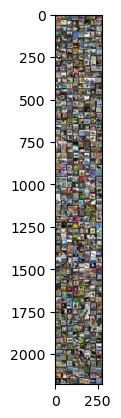

deer  dog   truck horse bird  frog  dog   deer  horse plane cat   bird  deer  frog  cat   car   truck ship  car   plane frog  truck ship  cat   cat   car   plane plane ship  plane dog   bird  cat   car   frog  dog   car   ship  car   horse dog   bird  car   car   car   car   truck cat   frog  truck cat   deer  car   car   truck bird  bird  truck deer  truck cat   car   bird  frog 


In [9]:
# functions to show an image
def imshow(img):
    img = img / 2 +0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(64)))

### Architecture of Neural Network used: 


In [10]:
class CNN(nn.Module):
  def __init__(self,activation,):
    super().__init__()
    self.network = nn.Sequential(
        nn.Conv2d(3,32,(3,3),padding=1), 
        activation(),
        nn.MaxPool2d(2), 
        nn.Conv2d(32,64,(3,3),padding=1), 
        activation(),
        nn.MaxPool2d(2),
        nn.Flatten(),
        nn.Linear(64*(8)*(8),128),
        activation(),
        nn.Linear(128,10),
    ).to(device)
  def forward(self,x):
    return self.network(x)

In [7]:
clf = CNN(nn.ReLU).to(device)

In [8]:
from torchsummary import summary 
summary(clf.network,(3,32,32))

ModuleNotFoundError: No module named 'torchsummary'

Train - Test Code

In [11]:
def train(num_iter=30):
  for epoch in tqdm(range(num_iter)):
    correct = 0 
    total = 0 
    for i,data in enumerate(trainloader):
    #get input 
      inputs = data[0].to(device)
      labels = data[1].to(device)
    #make gradient tensor 0/ reset 
      optimizer.zero_grad()
    #forward + backward + optimise 
      ypred = clf(inputs)
      loss = crieterion(ypred,labels)
      loss.backward()
      optimizer.step()

      _, predicted = torch.max(ypred.data, 1)


      total+=1
      correct += (predicted == labels).sum()
      total+=labels.size(0)
    #statistics 
    print(f"Epochs:{epoch}, loss is {loss.item()},  Accuracy: {100 * (correct / total)} %")
    

def test():
  correct = 0
  total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in testloader:
          images, labels = data[0].to(device),data[1].to(device)
        # calculate outputs by running images through the network
          outputs = clf(images)
        # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the 10000 test images: {100 * (correct / total)} %')

#### Activation Function: ReLU 
#### Optimiser SGD 
#### No momentum 


In [10]:
clf = CNN(nn.ReLU).to(device)
crieterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(clf.parameters(), lr=0.1)
train(100)
test()

  1%|          | 1/100 [00:21<35:28, 21.50s/it]

Epochs:0, loss is 1.9248181581497192,  Accuracy: 22.166553497314453 %


  2%|▏         | 2/100 [00:38<30:33, 18.71s/it]

Epochs:1, loss is 1.7770570516586304,  Accuracy: 32.35059356689453 %


  3%|▎         | 3/100 [00:54<28:04, 17.36s/it]

Epochs:2, loss is 1.6503535509109497,  Accuracy: 37.99153518676758 %


  4%|▍         | 4/100 [01:10<27:12, 17.00s/it]

Epochs:3, loss is 1.5215708017349243,  Accuracy: 41.06950378417969 %


  5%|▌         | 5/100 [01:26<26:10, 16.53s/it]

Epochs:4, loss is 1.4631943702697754,  Accuracy: 43.999759674072266 %


  6%|▌         | 6/100 [01:43<26:13, 16.74s/it]

Epochs:5, loss is 1.412370204925537,  Accuracy: 46.1994514465332 %


  7%|▋         | 7/100 [01:58<25:23, 16.38s/it]

Epochs:6, loss is 1.4414488077163696,  Accuracy: 47.894126892089844 %


  8%|▊         | 8/100 [02:15<25:09, 16.41s/it]

Epochs:7, loss is 1.266716480255127,  Accuracy: 50.1357307434082 %


  9%|▉         | 9/100 [02:31<24:32, 16.18s/it]

Epochs:8, loss is 1.418246865272522,  Accuracy: 51.10184097290039 %


 10%|█         | 10/100 [02:47<24:35, 16.39s/it]

Epochs:9, loss is 1.277070164680481,  Accuracy: 53.13984680175781 %


 11%|█         | 11/100 [03:04<24:12, 16.32s/it]

Epochs:10, loss is 1.26767098903656,  Accuracy: 54.78063201904297 %


 12%|█▏        | 12/100 [03:20<23:50, 16.25s/it]

Epochs:11, loss is 1.3102582693099976,  Accuracy: 55.752723693847656 %


 13%|█▎        | 13/100 [03:36<23:35, 16.28s/it]

Epochs:12, loss is 1.2635670900344849,  Accuracy: 57.05217742919922 %


 14%|█▍        | 14/100 [03:52<23:14, 16.22s/it]

Epochs:13, loss is 1.0643998384475708,  Accuracy: 58.30971145629883 %


 15%|█▌        | 15/100 [04:08<23:01, 16.25s/it]

Epochs:14, loss is 1.0779354572296143,  Accuracy: 59.63112258911133 %


 16%|█▌        | 16/100 [04:24<22:31, 16.09s/it]

Epochs:15, loss is 1.1835880279541016,  Accuracy: 60.40959930419922 %


 17%|█▋        | 17/100 [04:41<22:25, 16.22s/it]

Epochs:16, loss is 1.231358528137207,  Accuracy: 61.170108795166016 %


 18%|█▊        | 18/100 [04:57<22:09, 16.22s/it]

Epochs:17, loss is 1.1217294931411743,  Accuracy: 62.044395446777344 %


 19%|█▉        | 19/100 [05:15<22:34, 16.72s/it]

Epochs:18, loss is 1.101592779159546,  Accuracy: 63.04443359375 %


 20%|██        | 20/100 [05:32<22:29, 16.87s/it]

Epochs:19, loss is 1.063846468925476,  Accuracy: 63.95065689086914 %


 21%|██        | 21/100 [05:50<22:33, 17.13s/it]

Epochs:20, loss is 0.94825279712677,  Accuracy: 64.54548645019531 %


 22%|██▏       | 22/100 [06:07<22:16, 17.14s/it]

Epochs:21, loss is 1.0001102685928345,  Accuracy: 64.94869995117188 %


 23%|██▎       | 23/100 [06:25<22:15, 17.34s/it]

Epochs:22, loss is 0.9068688154220581,  Accuracy: 65.44173431396484 %


 24%|██▍       | 24/100 [06:42<22:04, 17.43s/it]

Epochs:23, loss is 0.9813578724861145,  Accuracy: 66.19625854492188 %


 25%|██▌       | 25/100 [07:01<22:03, 17.65s/it]

Epochs:24, loss is 0.9817766547203064,  Accuracy: 66.93879699707031 %


 26%|██▌       | 26/100 [07:18<21:44, 17.63s/it]

Epochs:25, loss is 0.8504655957221985,  Accuracy: 67.54361724853516 %


 27%|██▋       | 27/100 [07:35<21:17, 17.49s/it]

Epochs:26, loss is 0.8507815003395081,  Accuracy: 67.96279907226562 %


 28%|██▊       | 28/100 [07:52<20:45, 17.30s/it]

Epochs:27, loss is 0.7964215874671936,  Accuracy: 68.70933532714844 %


 29%|██▉       | 29/100 [08:08<20:02, 16.93s/it]

Epochs:28, loss is 0.8872717022895813,  Accuracy: 68.93089294433594 %


 30%|███       | 30/100 [08:25<19:38, 16.83s/it]

Epochs:29, loss is 1.0265398025512695,  Accuracy: 69.46185302734375 %


 31%|███       | 31/100 [08:41<19:04, 16.59s/it]

Epochs:30, loss is 0.9321455955505371,  Accuracy: 69.84709930419922 %


 32%|███▏      | 32/100 [08:57<18:46, 16.56s/it]

Epochs:31, loss is 0.8434342741966248,  Accuracy: 70.62158203125 %


 33%|███▎      | 33/100 [09:13<18:08, 16.25s/it]

Epochs:32, loss is 0.8581891059875488,  Accuracy: 70.77128601074219 %


 34%|███▍      | 34/100 [09:29<17:57, 16.32s/it]

Epochs:33, loss is 0.7857059240341187,  Accuracy: 70.95891571044922 %


 35%|███▌      | 35/100 [09:46<17:41, 16.33s/it]

Epochs:34, loss is 0.7780380249023438,  Accuracy: 71.48389434814453 %


 36%|███▌      | 36/100 [10:02<17:29, 16.40s/it]

Epochs:35, loss is 0.7517949938774109,  Accuracy: 72.13261413574219 %


 37%|███▋      | 37/100 [10:18<17:02, 16.23s/it]

Epochs:36, loss is 0.8474797606468201,  Accuracy: 72.33422088623047 %


 38%|███▊      | 38/100 [10:35<16:55, 16.38s/it]

Epochs:37, loss is 0.8042609095573425,  Accuracy: 72.69152069091797 %


 39%|███▉      | 39/100 [10:51<16:43, 16.45s/it]

Epochs:38, loss is 0.6753907203674316,  Accuracy: 73.05481719970703 %


 40%|████      | 40/100 [11:08<16:32, 16.53s/it]

Epochs:39, loss is 0.6920040845870972,  Accuracy: 73.48796081542969 %


 41%|████      | 41/100 [11:24<16:11, 16.47s/it]

Epochs:40, loss is 0.6580744385719299,  Accuracy: 73.66561126708984 %


 42%|████▏     | 42/100 [11:41<15:55, 16.47s/it]

Epochs:41, loss is 0.7888802289962769,  Accuracy: 73.89915466308594 %


 43%|████▎     | 43/100 [11:57<15:35, 16.42s/it]

Epochs:42, loss is 0.8067083954811096,  Accuracy: 74.09677124023438 %


 44%|████▍     | 44/100 [12:14<15:30, 16.61s/it]

Epochs:43, loss is 0.7012436389923096,  Accuracy: 74.66565704345703 %


 45%|████▌     | 45/100 [12:31<15:19, 16.71s/it]

Epochs:44, loss is 0.7219716310501099,  Accuracy: 74.4500732421875 %


 46%|████▌     | 46/100 [12:48<15:09, 16.84s/it]

Epochs:45, loss is 0.773621141910553,  Accuracy: 75.01297760009766 %


 47%|████▋     | 47/100 [13:06<14:57, 16.93s/it]

Epochs:46, loss is 0.6782717704772949,  Accuracy: 75.21058654785156 %


 48%|████▊     | 48/100 [13:22<14:30, 16.73s/it]

Epochs:47, loss is 0.907903790473938,  Accuracy: 75.51798248291016 %


 49%|████▉     | 49/100 [13:39<14:16, 16.80s/it]

Epochs:48, loss is 0.7514544725418091,  Accuracy: 75.58186340332031 %


 50%|█████     | 50/100 [13:55<13:45, 16.51s/it]

Epochs:49, loss is 0.5950998663902283,  Accuracy: 75.70761108398438 %


 51%|█████     | 51/100 [14:11<13:32, 16.59s/it]

Epochs:50, loss is 0.6676181554794312,  Accuracy: 76.30644226074219 %


 52%|█████▏    | 52/100 [14:27<13:09, 16.45s/it]

Epochs:51, loss is 0.6167629361152649,  Accuracy: 76.33238983154297 %


 53%|█████▎    | 53/100 [14:45<13:10, 16.81s/it]

Epochs:52, loss is 0.6442061066627502,  Accuracy: 76.30843353271484 %


 54%|█████▍    | 54/100 [15:01<12:46, 16.67s/it]

Epochs:53, loss is 0.6537421345710754,  Accuracy: 77.31446838378906 %


 55%|█████▌    | 55/100 [15:18<12:26, 16.59s/it]

Epochs:54, loss is 0.7019280195236206,  Accuracy: 76.68170166015625 %


 56%|█████▌    | 56/100 [15:34<12:05, 16.48s/it]

Epochs:55, loss is 0.5676781535148621,  Accuracy: 77.29251098632812 %


 57%|█████▋    | 57/100 [15:51<11:51, 16.54s/it]

Epochs:56, loss is 0.6358472108840942,  Accuracy: 77.21266174316406 %


 58%|█████▊    | 58/100 [16:07<11:31, 16.46s/it]

Epochs:57, loss is 0.5916142463684082,  Accuracy: 77.58193969726562 %


 59%|█████▉    | 59/100 [16:24<11:17, 16.53s/it]

Epochs:58, loss is 0.7329886555671692,  Accuracy: 77.74561309814453 %


 60%|██████    | 60/100 [16:40<10:58, 16.46s/it]

Epochs:59, loss is 0.6119633913040161,  Accuracy: 78.0410385131836 %


 61%|██████    | 61/100 [16:57<10:42, 16.48s/it]

Epochs:60, loss is 0.6294286847114563,  Accuracy: 78.1069107055664 %


 62%|██████▏   | 62/100 [17:13<10:25, 16.45s/it]

Epochs:61, loss is 0.6254395246505737,  Accuracy: 78.52409362792969 %


 63%|██████▎   | 63/100 [17:29<10:08, 16.43s/it]

Epochs:62, loss is 0.6298395991325378,  Accuracy: 78.34644317626953 %


 64%|██████▍   | 64/100 [17:45<09:46, 16.28s/it]

Epochs:63, loss is 0.6165858507156372,  Accuracy: 78.51211547851562 %


 65%|██████▌   | 65/100 [18:03<09:40, 16.57s/it]

Epochs:64, loss is 0.6812012791633606,  Accuracy: 78.90534210205078 %


 66%|██████▌   | 66/100 [18:20<09:30, 16.79s/it]

Epochs:65, loss is 0.5486065745353699,  Accuracy: 78.80354309082031 %


 67%|██████▋   | 67/100 [18:37<09:16, 16.87s/it]

Epochs:66, loss is 0.5644505620002747,  Accuracy: 78.94326782226562 %


 68%|██████▊   | 68/100 [18:55<09:10, 17.21s/it]

Epochs:67, loss is 0.6708422303199768,  Accuracy: 79.22271728515625 %


 69%|██████▉   | 69/100 [19:12<08:49, 17.09s/it]

Epochs:68, loss is 0.6607544422149658,  Accuracy: 79.24468231201172 %


 70%|███████   | 70/100 [19:29<08:38, 17.30s/it]

Epochs:69, loss is 0.6956919431686401,  Accuracy: 79.4303207397461 %


 71%|███████   | 71/100 [19:47<08:19, 17.22s/it]

Epochs:70, loss is 0.5477184653282166,  Accuracy: 79.77364349365234 %


 72%|███████▏  | 72/100 [20:04<08:05, 17.34s/it]

Epochs:71, loss is 0.5536664128303528,  Accuracy: 79.88742065429688 %


 73%|███████▎  | 73/100 [20:21<07:45, 17.24s/it]

Epochs:72, loss is 0.5610514879226685,  Accuracy: 79.50816345214844 %


 74%|███████▍  | 74/100 [20:39<07:30, 17.31s/it]

Epochs:73, loss is 0.5971301198005676,  Accuracy: 80.21078491210938 %


 75%|███████▌  | 75/100 [20:56<07:11, 17.28s/it]

Epochs:74, loss is 0.6089157462120056,  Accuracy: 80.20679473876953 %


 76%|███████▌  | 76/100 [21:13<06:50, 17.10s/it]

Epochs:75, loss is 0.6158524751663208,  Accuracy: 80.06108093261719 %


 77%|███████▋  | 77/100 [21:29<06:26, 16.82s/it]

Epochs:76, loss is 0.5671499967575073,  Accuracy: 80.3944320678711 %


 78%|███████▊  | 78/100 [21:45<06:06, 16.67s/it]

Epochs:77, loss is 0.49223533272743225,  Accuracy: 80.49822235107422 %


 79%|███████▉  | 79/100 [22:01<05:48, 16.58s/it]

Epochs:78, loss is 0.5426255464553833,  Accuracy: 80.36448669433594 %


 80%|████████  | 80/100 [22:18<05:29, 16.50s/it]

Epochs:79, loss is 0.5696643590927124,  Accuracy: 80.56009674072266 %


 81%|████████  | 81/100 [22:35<05:15, 16.60s/it]

Epochs:80, loss is 0.5126199722290039,  Accuracy: 80.94933319091797 %


 82%|████████▏ | 82/100 [22:50<04:54, 16.38s/it]

Epochs:81, loss is 0.4466078281402588,  Accuracy: 80.89544677734375 %


 83%|████████▎ | 83/100 [23:07<04:41, 16.53s/it]

Epochs:82, loss is 0.5878479480743408,  Accuracy: 80.75971221923828 %


 84%|████████▍ | 84/100 [23:23<04:20, 16.31s/it]

Epochs:83, loss is 0.4327394366264343,  Accuracy: 81.26072692871094 %


 85%|████████▌ | 85/100 [23:40<04:07, 16.49s/it]

Epochs:84, loss is 0.5008177161216736,  Accuracy: 81.42041778564453 %


 86%|████████▌ | 86/100 [23:56<03:47, 16.26s/it]

Epochs:85, loss is 0.4981275200843811,  Accuracy: 81.52420806884766 %


 87%|████████▋ | 87/100 [24:13<03:35, 16.61s/it]

Epochs:86, loss is 0.44783949851989746,  Accuracy: 81.5781021118164 %


 88%|████████▊ | 88/100 [24:29<03:16, 16.41s/it]

Epochs:87, loss is 0.5516095161437988,  Accuracy: 81.54217529296875 %


 89%|████████▉ | 89/100 [24:46<03:02, 16.55s/it]

Epochs:88, loss is 0.4190029799938202,  Accuracy: 81.71783447265625 %


 90%|█████████ | 90/100 [25:02<02:43, 16.32s/it]

Epochs:89, loss is 0.5144028663635254,  Accuracy: 81.81963348388672 %


 91%|█████████ | 91/100 [25:18<02:27, 16.40s/it]

Epochs:90, loss is 0.5052807927131653,  Accuracy: 81.64397430419922 %


 92%|█████████▏| 92/100 [25:34<02:09, 16.20s/it]

Epochs:91, loss is 0.5611409544944763,  Accuracy: 82.23880767822266 %


 93%|█████████▎| 93/100 [25:51<01:54, 16.39s/it]

Epochs:92, loss is 0.5333620309829712,  Accuracy: 82.40049743652344 %


 94%|█████████▍| 94/100 [26:07<01:37, 16.18s/it]

Epochs:93, loss is 0.5946021676063538,  Accuracy: 81.99129486083984 %


 95%|█████████▌| 95/100 [26:23<01:21, 16.39s/it]

Epochs:94, loss is 0.5173699259757996,  Accuracy: 82.20687866210938 %


 96%|█████████▌| 96/100 [26:39<01:04, 16.21s/it]

Epochs:95, loss is 0.47574755549430847,  Accuracy: 82.32463836669922 %


 97%|█████████▋| 97/100 [26:56<00:49, 16.38s/it]

Epochs:96, loss is 0.5843291878700256,  Accuracy: 82.58613586425781 %


 98%|█████████▊| 98/100 [27:12<00:32, 16.15s/it]

Epochs:97, loss is 0.6502193808555603,  Accuracy: 82.55419158935547 %


 99%|█████████▉| 99/100 [27:28<00:16, 16.28s/it]

Epochs:98, loss is 0.4733530282974243,  Accuracy: 82.76976776123047 %


100%|██████████| 100/100 [27:44<00:00, 16.64s/it]

Epochs:99, loss is 0.5861654281616211,  Accuracy: 82.67794799804688 %


Accuracy of the network on the 10000 test images: 76.55999999999999 %


#### Activation Function: ReLU 
#### Optimiser SGD 
#### Momentum added 


In [11]:
clf = CNN(nn.ReLU).to(device)
crieterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(clf.parameters(), lr=0.1,momentum=0.5)
train(100)
test()

  1%|          | 1/100 [00:15<25:54, 15.70s/it]

Epochs:0, loss is 1.851090431213379,  Accuracy: 26.494070053100586 %


  2%|▏         | 2/100 [00:32<27:08, 16.62s/it]

Epochs:1, loss is 1.5255136489868164,  Accuracy: 38.79196548461914 %


  3%|▎         | 3/100 [00:48<26:18, 16.27s/it]

Epochs:2, loss is 1.476767659187317,  Accuracy: 44.55666732788086 %


  4%|▍         | 4/100 [01:06<26:38, 16.65s/it]

Epochs:3, loss is 1.3607012033462524,  Accuracy: 47.93804168701172 %


  5%|▌         | 5/100 [01:22<26:02, 16.45s/it]

Epochs:4, loss is 1.202885389328003,  Accuracy: 51.3333854675293 %


  6%|▌         | 6/100 [01:39<26:05, 16.65s/it]

Epochs:5, loss is 1.2822213172912598,  Accuracy: 54.038082122802734 %


  7%|▋         | 7/100 [01:54<25:18, 16.32s/it]

Epochs:6, loss is 1.362767219543457,  Accuracy: 56.710845947265625 %


  8%|▊         | 8/100 [02:11<25:15, 16.47s/it]

Epochs:7, loss is 1.0617471933364868,  Accuracy: 58.75483703613281 %


  9%|▉         | 9/100 [02:27<24:38, 16.24s/it]

Epochs:8, loss is 1.1202927827835083,  Accuracy: 60.61918640136719 %


 10%|█         | 10/100 [02:44<24:36, 16.40s/it]

Epochs:9, loss is 1.0928430557250977,  Accuracy: 62.507484436035156 %


 11%|█         | 11/100 [02:59<23:53, 16.10s/it]

Epochs:10, loss is 1.0022310018539429,  Accuracy: 63.6791877746582 %


 12%|█▏        | 12/100 [03:16<24:03, 16.41s/it]

Epochs:11, loss is 1.0547089576721191,  Accuracy: 64.9786376953125 %


 13%|█▎        | 13/100 [03:32<23:24, 16.14s/it]

Epochs:12, loss is 0.9786704182624817,  Accuracy: 66.06251525878906 %


 14%|█▍        | 14/100 [03:48<23:16, 16.24s/it]

Epochs:13, loss is 0.8882439732551575,  Accuracy: 67.26615905761719 %


 15%|█▌        | 15/100 [04:03<22:36, 15.96s/it]

Epochs:14, loss is 0.8622082471847534,  Accuracy: 68.48976135253906 %


 16%|█▌        | 16/100 [04:20<22:26, 16.03s/it]

Epochs:15, loss is 0.8893442749977112,  Accuracy: 69.11453247070312 %


 17%|█▋        | 17/100 [04:35<21:58, 15.89s/it]

Epochs:16, loss is 0.8073834180831909,  Accuracy: 70.1065902709961 %


 18%|█▊        | 18/100 [04:51<21:46, 15.93s/it]

Epochs:17, loss is 0.894927978515625,  Accuracy: 70.50181579589844 %


 19%|█▉        | 19/100 [05:07<21:24, 15.86s/it]

Epochs:18, loss is 0.858038604259491,  Accuracy: 70.82518005371094 %


 20%|██        | 20/100 [05:23<21:17, 15.97s/it]

Epochs:19, loss is 0.8214829564094543,  Accuracy: 71.84119415283203 %


 21%|██        | 21/100 [05:39<20:58, 15.93s/it]

Epochs:20, loss is 0.7873173952102661,  Accuracy: 72.48593139648438 %


 22%|██▏       | 22/100 [05:55<20:40, 15.90s/it]

Epochs:21, loss is 0.7412752509117126,  Accuracy: 72.73544311523438 %


 23%|██▎       | 23/100 [06:10<20:18, 15.82s/it]

Epochs:22, loss is 0.7535250782966614,  Accuracy: 73.57778930664062 %


 24%|██▍       | 24/100 [06:26<20:03, 15.84s/it]

Epochs:23, loss is 0.6636661887168884,  Accuracy: 73.82331085205078 %


 25%|██▌       | 25/100 [06:42<19:38, 15.72s/it]

Epochs:24, loss is 0.6715001463890076,  Accuracy: 74.228515625 %


 26%|██▌       | 26/100 [06:58<19:41, 15.96s/it]

Epochs:25, loss is 0.7409148216247559,  Accuracy: 74.86726379394531 %


 27%|██▋       | 27/100 [07:15<19:38, 16.15s/it]

Epochs:26, loss is 0.6979161500930786,  Accuracy: 75.29841613769531 %


 28%|██▊       | 28/100 [07:31<19:21, 16.13s/it]

Epochs:27, loss is 0.6857134103775024,  Accuracy: 75.65371704101562 %


 29%|██▉       | 29/100 [07:47<19:03, 16.11s/it]

Epochs:28, loss is 0.659492015838623,  Accuracy: 75.95912170410156 %


 30%|███       | 30/100 [08:03<18:43, 16.05s/it]

Epochs:29, loss is 0.6674497723579407,  Accuracy: 76.20663452148438 %


 31%|███       | 31/100 [08:19<18:27, 16.05s/it]

Epochs:30, loss is 0.6384027600288391,  Accuracy: 76.62980651855469 %


 32%|███▏      | 32/100 [08:35<18:09, 16.02s/it]

Epochs:31, loss is 0.6559312343597412,  Accuracy: 76.86534881591797 %


 33%|███▎      | 33/100 [08:51<17:58, 16.10s/it]

Epochs:32, loss is 0.698158860206604,  Accuracy: 77.28052520751953 %


 34%|███▍      | 34/100 [09:07<17:40, 16.06s/it]

Epochs:33, loss is 0.618691086769104,  Accuracy: 77.23861694335938 %


 35%|███▌      | 35/100 [09:24<17:46, 16.41s/it]

Epochs:34, loss is 0.6291638612747192,  Accuracy: 77.767578125 %


 36%|███▌      | 36/100 [09:42<17:43, 16.61s/it]

Epochs:35, loss is 0.6614249348640442,  Accuracy: 77.87136840820312 %


 37%|███▋      | 37/100 [09:59<17:39, 16.82s/it]

Epochs:36, loss is 0.6763949394226074,  Accuracy: 78.24663543701172 %


 38%|███▊      | 38/100 [10:16<17:29, 16.92s/it]

Epochs:37, loss is 0.678111732006073,  Accuracy: 78.4662094116211 %


 39%|███▉      | 39/100 [10:34<17:28, 17.19s/it]

Epochs:38, loss is 0.6021461486816406,  Accuracy: 78.63587188720703 %


 40%|████      | 40/100 [10:51<17:03, 17.05s/it]

Epochs:39, loss is 0.6148673892021179,  Accuracy: 78.87939453125 %


 41%|████      | 41/100 [11:08<16:47, 17.07s/it]

Epochs:40, loss is 0.5981640815734863,  Accuracy: 79.29657745361328 %


 42%|████▏     | 42/100 [11:24<16:09, 16.72s/it]

Epochs:41, loss is 0.5657228827476501,  Accuracy: 79.3943862915039 %


 43%|████▎     | 43/100 [11:41<15:57, 16.81s/it]

Epochs:42, loss is 0.596611499786377,  Accuracy: 79.69779205322266 %


 44%|████▍     | 44/100 [11:56<15:22, 16.47s/it]

Epochs:43, loss is 0.4917571246623993,  Accuracy: 79.77963256835938 %


 45%|████▌     | 45/100 [12:13<15:12, 16.59s/it]

Epochs:44, loss is 0.5127241611480713,  Accuracy: 79.83552551269531 %


 46%|████▌     | 46/100 [12:29<14:42, 16.35s/it]

Epochs:45, loss is 0.6136888265609741,  Accuracy: 80.19282531738281 %


 47%|████▋     | 47/100 [12:45<14:28, 16.40s/it]

Epochs:46, loss is 0.5651113390922546,  Accuracy: 80.42237091064453 %


 48%|████▊     | 48/100 [13:01<13:56, 16.08s/it]

Epochs:47, loss is 0.6308416128158569,  Accuracy: 80.2347412109375 %


 49%|████▉     | 49/100 [13:17<13:44, 16.18s/it]

Epochs:48, loss is 0.5891637206077576,  Accuracy: 80.54612731933594 %


 50%|█████     | 50/100 [13:33<13:25, 16.12s/it]

Epochs:49, loss is 0.5712884068489075,  Accuracy: 80.74773406982422 %


 51%|█████     | 51/100 [13:49<13:11, 16.15s/it]

Epochs:50, loss is 0.4618165194988251,  Accuracy: 81.10304260253906 %


 52%|█████▏    | 52/100 [14:06<12:57, 16.19s/it]

Epochs:51, loss is 0.5708931684494019,  Accuracy: 81.02519226074219 %


 53%|█████▎    | 53/100 [14:21<12:36, 16.09s/it]

Epochs:52, loss is 0.6136578321456909,  Accuracy: 81.41043853759766 %


 54%|█████▍    | 54/100 [14:38<12:25, 16.20s/it]

Epochs:53, loss is 0.5345175862312317,  Accuracy: 81.43238830566406 %


 55%|█████▌    | 55/100 [14:54<12:00, 16.01s/it]

Epochs:54, loss is 0.4878465235233307,  Accuracy: 81.37051391601562 %


 56%|█████▌    | 56/100 [15:10<11:53, 16.22s/it]

Epochs:55, loss is 0.5146126747131348,  Accuracy: 81.66992950439453 %


 57%|█████▋    | 57/100 [15:26<11:28, 16.01s/it]

Epochs:56, loss is 0.51604163646698,  Accuracy: 82.04718780517578 %


 58%|█████▊    | 58/100 [15:42<11:20, 16.21s/it]

Epochs:57, loss is 0.5926545262336731,  Accuracy: 81.92941284179688 %


 59%|█████▉    | 59/100 [15:58<10:55, 16.00s/it]

Epochs:58, loss is 0.4969116449356079,  Accuracy: 82.23681640625 %


 60%|██████    | 60/100 [16:15<10:47, 16.18s/it]

Epochs:59, loss is 0.4833838939666748,  Accuracy: 82.38053131103516 %


 61%|██████    | 61/100 [16:30<10:22, 15.97s/it]

Epochs:60, loss is 0.6038613319396973,  Accuracy: 82.54821014404297 %


 62%|██████▏   | 62/100 [16:46<10:10, 16.06s/it]

Epochs:61, loss is 0.47840064764022827,  Accuracy: 82.61407470703125 %


 63%|██████▎   | 63/100 [17:03<09:56, 16.11s/it]

Epochs:62, loss is 0.47748228907585144,  Accuracy: 82.60010528564453 %


 64%|██████▍   | 64/100 [17:19<09:49, 16.37s/it]

Epochs:63, loss is 0.501822292804718,  Accuracy: 82.70390319824219 %


 65%|██████▌   | 65/100 [17:36<09:38, 16.53s/it]

Epochs:64, loss is 0.49542340636253357,  Accuracy: 82.92546844482422 %


 66%|██████▌   | 66/100 [17:53<09:26, 16.66s/it]

Epochs:65, loss is 0.499938428401947,  Accuracy: 82.84561920166016 %


 67%|██████▋   | 67/100 [18:09<09:01, 16.42s/it]

Epochs:66, loss is 0.4716748595237732,  Accuracy: 83.01528930664062 %


 68%|██████▊   | 68/100 [18:25<08:43, 16.35s/it]

Epochs:67, loss is 0.44971075654029846,  Accuracy: 83.26879119873047 %


 69%|██████▉   | 69/100 [18:41<08:22, 16.22s/it]

Epochs:68, loss is 0.4657305181026459,  Accuracy: 83.45841979980469 %


 70%|███████   | 70/100 [18:58<08:07, 16.24s/it]

Epochs:69, loss is 0.47762662172317505,  Accuracy: 83.50033569335938 %


 71%|███████   | 71/100 [19:14<07:50, 16.24s/it]

Epochs:70, loss is 0.45418471097946167,  Accuracy: 83.73387908935547 %


 72%|███████▏  | 72/100 [19:30<07:37, 16.33s/it]

Epochs:71, loss is 0.4581948220729828,  Accuracy: 83.85763549804688 %


 73%|███████▎  | 73/100 [19:46<07:18, 16.24s/it]

Epochs:72, loss is 0.46448567509651184,  Accuracy: 83.59615325927734 %


 74%|███████▍  | 74/100 [20:03<07:04, 16.32s/it]

Epochs:73, loss is 0.4009874761104584,  Accuracy: 83.61012268066406 %


 75%|███████▌  | 75/100 [20:20<06:50, 16.40s/it]

Epochs:74, loss is 0.4200822710990906,  Accuracy: 83.83368682861328 %


 76%|███████▌  | 76/100 [20:36<06:34, 16.45s/it]

Epochs:75, loss is 0.43541672825813293,  Accuracy: 83.92550659179688 %


 77%|███████▋  | 77/100 [20:52<06:16, 16.39s/it]

Epochs:76, loss is 0.4422602951526642,  Accuracy: 83.93948364257812 %


 78%|███████▊  | 78/100 [21:09<06:02, 16.49s/it]

Epochs:77, loss is 0.38446107506752014,  Accuracy: 84.3985824584961 %


 79%|███████▉  | 79/100 [21:25<05:45, 16.45s/it]

Epochs:78, loss is 0.3797023296356201,  Accuracy: 84.35067749023438 %


 80%|████████  | 80/100 [21:42<05:29, 16.48s/it]

Epochs:79, loss is 0.38327354192733765,  Accuracy: 84.46045684814453 %


 81%|████████  | 81/100 [21:58<05:12, 16.42s/it]

Epochs:80, loss is 0.45687058568000793,  Accuracy: 84.3965835571289 %


 82%|████████▏ | 82/100 [22:15<04:56, 16.46s/it]

Epochs:81, loss is 0.4572451412677765,  Accuracy: 84.37861633300781 %


 83%|████████▎ | 83/100 [22:32<04:41, 16.54s/it]

Epochs:82, loss is 0.4731966555118561,  Accuracy: 84.64209747314453 %


 84%|████████▍ | 84/100 [22:47<04:21, 16.34s/it]

Epochs:83, loss is 0.5136407017707825,  Accuracy: 84.54629516601562 %


 85%|████████▌ | 85/100 [23:04<04:06, 16.46s/it]

Epochs:84, loss is 0.45452645421028137,  Accuracy: 84.57223510742188 %


 86%|████████▌ | 86/100 [23:20<03:47, 16.27s/it]

Epochs:85, loss is 0.44986847043037415,  Accuracy: 84.88761901855469 %


 87%|████████▋ | 87/100 [23:37<03:34, 16.47s/it]

Epochs:86, loss is 0.47850051522254944,  Accuracy: 84.811767578125 %


 88%|████████▊ | 88/100 [23:53<03:15, 16.31s/it]

Epochs:87, loss is 0.36139193177223206,  Accuracy: 84.8516845703125 %


 89%|████████▉ | 89/100 [24:10<03:02, 16.56s/it]

Epochs:88, loss is 0.41216060519218445,  Accuracy: 85.2189712524414 %


 90%|█████████ | 90/100 [24:26<02:43, 16.38s/it]

Epochs:89, loss is 0.43558651208877563,  Accuracy: 85.24691772460938 %


 91%|█████████ | 91/100 [24:43<02:28, 16.54s/it]

Epochs:90, loss is 0.4296923279762268,  Accuracy: 84.90757751464844 %


 92%|█████████▏| 92/100 [24:59<02:10, 16.31s/it]

Epochs:91, loss is 0.35872262716293335,  Accuracy: 84.87763977050781 %


 93%|█████████▎| 93/100 [25:16<01:55, 16.55s/it]

Epochs:92, loss is 0.3628203570842743,  Accuracy: 85.18902587890625 %


 94%|█████████▍| 94/100 [25:32<01:38, 16.36s/it]

Epochs:93, loss is 0.44514769315719604,  Accuracy: 85.51838684082031 %


 95%|█████████▌| 95/100 [25:48<01:22, 16.50s/it]

Epochs:94, loss is 0.42832064628601074,  Accuracy: 85.38065338134766 %


 96%|█████████▌| 96/100 [26:04<01:05, 16.36s/it]

Epochs:95, loss is 0.5063546299934387,  Accuracy: 85.67807006835938 %


 97%|█████████▋| 97/100 [26:22<00:49, 16.62s/it]

Epochs:96, loss is 0.5183693766593933,  Accuracy: 85.58026885986328 %


 98%|█████████▊| 98/100 [26:38<00:32, 16.39s/it]

Epochs:97, loss is 0.3237154185771942,  Accuracy: 85.7080078125 %


 99%|█████████▉| 99/100 [26:54<00:16, 16.53s/it]

Epochs:98, loss is 0.37224629521369934,  Accuracy: 85.70601654052734 %


100%|██████████| 100/100 [27:10<00:00, 16.31s/it]

Epochs:99, loss is 0.3418218791484833,  Accuracy: 85.87168884277344 %


Accuracy of the network on the 10000 test images: 79.33 %


In [12]:
clf = CNN(nn.ReLU).to(device)
crieterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(clf.parameters(), lr=0.1,momentum=1)
train(100)
test()

  1%|          | 1/100 [00:24<40:39, 24.64s/it]

Epochs:0, loss is 1.8423749208450317,  Accuracy: 28.342449188232422 %


  2%|▏         | 2/100 [00:40<31:58, 19.58s/it]

Epochs:1, loss is 1.89615797996521,  Accuracy: 30.262683868408203 %


  3%|▎         | 3/100 [00:56<28:35, 17.69s/it]

Epochs:2, loss is 2.1501080989837646,  Accuracy: 22.463970184326172 %


  4%|▍         | 4/100 [01:12<27:16, 17.05s/it]

Epochs:3, loss is 2.1432013511657715,  Accuracy: 19.41394805908203 %


  5%|▌         | 5/100 [01:27<25:56, 16.39s/it]

Epochs:4, loss is 2.1504557132720947,  Accuracy: 17.501697540283203 %


  6%|▌         | 6/100 [01:43<25:24, 16.21s/it]

Epochs:5, loss is 2.2778141498565674,  Accuracy: 14.371831893920898 %


  7%|▋         | 7/100 [01:58<24:49, 16.02s/it]

Epochs:6, loss is 2.34745454788208,  Accuracy: 12.751008987426758 %


  8%|▊         | 8/100 [02:14<24:23, 15.91s/it]

Epochs:7, loss is 2.3336715698242188,  Accuracy: 12.148189544677734 %


  9%|▉         | 9/100 [02:30<23:57, 15.80s/it]

Epochs:8, loss is 2.4327149391174316,  Accuracy: 10.94255256652832 %


 10%|█         | 10/100 [02:45<23:39, 15.77s/it]

Epochs:9, loss is 2.383467435836792,  Accuracy: 10.034332275390625 %


 11%|█         | 11/100 [03:01<23:07, 15.59s/it]

Epochs:10, loss is 2.363550901412964,  Accuracy: 10.060281753540039 %


 12%|█▏        | 12/100 [03:17<23:04, 15.73s/it]

Epochs:11, loss is 2.4614856243133545,  Accuracy: 10.116172790527344 %


 13%|█▎        | 13/100 [03:32<22:30, 15.52s/it]

Epochs:12, loss is 2.3814737796783447,  Accuracy: 9.992414474487305 %


 14%|█▍        | 14/100 [03:48<22:43, 15.85s/it]

Epochs:13, loss is 2.383324384689331,  Accuracy: 9.782825469970703 %


 15%|█▌        | 15/100 [04:04<22:15, 15.72s/it]

Epochs:14, loss is 2.3735363483428955,  Accuracy: 9.802785873413086 %


 16%|█▌        | 16/100 [04:20<22:22, 15.99s/it]

Epochs:15, loss is 2.4186387062072754,  Accuracy: 10.042317390441895 %


 17%|█▋        | 17/100 [04:36<21:51, 15.80s/it]

Epochs:16, loss is 2.4641475677490234,  Accuracy: 9.968461990356445 %


 18%|█▊        | 18/100 [04:52<21:43, 15.89s/it]

Epochs:17, loss is 2.4806370735168457,  Accuracy: 10.086231231689453 %


 19%|█▉        | 19/100 [05:07<21:17, 15.77s/it]

Epochs:18, loss is 2.504605293273926,  Accuracy: 9.89061450958252 %


 20%|██        | 20/100 [05:23<21:07, 15.84s/it]

Epochs:19, loss is 2.4857442378997803,  Accuracy: 9.742903709411621 %


 21%|██        | 21/100 [05:39<20:43, 15.74s/it]

Epochs:20, loss is 2.4414961338043213,  Accuracy: 9.846700668334961 %


 22%|██▏       | 22/100 [05:55<20:32, 15.81s/it]

Epochs:21, loss is 2.394268751144409,  Accuracy: 10.092219352722168 %


 23%|██▎       | 23/100 [06:10<20:14, 15.78s/it]

Epochs:22, loss is 2.3608901500701904,  Accuracy: 10.082239151000977 %


 24%|██▍       | 24/100 [06:26<20:02, 15.82s/it]

Epochs:23, loss is 2.3709988594055176,  Accuracy: 10.168070793151855 %


 25%|██▌       | 25/100 [06:41<19:29, 15.59s/it]

Epochs:24, loss is 2.3526430130004883,  Accuracy: 9.938520431518555 %


 26%|██▌       | 26/100 [06:58<19:32, 15.85s/it]

Epochs:25, loss is 2.3503987789154053,  Accuracy: 9.94450855255127 %


 27%|██▋       | 27/100 [07:13<18:57, 15.58s/it]

Epochs:26, loss is 2.3608956336975098,  Accuracy: 9.916563034057617 %


 28%|██▊       | 28/100 [07:29<18:55, 15.78s/it]

Epochs:27, loss is 2.3879878520965576,  Accuracy: 10.054293632507324 %


 29%|██▉       | 29/100 [07:44<18:28, 15.61s/it]

Epochs:28, loss is 2.422361135482788,  Accuracy: 9.950496673583984 %


 30%|███       | 30/100 [08:01<18:29, 15.85s/it]

Epochs:29, loss is 2.4086227416992188,  Accuracy: 10.012375831604004 %


 31%|███       | 31/100 [08:16<17:58, 15.63s/it]

Epochs:30, loss is 2.4159367084503174,  Accuracy: 10.13214111328125 %


 32%|███▏      | 32/100 [08:32<17:52, 15.78s/it]

Epochs:31, loss is 2.432370901107788,  Accuracy: 10.036328315734863 %


 33%|███▎      | 33/100 [08:47<17:29, 15.66s/it]

Epochs:32, loss is 2.431906223297119,  Accuracy: 9.882630348205566 %


 34%|███▍      | 34/100 [09:03<17:23, 15.81s/it]

Epochs:33, loss is 2.4504892826080322,  Accuracy: 9.649087905883789 %


 35%|███▌      | 35/100 [09:19<16:57, 15.65s/it]

Epochs:34, loss is 2.417834758758545,  Accuracy: 10.092219352722168 %


 36%|███▌      | 36/100 [09:34<16:43, 15.67s/it]

Epochs:35, loss is 2.418931007385254,  Accuracy: 10.014371871948242 %


 37%|███▋      | 37/100 [09:50<16:25, 15.65s/it]

Epochs:36, loss is 2.398264169692993,  Accuracy: 9.728931427001953 %


 38%|███▊      | 38/100 [10:06<16:16, 15.76s/it]

Epochs:37, loss is 2.505126476287842,  Accuracy: 9.89061450958252 %


 39%|███▉      | 39/100 [10:21<15:54, 15.65s/it]

Epochs:38, loss is 2.4236698150634766,  Accuracy: 10.11217975616455 %


 40%|████      | 40/100 [10:38<15:47, 15.80s/it]

Epochs:39, loss is 2.454216718673706,  Accuracy: 9.984430313110352 %


 41%|████      | 41/100 [10:53<15:19, 15.58s/it]

Epochs:40, loss is 2.4929919242858887,  Accuracy: 9.724939346313477 %


 42%|████▏     | 42/100 [11:09<15:09, 15.69s/it]

Epochs:41, loss is 2.480445384979248,  Accuracy: 10.042317390441895 %


 43%|████▎     | 43/100 [11:24<14:44, 15.52s/it]

Epochs:42, loss is 2.437617540359497,  Accuracy: 9.780829429626465 %


 44%|████▍     | 44/100 [11:40<14:39, 15.71s/it]

Epochs:43, loss is 2.3752899169921875,  Accuracy: 10.022356033325195 %


 45%|████▌     | 45/100 [11:55<14:15, 15.56s/it]

Epochs:44, loss is 2.4617106914520264,  Accuracy: 10.034332275390625 %


 46%|████▌     | 46/100 [12:11<14:02, 15.61s/it]

Epochs:45, loss is 2.3970086574554443,  Accuracy: 9.990418434143066 %


 47%|████▋     | 47/100 [12:26<13:40, 15.48s/it]

Epochs:46, loss is 2.491537094116211,  Accuracy: 10.052297592163086 %


 48%|████▊     | 48/100 [12:41<13:26, 15.50s/it]

Epochs:47, loss is 2.492777109146118,  Accuracy: 10.116172790527344 %


 49%|████▉     | 49/100 [12:57<13:08, 15.46s/it]

Epochs:48, loss is 2.4754478931427,  Accuracy: 10.098207473754883 %


 50%|█████     | 50/100 [13:12<12:54, 15.50s/it]

Epochs:49, loss is 2.4430809020996094,  Accuracy: 9.924548149108887 %


 51%|█████     | 51/100 [13:27<12:30, 15.32s/it]

Epochs:50, loss is 2.4697885513305664,  Accuracy: 9.834723472595215 %


 52%|█████▏    | 52/100 [13:43<12:23, 15.49s/it]

Epochs:51, loss is 2.5209574699401855,  Accuracy: 10.044313430786133 %


 53%|█████▎    | 53/100 [13:58<12:00, 15.34s/it]

Epochs:52, loss is 2.5070018768310547,  Accuracy: 10.054293632507324 %


 54%|█████▍    | 54/100 [14:14<11:52, 15.48s/it]

Epochs:53, loss is 2.4835028648376465,  Accuracy: 9.94450855255127 %


 55%|█████▌    | 55/100 [14:29<11:30, 15.34s/it]

Epochs:54, loss is 2.423276901245117,  Accuracy: 10.036328315734863 %


 56%|█████▌    | 56/100 [14:44<11:14, 15.33s/it]

Epochs:55, loss is 2.6257784366607666,  Accuracy: 10.118168830871582 %


 57%|█████▋    | 57/100 [14:59<10:55, 15.24s/it]

Epochs:56, loss is 2.5217928886413574,  Accuracy: 9.916563034057617 %


 58%|█████▊    | 58/100 [15:15<10:43, 15.32s/it]

Epochs:57, loss is 2.455104112625122,  Accuracy: 9.918559074401855 %


 59%|█████▉    | 59/100 [15:30<10:25, 15.26s/it]

Epochs:58, loss is 2.5584845542907715,  Accuracy: 9.966465950012207 %


 60%|██████    | 60/100 [15:45<10:11, 15.30s/it]

Epochs:59, loss is 2.609846591949463,  Accuracy: 9.854684829711914 %


 61%|██████    | 61/100 [16:00<09:53, 15.23s/it]

Epochs:60, loss is 2.5195865631103516,  Accuracy: 10.02834415435791 %


 62%|██████▏   | 62/100 [16:15<09:34, 15.13s/it]

Epochs:61, loss is 2.703611373901367,  Accuracy: 9.94450855255127 %


 63%|██████▎   | 63/100 [16:31<09:25, 15.27s/it]

Epochs:62, loss is 2.718656301498413,  Accuracy: 10.000399589538574 %


 64%|██████▍   | 64/100 [16:46<09:08, 15.24s/it]

Epochs:63, loss is 2.7044928073883057,  Accuracy: 9.906582832336426 %


 65%|██████▌   | 65/100 [17:02<09:02, 15.50s/it]

Epochs:64, loss is 2.7429440021514893,  Accuracy: 9.872649192810059 %


 66%|██████▌   | 66/100 [17:17<08:40, 15.31s/it]

Epochs:65, loss is 2.5659778118133545,  Accuracy: 9.619146347045898 %


 67%|██████▋   | 67/100 [17:33<08:30, 15.48s/it]

Epochs:66, loss is 2.6708242893218994,  Accuracy: 9.938520431518555 %


 68%|██████▊   | 68/100 [17:48<08:09, 15.31s/it]

Epochs:67, loss is 2.844811201095581,  Accuracy: 10.040321350097656 %


 69%|██████▉   | 69/100 [18:04<07:59, 15.48s/it]

Epochs:68, loss is 2.595121383666992,  Accuracy: 9.852688789367676 %


 70%|███████   | 70/100 [18:19<07:40, 15.34s/it]

Epochs:69, loss is 2.795525074005127,  Accuracy: 9.784821510314941 %


 71%|███████   | 71/100 [18:34<07:26, 15.40s/it]

Epochs:70, loss is 2.7304372787475586,  Accuracy: 10.068265914916992 %


 72%|███████▏  | 72/100 [18:50<07:10, 15.37s/it]

Epochs:71, loss is 2.7617132663726807,  Accuracy: 10.10219955444336 %


 73%|███████▎  | 73/100 [19:05<06:57, 15.46s/it]

Epochs:72, loss is 2.5938329696655273,  Accuracy: 9.996406555175781 %


 74%|███████▍  | 74/100 [19:20<06:37, 15.28s/it]

Epochs:73, loss is 2.6720829010009766,  Accuracy: 10.060281753540039 %


 75%|███████▌  | 75/100 [19:36<06:25, 15.41s/it]

Epochs:74, loss is 2.611003875732422,  Accuracy: 10.018363952636719 %


 76%|███████▌  | 76/100 [19:51<06:06, 15.28s/it]

Epochs:75, loss is 2.793815851211548,  Accuracy: 10.010379791259766 %


 77%|███████▋  | 77/100 [20:07<05:56, 15.51s/it]

Epochs:76, loss is 2.6524813175201416,  Accuracy: 9.852688789367676 %


 78%|███████▊  | 78/100 [20:22<05:38, 15.37s/it]

Epochs:77, loss is 2.911076068878174,  Accuracy: 10.182043075561523 %


 79%|███████▉  | 79/100 [20:38<05:24, 15.45s/it]

Epochs:78, loss is 2.708768606185913,  Accuracy: 9.82474422454834 %


 80%|████████  | 80/100 [20:53<05:07, 15.36s/it]

Epochs:79, loss is 2.834091901779175,  Accuracy: 9.990418434143066 %


 81%|████████  | 81/100 [21:08<04:53, 15.43s/it]

Epochs:80, loss is 2.7190213203430176,  Accuracy: 10.002395629882812 %


 82%|████████▏ | 82/100 [21:24<04:36, 15.36s/it]

Epochs:81, loss is 2.7944698333740234,  Accuracy: 10.052297592163086 %


 83%|████████▎ | 83/100 [21:39<04:22, 15.42s/it]

Epochs:82, loss is 2.844900608062744,  Accuracy: 10.038325309753418 %


 84%|████████▍ | 84/100 [21:54<04:02, 15.17s/it]

Epochs:83, loss is 2.772150993347168,  Accuracy: 9.934528350830078 %


 85%|████████▌ | 85/100 [22:09<03:50, 15.37s/it]

Epochs:84, loss is 2.828620195388794,  Accuracy: 10.074254035949707 %


 86%|████████▌ | 86/100 [22:24<03:32, 15.21s/it]

Epochs:85, loss is 2.7731990814208984,  Accuracy: 10.020359992980957 %


 87%|████████▋ | 87/100 [22:40<03:20, 15.46s/it]

Epochs:86, loss is 2.844676971435547,  Accuracy: 9.878637313842773 %


 88%|████████▊ | 88/100 [22:55<03:02, 15.22s/it]

Epochs:87, loss is 2.664419651031494,  Accuracy: 10.315780639648438 %


 89%|████████▉ | 89/100 [23:11<02:48, 15.33s/it]

Epochs:88, loss is 3.0430712699890137,  Accuracy: 10.088227272033691 %


 90%|█████████ | 90/100 [23:26<02:32, 15.22s/it]

Epochs:89, loss is 2.733715295791626,  Accuracy: 9.978442192077637 %


 91%|█████████ | 91/100 [23:41<02:18, 15.37s/it]

Epochs:90, loss is 2.8891494274139404,  Accuracy: 10.072257995605469 %


 92%|█████████▏| 92/100 [23:57<02:02, 15.36s/it]

Epochs:91, loss is 2.734159469604492,  Accuracy: 10.09022331237793 %


 93%|█████████▎| 93/100 [24:12<01:47, 15.32s/it]

Epochs:92, loss is 2.554255962371826,  Accuracy: 9.942512512207031 %


 94%|█████████▍| 94/100 [24:27<01:31, 15.17s/it]

Epochs:93, loss is 2.976364850997925,  Accuracy: 9.874645233154297 %


 95%|█████████▌| 95/100 [24:42<01:16, 15.28s/it]

Epochs:94, loss is 2.617543935775757,  Accuracy: 10.020359992980957 %


 96%|█████████▌| 96/100 [24:57<01:00, 15.08s/it]

Epochs:95, loss is 2.877232789993286,  Accuracy: 10.106191635131836 %


 97%|█████████▋| 97/100 [25:12<00:45, 15.02s/it]

Epochs:96, loss is 2.845520496368408,  Accuracy: 10.148109436035156 %


 98%|█████████▊| 98/100 [25:27<00:30, 15.19s/it]

Epochs:97, loss is 3.0696756839752197,  Accuracy: 10.136133193969727 %


 99%|█████████▉| 99/100 [25:42<00:15, 15.07s/it]

Epochs:98, loss is 2.9118289947509766,  Accuracy: 9.914566993713379 %


100%|██████████| 100/100 [25:58<00:00, 15.58s/it]

Epochs:99, loss is 2.8037703037261963,  Accuracy: 9.984430313110352 %


Accuracy of the network on the 10000 test images: 10.0 %


In [13]:
clf = CNN(nn.ReLU).to(device)
crieterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(clf.parameters(), lr=0.1,momentum=0.25)
train(100)
test()

  1%|          | 1/100 [00:15<25:29, 15.45s/it]

Epochs:0, loss is 1.9758435487747192,  Accuracy: 23.651643753051758 %


  2%|▏         | 2/100 [00:30<25:10, 15.41s/it]

Epochs:1, loss is 1.6352914571762085,  Accuracy: 35.53036117553711 %


  3%|▎         | 3/100 [00:46<25:12, 15.59s/it]

Epochs:2, loss is 1.5250383615493774,  Accuracy: 40.49662780761719 %


  4%|▍         | 4/100 [01:01<24:27, 15.29s/it]

Epochs:3, loss is 1.5361387729644775,  Accuracy: 43.51670837402344 %


  5%|▌         | 5/100 [01:16<24:17, 15.34s/it]

Epochs:4, loss is 1.5216856002807617,  Accuracy: 46.52680587768555 %


  6%|▌         | 6/100 [01:32<24:02, 15.34s/it]

Epochs:5, loss is 1.373237133026123,  Accuracy: 48.467002868652344 %


  7%|▋         | 7/100 [01:47<23:53, 15.41s/it]

Epochs:6, loss is 1.2314687967300415,  Accuracy: 50.60082244873047 %


  8%|▊         | 8/100 [02:04<24:20, 15.88s/it]

Epochs:7, loss is 1.3321969509124756,  Accuracy: 52.449195861816406 %


  9%|▉         | 9/100 [02:21<24:25, 16.11s/it]

Epochs:8, loss is 1.1687523126602173,  Accuracy: 54.277618408203125 %


 10%|█         | 10/100 [02:36<23:43, 15.82s/it]

Epochs:9, loss is 1.1308377981185913,  Accuracy: 55.42536544799805 %


 11%|█         | 11/100 [02:52<23:33, 15.88s/it]

Epochs:10, loss is 1.2686876058578491,  Accuracy: 57.49331283569336 %


 12%|█▏        | 12/100 [03:07<23:03, 15.73s/it]

Epochs:11, loss is 1.1453086137771606,  Accuracy: 58.746856689453125 %


 13%|█▎        | 13/100 [03:22<22:31, 15.54s/it]

Epochs:12, loss is 1.0529584884643555,  Accuracy: 60.170066833496094 %


 14%|█▍        | 14/100 [03:38<22:21, 15.60s/it]

Epochs:13, loss is 1.1243001222610474,  Accuracy: 61.36172866821289 %


 15%|█▌        | 15/100 [03:53<21:52, 15.44s/it]

Epochs:14, loss is 1.053916335105896,  Accuracy: 61.86874008178711 %


 16%|█▌        | 16/100 [04:09<21:46, 15.55s/it]

Epochs:15, loss is 1.0766130685806274,  Accuracy: 63.5554313659668 %


 17%|█▋        | 17/100 [04:24<21:21, 15.44s/it]

Epochs:16, loss is 1.0370711088180542,  Accuracy: 64.07441711425781 %


 18%|█▊        | 18/100 [04:40<21:06, 15.44s/it]

Epochs:17, loss is 0.963385283946991,  Accuracy: 64.87883758544922 %


 19%|█▉        | 19/100 [04:55<20:49, 15.42s/it]

Epochs:18, loss is 0.893028974533081,  Accuracy: 66.08447265625 %


 20%|██        | 20/100 [05:10<20:32, 15.40s/it]

Epochs:19, loss is 0.9823538661003113,  Accuracy: 66.39187622070312 %


 21%|██        | 21/100 [05:26<20:13, 15.36s/it]

Epochs:20, loss is 0.8888468742370605,  Accuracy: 67.04259490966797 %


 22%|██▏       | 22/100 [05:41<19:56, 15.34s/it]

Epochs:21, loss is 0.8721131086349487,  Accuracy: 67.81108856201172 %


 23%|██▎       | 23/100 [05:56<19:30, 15.21s/it]

Epochs:22, loss is 0.9039254188537598,  Accuracy: 68.04064178466797 %


 24%|██▍       | 24/100 [06:12<19:32, 15.42s/it]

Epochs:23, loss is 0.9488107562065125,  Accuracy: 68.81112670898438 %


 25%|██▌       | 25/100 [06:27<19:06, 15.28s/it]

Epochs:24, loss is 0.830200731754303,  Accuracy: 69.38600158691406 %


 26%|██▌       | 26/100 [06:43<19:01, 15.43s/it]

Epochs:25, loss is 0.7585271596908569,  Accuracy: 69.94889831542969 %


 27%|██▋       | 27/100 [06:58<18:36, 15.30s/it]

Epochs:26, loss is 0.8512142896652222,  Accuracy: 70.27227020263672 %


 28%|██▊       | 28/100 [07:13<18:21, 15.30s/it]

Epochs:27, loss is 0.7999373078346252,  Accuracy: 71.37610626220703 %


 29%|██▉       | 29/100 [07:28<17:59, 15.20s/it]

Epochs:28, loss is 0.9254828691482544,  Accuracy: 71.35813903808594 %


 30%|███       | 30/100 [07:43<17:47, 15.25s/it]

Epochs:29, loss is 0.8933717012405396,  Accuracy: 71.63359832763672 %


 31%|███       | 31/100 [07:58<17:21, 15.10s/it]

Epochs:30, loss is 0.7865613102912903,  Accuracy: 72.12064361572266 %


 32%|███▏      | 32/100 [08:14<17:26, 15.39s/it]

Epochs:31, loss is 0.7681248188018799,  Accuracy: 72.52385711669922 %


 33%|███▎      | 33/100 [08:29<16:59, 15.21s/it]

Epochs:32, loss is 0.644952654838562,  Accuracy: 72.73942565917969 %


 34%|███▍      | 34/100 [08:45<16:55, 15.39s/it]

Epochs:33, loss is 0.7477776408195496,  Accuracy: 73.43207550048828 %


 35%|███▌      | 35/100 [08:59<16:24, 15.15s/it]

Epochs:34, loss is 0.8069738745689392,  Accuracy: 73.66761016845703 %


 36%|███▌      | 36/100 [09:14<16:11, 15.17s/it]

Epochs:35, loss is 0.7092121243476868,  Accuracy: 74.07481384277344 %


 37%|███▋      | 37/100 [09:30<15:55, 15.17s/it]

Epochs:36, loss is 0.7580810785293579,  Accuracy: 74.3263168334961 %


 38%|███▊      | 38/100 [09:45<15:47, 15.29s/it]

Epochs:37, loss is 0.6449151039123535,  Accuracy: 74.65766906738281 %


 39%|███▉      | 39/100 [10:00<15:25, 15.17s/it]

Epochs:38, loss is 0.7023265957832336,  Accuracy: 74.88922119140625 %


 40%|████      | 40/100 [10:16<15:19, 15.33s/it]

Epochs:39, loss is 0.7188700437545776,  Accuracy: 75.20060729980469 %


 41%|████      | 41/100 [10:30<14:52, 15.13s/it]

Epochs:40, loss is 0.667752742767334,  Accuracy: 75.52397155761719 %


 42%|████▏     | 42/100 [10:46<14:51, 15.37s/it]

Epochs:41, loss is 0.7180874943733215,  Accuracy: 75.71160888671875 %


 43%|████▎     | 43/100 [11:01<14:26, 15.20s/it]

Epochs:42, loss is 0.7570607662200928,  Accuracy: 76.01301574707031 %


 44%|████▍     | 44/100 [11:17<14:16, 15.30s/it]

Epochs:43, loss is 0.7153640389442444,  Accuracy: 76.27450561523438 %


 45%|████▌     | 45/100 [11:32<13:55, 15.19s/it]

Epochs:44, loss is 0.6090019941329956,  Accuracy: 76.53199768066406 %


 46%|████▌     | 46/100 [11:47<13:37, 15.14s/it]

Epochs:45, loss is 0.6221537590026855,  Accuracy: 76.7196273803711 %


 47%|████▋     | 47/100 [12:02<13:27, 15.23s/it]

Epochs:46, loss is 0.5989688038825989,  Accuracy: 77.22663116455078 %


 48%|████▊     | 48/100 [12:17<13:02, 15.05s/it]

Epochs:47, loss is 0.5606098771095276,  Accuracy: 77.41825866699219 %


 49%|████▉     | 49/100 [12:32<12:55, 15.20s/it]

Epochs:48, loss is 0.6490351557731628,  Accuracy: 77.5000991821289 %


 50%|█████     | 50/100 [12:48<12:44, 15.29s/it]

Epochs:49, loss is 0.6352304220199585,  Accuracy: 77.54401397705078 %


 51%|█████     | 51/100 [13:03<12:35, 15.41s/it]

Epochs:50, loss is 0.619579017162323,  Accuracy: 78.08694458007812 %


 52%|█████▏    | 52/100 [13:19<12:18, 15.39s/it]

Epochs:51, loss is 0.590132474899292,  Accuracy: 78.03704833984375 %


 53%|█████▎    | 53/100 [13:35<12:11, 15.56s/it]

Epochs:52, loss is 0.5736523866653442,  Accuracy: 78.25262451171875 %


 54%|█████▍    | 54/100 [13:50<11:51, 15.47s/it]

Epochs:53, loss is 0.5736624002456665,  Accuracy: 78.38636016845703 %


 55%|█████▌    | 55/100 [14:06<11:46, 15.71s/it]

Epochs:54, loss is 0.6791214942932129,  Accuracy: 78.62989044189453 %


 56%|█████▌    | 56/100 [14:22<11:26, 15.60s/it]

Epochs:55, loss is 0.5882698893547058,  Accuracy: 78.76361846923828 %


 57%|█████▋    | 57/100 [14:37<11:11, 15.61s/it]

Epochs:56, loss is 0.5254296660423279,  Accuracy: 78.95923614501953 %


 58%|█████▊    | 58/100 [14:52<10:46, 15.40s/it]

Epochs:57, loss is 0.5879387259483337,  Accuracy: 78.947265625 %


 59%|█████▉    | 59/100 [15:07<10:29, 15.36s/it]

Epochs:58, loss is 0.5566730499267578,  Accuracy: 79.31853485107422 %


 60%|██████    | 60/100 [15:23<10:15, 15.38s/it]

Epochs:59, loss is 0.5836758017539978,  Accuracy: 79.40436553955078 %


 61%|██████    | 61/100 [15:38<10:00, 15.39s/it]

Epochs:60, loss is 0.6247991323471069,  Accuracy: 79.6279296875 %


 62%|██████▏   | 62/100 [15:53<09:43, 15.36s/it]

Epochs:61, loss is 0.6265602707862854,  Accuracy: 79.60797119140625 %


 63%|██████▎   | 63/100 [16:09<09:29, 15.40s/it]

Epochs:62, loss is 0.5280993580818176,  Accuracy: 79.90538787841797 %


 64%|██████▍   | 64/100 [16:24<09:11, 15.31s/it]

Epochs:63, loss is 0.5704504251480103,  Accuracy: 80.19681549072266 %


 65%|██████▌   | 65/100 [16:40<09:00, 15.44s/it]

Epochs:64, loss is 0.5151577591896057,  Accuracy: 80.1449203491211 %


 66%|██████▌   | 66/100 [16:55<08:40, 15.31s/it]

Epochs:65, loss is 0.5393403172492981,  Accuracy: 80.28064727783203 %


 67%|██████▋   | 67/100 [17:11<08:29, 15.44s/it]

Epochs:66, loss is 0.5846964716911316,  Accuracy: 80.33454132080078 %


 68%|██████▊   | 68/100 [17:25<08:08, 15.26s/it]

Epochs:67, loss is 0.45563626289367676,  Accuracy: 80.6319580078125 %


 69%|██████▉   | 69/100 [17:41<07:54, 15.32s/it]

Epochs:68, loss is 0.5744155049324036,  Accuracy: 80.4163818359375 %


 70%|███████   | 70/100 [17:56<07:37, 15.24s/it]

Epochs:69, loss is 0.45822638273239136,  Accuracy: 80.9892578125 %


 71%|███████   | 71/100 [18:11<07:23, 15.28s/it]

Epochs:70, loss is 0.5145292282104492,  Accuracy: 80.97927856445312 %


 72%|███████▏  | 72/100 [18:27<07:07, 15.26s/it]

Epochs:71, loss is 0.4540172815322876,  Accuracy: 81.25273895263672 %


 73%|███████▎  | 73/100 [18:42<06:53, 15.32s/it]

Epochs:72, loss is 0.49888256192207336,  Accuracy: 81.18287658691406 %


 74%|███████▍  | 74/100 [18:57<06:33, 15.15s/it]

Epochs:73, loss is 0.5372535586357117,  Accuracy: 81.27869415283203 %


 75%|███████▌  | 75/100 [19:12<06:23, 15.32s/it]

Epochs:74, loss is 0.420023113489151,  Accuracy: 81.21083068847656 %


 76%|███████▌  | 76/100 [19:27<06:05, 15.21s/it]

Epochs:75, loss is 0.4939112067222595,  Accuracy: 81.703857421875 %


 77%|███████▋  | 77/100 [19:43<05:50, 15.23s/it]

Epochs:76, loss is 0.5098963975906372,  Accuracy: 81.65196228027344 %


 78%|███████▊  | 78/100 [19:57<05:32, 15.10s/it]

Epochs:77, loss is 0.5034012794494629,  Accuracy: 81.839599609375 %


 79%|███████▉  | 79/100 [20:13<05:18, 15.18s/it]

Epochs:78, loss is 0.4836983382701874,  Accuracy: 81.94937896728516 %


 80%|████████  | 80/100 [20:28<05:04, 15.23s/it]

Epochs:79, loss is 0.5157898664474487,  Accuracy: 82.0052719116211 %


 81%|████████  | 81/100 [20:44<04:50, 15.29s/it]

Epochs:80, loss is 0.482485830783844,  Accuracy: 82.21485900878906 %


 82%|████████▏ | 82/100 [20:58<04:32, 15.13s/it]

Epochs:81, loss is 0.498110830783844,  Accuracy: 82.1869125366211 %


 83%|████████▎ | 83/100 [21:14<04:18, 15.19s/it]

Epochs:82, loss is 0.5521401762962341,  Accuracy: 82.45638275146484 %


 84%|████████▍ | 84/100 [21:29<04:03, 15.21s/it]

Epochs:83, loss is 0.5430301427841187,  Accuracy: 82.2947006225586 %


 85%|████████▌ | 85/100 [21:44<03:46, 15.07s/it]

Epochs:84, loss is 0.4773232042789459,  Accuracy: 82.72386169433594 %


 86%|████████▌ | 86/100 [22:00<03:34, 15.30s/it]

Epochs:85, loss is 0.488808274269104,  Accuracy: 82.7757568359375 %


 87%|████████▋ | 87/100 [22:14<03:17, 15.16s/it]

Epochs:86, loss is 0.5503844022750854,  Accuracy: 82.5422134399414 %


 88%|████████▊ | 88/100 [22:30<03:04, 15.40s/it]

Epochs:87, loss is 0.438608855009079,  Accuracy: 83.03125762939453 %


 89%|████████▉ | 89/100 [22:45<02:47, 15.23s/it]

Epochs:88, loss is 0.5445918440818787,  Accuracy: 82.7757568359375 %


 90%|█████████ | 90/100 [23:00<02:32, 15.22s/it]

Epochs:89, loss is 0.5110645294189453,  Accuracy: 83.01329803466797 %


 91%|█████████ | 91/100 [23:15<02:16, 15.16s/it]

Epochs:90, loss is 0.47898900508880615,  Accuracy: 82.95341491699219 %


 92%|█████████▏| 92/100 [23:31<02:02, 15.27s/it]

Epochs:91, loss is 0.5340266227722168,  Accuracy: 83.1490249633789 %


 93%|█████████▎| 93/100 [23:46<01:46, 15.15s/it]

Epochs:92, loss is 0.4911477267742157,  Accuracy: 83.34864044189453 %


 94%|█████████▍| 94/100 [24:01<01:30, 15.17s/it]

Epochs:93, loss is 0.4481299817562103,  Accuracy: 83.19892883300781 %


 95%|█████████▌| 95/100 [24:16<01:15, 15.01s/it]

Epochs:94, loss is 0.5562107563018799,  Accuracy: 83.3246841430664 %


 96%|█████████▌| 96/100 [24:31<01:00, 15.25s/it]

Epochs:95, loss is 0.5121305584907532,  Accuracy: 83.5402603149414 %


 97%|█████████▋| 97/100 [24:46<00:45, 15.15s/it]

Epochs:96, loss is 0.4356224536895752,  Accuracy: 83.666015625 %


 98%|█████████▊| 98/100 [25:02<00:30, 15.29s/it]

Epochs:97, loss is 0.42805126309394836,  Accuracy: 83.66002655029297 %


 99%|█████████▉| 99/100 [25:17<00:15, 15.21s/it]

Epochs:98, loss is 0.47389280796051025,  Accuracy: 83.7238998413086 %


100%|██████████| 100/100 [25:33<00:00, 15.33s/it]

Epochs:99, loss is 0.38203665614128113,  Accuracy: 84.01732635498047 %


Accuracy of the network on the 10000 test images: 77.4 %


#### Adaptive Gradient added 

In [14]:
clf = CNN(nn.ReLU).to(device)
crieterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(clf.parameters(), lr=0.1)
train(100)
test()

  1%|          | 1/100 [00:14<24:19, 14.75s/it]

Epochs:0, loss is 2.309117078781128,  Accuracy: 9.904586791992188 %


  2%|▏         | 2/100 [00:30<24:37, 15.08s/it]

Epochs:1, loss is 2.3068883419036865,  Accuracy: 9.942512512207031 %


  3%|▎         | 3/100 [00:45<24:30, 15.16s/it]

Epochs:2, loss is 2.3068008422851562,  Accuracy: 9.832727432250977 %


  4%|▍         | 4/100 [01:00<24:32, 15.34s/it]

Epochs:3, loss is 2.30489182472229,  Accuracy: 10.098207473754883 %


  5%|▌         | 5/100 [01:15<23:58, 15.14s/it]

Epochs:4, loss is 2.298964262008667,  Accuracy: 9.804781913757324 %


  6%|▌         | 6/100 [01:31<23:59, 15.32s/it]

Epochs:5, loss is 2.304795742034912,  Accuracy: 9.661064147949219 %


  7%|▋         | 7/100 [01:46<23:39, 15.26s/it]

Epochs:6, loss is 2.3020339012145996,  Accuracy: 10.14411735534668 %


  8%|▊         | 8/100 [02:02<23:42, 15.46s/it]

Epochs:7, loss is 2.3067097663879395,  Accuracy: 9.968461990356445 %


  9%|▉         | 9/100 [02:17<23:10, 15.28s/it]

Epochs:8, loss is 2.3107993602752686,  Accuracy: 9.916563034057617 %


 10%|█         | 10/100 [02:32<22:53, 15.26s/it]

Epochs:9, loss is 2.3030076026916504,  Accuracy: 10.04830551147461 %


 11%|█         | 11/100 [02:47<22:34, 15.22s/it]

Epochs:10, loss is 2.3072116374969482,  Accuracy: 10.04830551147461 %


 12%|█▏        | 12/100 [03:03<22:28, 15.33s/it]

Epochs:11, loss is 2.3112759590148926,  Accuracy: 9.834723472595215 %


 13%|█▎        | 13/100 [03:18<22:11, 15.31s/it]

Epochs:12, loss is 2.3002688884735107,  Accuracy: 9.710967063903809 %


 14%|█▍        | 14/100 [03:33<21:59, 15.35s/it]

Epochs:13, loss is 2.300835132598877,  Accuracy: 9.651083946228027 %


 15%|█▌        | 15/100 [03:48<21:32, 15.21s/it]

Epochs:14, loss is 2.302281618118286,  Accuracy: 9.938520431518555 %


 16%|█▌        | 16/100 [04:04<21:31, 15.38s/it]

Epochs:15, loss is 2.3063724040985107,  Accuracy: 10.106191635131836 %


 17%|█▋        | 17/100 [04:19<21:06, 15.26s/it]

Epochs:16, loss is 2.3047869205474854,  Accuracy: 9.64709186553955 %


 18%|█▊        | 18/100 [04:35<21:19, 15.61s/it]

Epochs:17, loss is 2.3063151836395264,  Accuracy: 10.02834415435791 %


 19%|█▉        | 19/100 [04:50<20:48, 15.41s/it]

Epochs:18, loss is 2.3054347038269043,  Accuracy: 9.884626388549805 %


 20%|██        | 20/100 [05:06<20:33, 15.42s/it]

Epochs:19, loss is 2.301959991455078,  Accuracy: 10.176054954528809 %


 21%|██        | 21/100 [05:21<20:09, 15.31s/it]

Epochs:20, loss is 2.30419921875,  Accuracy: 9.964469909667969 %


 22%|██▏       | 22/100 [05:36<19:59, 15.38s/it]

Epochs:21, loss is 2.3075592517852783,  Accuracy: 10.022356033325195 %


 23%|██▎       | 23/100 [05:52<19:37, 15.29s/it]

Epochs:22, loss is 2.2983272075653076,  Accuracy: 10.04830551147461 %


 24%|██▍       | 24/100 [06:07<19:20, 15.27s/it]

Epochs:23, loss is 2.3062870502471924,  Accuracy: 9.968461990356445 %


 25%|██▌       | 25/100 [06:22<18:54, 15.13s/it]

Epochs:24, loss is 2.32851243019104,  Accuracy: 9.830732345581055 %


 26%|██▌       | 26/100 [06:37<18:49, 15.27s/it]

Epochs:25, loss is 2.304248094558716,  Accuracy: 10.006387710571289 %


 27%|██▋       | 27/100 [06:53<18:42, 15.37s/it]

Epochs:26, loss is 2.2982723712921143,  Accuracy: 9.904586791992188 %


 28%|██▊       | 28/100 [07:08<18:31, 15.44s/it]

Epochs:27, loss is 2.3198704719543457,  Accuracy: 9.880633354187012 %


 29%|██▉       | 29/100 [07:24<18:22, 15.53s/it]

Epochs:28, loss is 2.310692071914673,  Accuracy: 9.950496673583984 %


 30%|███       | 30/100 [07:39<18:04, 15.49s/it]

Epochs:29, loss is 2.2960398197174072,  Accuracy: 10.198012351989746 %


 31%|███       | 31/100 [07:55<17:59, 15.64s/it]

Epochs:30, loss is 2.3028950691223145,  Accuracy: 9.994410514831543 %


 32%|███▏      | 32/100 [08:11<17:35, 15.53s/it]

Epochs:31, loss is 2.3229477405548096,  Accuracy: 10.14411735534668 %


 33%|███▎      | 33/100 [08:27<17:27, 15.63s/it]

Epochs:32, loss is 2.313511610031128,  Accuracy: 9.722943305969238 %


 34%|███▍      | 34/100 [08:42<17:07, 15.56s/it]

Epochs:33, loss is 2.3039209842681885,  Accuracy: 10.008383750915527 %


 35%|███▌      | 35/100 [08:57<16:48, 15.52s/it]

Epochs:34, loss is 2.304326295852661,  Accuracy: 10.014371871948242 %


 36%|███▌      | 36/100 [09:13<16:33, 15.53s/it]

Epochs:35, loss is 2.3088767528533936,  Accuracy: 10.036328315734863 %


 37%|███▋      | 37/100 [09:29<16:18, 15.53s/it]

Epochs:36, loss is 2.306513786315918,  Accuracy: 9.938520431518555 %


 38%|███▊      | 38/100 [09:44<15:59, 15.48s/it]

Epochs:37, loss is 2.30924391746521,  Accuracy: 9.770849227905273 %


 39%|███▉      | 39/100 [10:00<15:47, 15.54s/it]

Epochs:38, loss is 2.3092823028564453,  Accuracy: 9.906582832336426 %


 40%|████      | 40/100 [10:15<15:27, 15.45s/it]

Epochs:39, loss is 2.3027708530426025,  Accuracy: 10.150105476379395 %


 41%|████      | 41/100 [10:31<15:16, 15.54s/it]

Epochs:40, loss is 2.3047046661376953,  Accuracy: 10.036328315734863 %


 42%|████▏     | 42/100 [10:46<14:57, 15.48s/it]

Epochs:41, loss is 2.3072338104248047,  Accuracy: 9.922552108764648 %


 43%|████▎     | 43/100 [11:02<14:51, 15.64s/it]

Epochs:42, loss is 2.305617570877075,  Accuracy: 9.950496673583984 %


 44%|████▍     | 44/100 [11:17<14:30, 15.54s/it]

Epochs:43, loss is 2.308711528778076,  Accuracy: 9.950496673583984 %


 45%|████▌     | 45/100 [11:33<14:22, 15.68s/it]

Epochs:44, loss is 2.303407907485962,  Accuracy: 10.124156951904297 %


 46%|████▌     | 46/100 [11:49<14:01, 15.58s/it]

Epochs:45, loss is 2.310068130493164,  Accuracy: 9.948500633239746 %


 47%|████▋     | 47/100 [12:04<13:48, 15.63s/it]

Epochs:46, loss is 2.3086209297180176,  Accuracy: 9.884626388549805 %


 48%|████▊     | 48/100 [12:20<13:33, 15.65s/it]

Epochs:47, loss is 2.305760383605957,  Accuracy: 10.01636791229248 %


 49%|████▉     | 49/100 [12:36<13:19, 15.67s/it]

Epochs:48, loss is 2.3025686740875244,  Accuracy: 10.106191635131836 %


 50%|█████     | 50/100 [12:51<13:02, 15.65s/it]

Epochs:49, loss is 2.3044257164001465,  Accuracy: 10.008383750915527 %


 51%|█████     | 51/100 [13:07<12:49, 15.71s/it]

Epochs:50, loss is 2.3079652786254883,  Accuracy: 10.010379791259766 %


 52%|█████▏    | 52/100 [13:23<12:30, 15.64s/it]

Epochs:51, loss is 2.306466817855835,  Accuracy: 10.156094551086426 %


 53%|█████▎    | 53/100 [13:39<12:19, 15.74s/it]

Epochs:52, loss is 2.303988456726074,  Accuracy: 9.615154266357422 %


 54%|█████▍    | 54/100 [13:54<11:57, 15.59s/it]

Epochs:53, loss is 2.311849594116211,  Accuracy: 9.884626388549805 %


 55%|█████▌    | 55/100 [14:11<11:57, 15.94s/it]

Epochs:54, loss is 2.298837661743164,  Accuracy: 9.864665985107422 %


 56%|█████▌    | 56/100 [14:26<11:31, 15.72s/it]

Epochs:55, loss is 2.2978053092956543,  Accuracy: 10.305800437927246 %


 57%|█████▋    | 57/100 [14:42<11:26, 15.96s/it]

Epochs:56, loss is 2.304441213607788,  Accuracy: 9.880633354187012 %


 58%|█████▊    | 58/100 [14:57<10:59, 15.70s/it]

Epochs:57, loss is 2.3037211894989014,  Accuracy: 10.010379791259766 %


 59%|█████▉    | 59/100 [15:14<10:53, 15.94s/it]

Epochs:58, loss is 2.3023836612701416,  Accuracy: 9.978442192077637 %


 60%|██████    | 60/100 [15:29<10:31, 15.78s/it]

Epochs:59, loss is 2.303060293197632,  Accuracy: 9.992414474487305 %


 61%|██████    | 61/100 [15:46<10:21, 15.94s/it]

Epochs:60, loss is 2.3071510791778564,  Accuracy: 10.056289672851562 %


 62%|██████▏   | 62/100 [16:01<09:55, 15.68s/it]

Epochs:61, loss is 2.311105728149414,  Accuracy: 9.74489974975586 %


 63%|██████▎   | 63/100 [16:17<09:44, 15.80s/it]

Epochs:62, loss is 2.305483102798462,  Accuracy: 10.066269874572754 %


 64%|██████▍   | 64/100 [16:32<09:24, 15.68s/it]

Epochs:63, loss is 2.306591033935547,  Accuracy: 9.978442192077637 %


 65%|██████▌   | 65/100 [16:48<09:11, 15.74s/it]

Epochs:64, loss is 2.3087871074676514,  Accuracy: 9.675037384033203 %


 66%|██████▌   | 66/100 [17:04<08:53, 15.69s/it]

Epochs:65, loss is 2.3022091388702393,  Accuracy: 10.164078712463379 %


 67%|██████▋   | 67/100 [17:20<08:40, 15.78s/it]

Epochs:66, loss is 2.313311815261841,  Accuracy: 9.808774948120117 %


 68%|██████▊   | 68/100 [17:35<08:20, 15.64s/it]

Epochs:67, loss is 2.309985637664795,  Accuracy: 9.908578872680664 %


 69%|██████▉   | 69/100 [17:51<08:12, 15.87s/it]

Epochs:68, loss is 2.30808687210083,  Accuracy: 9.780829429626465 %


 70%|███████   | 70/100 [18:06<07:48, 15.61s/it]

Epochs:69, loss is 2.3059914112091064,  Accuracy: 9.804781913757324 %


 71%|███████   | 71/100 [18:22<07:31, 15.57s/it]

Epochs:70, loss is 2.299203872680664,  Accuracy: 9.694997787475586 %


 72%|███████▏  | 72/100 [18:37<07:08, 15.32s/it]

Epochs:71, loss is 2.305087089538574,  Accuracy: 9.96247386932373 %


 73%|███████▎  | 73/100 [18:52<06:53, 15.31s/it]

Epochs:72, loss is 2.304438352584839,  Accuracy: 9.992414474487305 %


 74%|███████▍  | 74/100 [19:07<06:38, 15.34s/it]

Epochs:73, loss is 2.299037218093872,  Accuracy: 10.014371871948242 %


 75%|███████▌  | 75/100 [19:23<06:27, 15.49s/it]

Epochs:74, loss is 2.3054189682006836,  Accuracy: 9.804781913757324 %


 76%|███████▌  | 76/100 [19:38<06:09, 15.41s/it]

Epochs:75, loss is 2.3219504356384277,  Accuracy: 9.864665985107422 %


 77%|███████▋  | 77/100 [19:54<05:58, 15.58s/it]

Epochs:76, loss is 2.3071954250335693,  Accuracy: 10.16208267211914 %


 78%|███████▊  | 78/100 [20:09<05:38, 15.38s/it]

Epochs:77, loss is 2.3047544956207275,  Accuracy: 9.984430313110352 %


 79%|███████▉  | 79/100 [20:25<05:26, 15.57s/it]

Epochs:78, loss is 2.3052875995635986,  Accuracy: 9.852688789367676 %


 80%|████████  | 80/100 [20:40<05:09, 15.47s/it]

Epochs:79, loss is 2.3018009662628174,  Accuracy: 10.142121315002441 %


 81%|████████  | 81/100 [20:57<04:58, 15.73s/it]

Epochs:80, loss is 2.301021099090576,  Accuracy: 10.076251029968262 %


 82%|████████▏ | 82/100 [21:12<04:39, 15.53s/it]

Epochs:81, loss is 2.3057918548583984,  Accuracy: 9.960477828979492 %


 83%|████████▎ | 83/100 [21:28<04:24, 15.56s/it]

Epochs:82, loss is 2.301462173461914,  Accuracy: 10.014371871948242 %


 84%|████████▍ | 84/100 [21:43<04:07, 15.46s/it]

Epochs:83, loss is 2.3150994777679443,  Accuracy: 9.930536270141602 %


 85%|████████▌ | 85/100 [21:58<03:49, 15.32s/it]

Epochs:84, loss is 2.307464361190796,  Accuracy: 9.998403549194336 %


 86%|████████▌ | 86/100 [22:13<03:33, 15.26s/it]

Epochs:85, loss is 2.304950714111328,  Accuracy: 10.138129234313965 %


 87%|████████▋ | 87/100 [22:28<03:16, 15.14s/it]

Epochs:86, loss is 2.303551197052002,  Accuracy: 10.054293632507324 %


 88%|████████▊ | 88/100 [22:43<03:00, 15.07s/it]

Epochs:87, loss is 2.3028759956359863,  Accuracy: 9.822747230529785 %


 89%|████████▉ | 89/100 [22:58<02:46, 15.10s/it]

Epochs:88, loss is 2.303522825241089,  Accuracy: 10.02834415435791 %


 90%|█████████ | 90/100 [23:13<02:30, 15.04s/it]

Epochs:89, loss is 2.311487913131714,  Accuracy: 9.934528350830078 %


 91%|█████████ | 91/100 [23:28<02:16, 15.11s/it]

Epochs:90, loss is 2.307774543762207,  Accuracy: 9.868658065795898 %


 92%|█████████▏| 92/100 [23:43<02:01, 15.16s/it]

Epochs:91, loss is 2.3124444484710693,  Accuracy: 10.008383750915527 %


 93%|█████████▎| 93/100 [23:58<01:45, 15.04s/it]

Epochs:92, loss is 2.3102192878723145,  Accuracy: 10.04830551147461 %


 94%|█████████▍| 94/100 [24:13<01:30, 15.01s/it]

Epochs:93, loss is 2.306447982788086,  Accuracy: 10.170066833496094 %


 95%|█████████▌| 95/100 [24:28<01:15, 15.01s/it]

Epochs:94, loss is 2.307504415512085,  Accuracy: 10.233942031860352 %


 96%|█████████▌| 96/100 [24:43<00:59, 14.97s/it]

Epochs:95, loss is 2.3095855712890625,  Accuracy: 10.12016487121582 %


 97%|█████████▋| 97/100 [24:58<00:45, 15.08s/it]

Epochs:96, loss is 2.3177926540374756,  Accuracy: 9.966465950012207 %


 98%|█████████▊| 98/100 [25:13<00:30, 15.01s/it]

Epochs:97, loss is 2.300473928451538,  Accuracy: 9.85867691040039 %


 99%|█████████▉| 99/100 [25:28<00:14, 14.95s/it]

Epochs:98, loss is 2.3006088733673096,  Accuracy: 9.806778907775879 %


100%|██████████| 100/100 [25:43<00:00, 15.44s/it]

Epochs:99, loss is 2.3003876209259033,  Accuracy: 9.978442192077637 %


Accuracy of the network on the 10000 test images: 10.0 %


#### Activation Function: Sigmoid
#### Optimiser SGD 
#### No Momentum 

In [15]:
clf = CNN(nn.Sigmoid).to(device)
crieterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(clf.parameters(), lr=0.1)
train(100)
test()

  1%|          | 1/100 [00:14<24:42, 14.97s/it]

Epochs:0, loss is 2.303647994995117,  Accuracy: 10.054293632507324 %


  2%|▏         | 2/100 [00:30<25:11, 15.42s/it]

Epochs:1, loss is 2.3021533489227295,  Accuracy: 9.94051742553711 %


  3%|▎         | 3/100 [00:45<24:34, 15.20s/it]

Epochs:2, loss is 2.301994800567627,  Accuracy: 10.074254035949707 %


  4%|▍         | 4/100 [01:01<24:49, 15.52s/it]

Epochs:3, loss is 2.2939293384552,  Accuracy: 10.28184700012207 %


  5%|▌         | 5/100 [01:16<24:10, 15.26s/it]

Epochs:4, loss is 2.2950048446655273,  Accuracy: 10.866701126098633 %


  6%|▌         | 6/100 [01:31<23:59, 15.31s/it]

Epochs:5, loss is 2.2873566150665283,  Accuracy: 12.60329818725586 %


  7%|▋         | 7/100 [01:46<23:37, 15.24s/it]

Epochs:6, loss is 2.2578001022338867,  Accuracy: 15.457703590393066 %


  8%|▊         | 8/100 [02:02<23:28, 15.31s/it]

Epochs:7, loss is 2.208792209625244,  Accuracy: 18.274181365966797 %


  9%|▉         | 9/100 [02:17<22:57, 15.14s/it]

Epochs:8, loss is 2.162309408187866,  Accuracy: 20.805221557617188 %


 10%|█         | 10/100 [02:32<22:53, 15.26s/it]

Epochs:9, loss is 2.078920841217041,  Accuracy: 22.386123657226562 %


 11%|█         | 11/100 [02:47<22:26, 15.13s/it]

Epochs:10, loss is 2.110313653945923,  Accuracy: 23.166593551635742 %


 12%|█▏        | 12/100 [03:03<22:28, 15.32s/it]

Epochs:11, loss is 2.056771755218506,  Accuracy: 23.941076278686523 %


 13%|█▎        | 13/100 [03:18<21:57, 15.14s/it]

Epochs:12, loss is 2.087049961090088,  Accuracy: 24.128707885742188 %


 14%|█▍        | 14/100 [03:33<21:49, 15.22s/it]

Epochs:13, loss is 1.9911161661148071,  Accuracy: 24.747495651245117 %


 15%|█▌        | 15/100 [03:48<21:33, 15.22s/it]

Epochs:14, loss is 1.9976762533187866,  Accuracy: 24.799392700195312 %


 16%|█▌        | 16/100 [04:04<21:24, 15.29s/it]

Epochs:15, loss is 1.9402375221252441,  Accuracy: 25.29841423034668 %


 17%|█▋        | 17/100 [04:19<21:06, 15.26s/it]

Epochs:16, loss is 2.079688549041748,  Accuracy: 25.96510887145996 %


 18%|█▊        | 18/100 [04:34<20:55, 15.31s/it]

Epochs:17, loss is 2.0777528285980225,  Accuracy: 26.150745391845703 %


 19%|█▉        | 19/100 [04:49<20:26, 15.14s/it]

Epochs:18, loss is 1.9608924388885498,  Accuracy: 26.33438491821289 %


 20%|██        | 20/100 [05:05<20:29, 15.36s/it]

Epochs:19, loss is 1.9254206418991089,  Accuracy: 27.31047248840332 %


 21%|██        | 21/100 [05:20<19:58, 15.17s/it]

Epochs:20, loss is 1.9330589771270752,  Accuracy: 27.29250717163086 %


 22%|██▏       | 22/100 [05:35<19:45, 15.20s/it]

Epochs:21, loss is 2.0006420612335205,  Accuracy: 28.100923538208008 %


 23%|██▎       | 23/100 [05:50<19:25, 15.14s/it]

Epochs:22, loss is 1.9073442220687866,  Accuracy: 28.52608871459961 %


 24%|██▍       | 24/100 [06:05<19:13, 15.18s/it]

Epochs:23, loss is 1.9249746799468994,  Accuracy: 29.434309005737305 %


 25%|██▌       | 25/100 [06:20<19:02, 15.24s/it]

Epochs:24, loss is 1.8831661939620972,  Accuracy: 30.30061149597168 %


 26%|██▌       | 26/100 [06:36<18:47, 15.23s/it]

Epochs:25, loss is 1.9254833459854126,  Accuracy: 30.494230270385742 %


 27%|██▋       | 27/100 [06:50<18:18, 15.04s/it]

Epochs:26, loss is 1.890030860900879,  Accuracy: 31.48628807067871 %


 28%|██▊       | 28/100 [07:06<18:15, 15.21s/it]

Epochs:27, loss is 1.896882176399231,  Accuracy: 31.959360122680664 %


 29%|██▉       | 29/100 [07:21<17:48, 15.05s/it]

Epochs:28, loss is 1.830793857574463,  Accuracy: 31.941396713256836 %


 30%|███       | 30/100 [07:35<17:25, 14.93s/it]

Epochs:29, loss is 1.8795934915542603,  Accuracy: 32.62006378173828 %


 31%|███       | 31/100 [07:51<17:22, 15.11s/it]

Epochs:30, loss is 1.8664613962173462,  Accuracy: 33.204917907714844 %


 32%|███▏      | 32/100 [08:06<17:00, 15.01s/it]

Epochs:31, loss is 1.8481721878051758,  Accuracy: 33.4624137878418 %


 33%|███▎      | 33/100 [08:21<17:00, 15.22s/it]

Epochs:32, loss is 1.902061104774475,  Accuracy: 33.76980972290039 %


 34%|███▍      | 34/100 [08:36<16:32, 15.04s/it]

Epochs:33, loss is 1.8279179334640503,  Accuracy: 34.12710952758789 %


 35%|███▌      | 35/100 [08:51<16:23, 15.14s/it]

Epochs:34, loss is 1.9058247804641724,  Accuracy: 34.18100357055664 %


 36%|███▌      | 36/100 [09:06<16:07, 15.11s/it]

Epochs:35, loss is 1.8360928297042847,  Accuracy: 34.7498893737793 %


 37%|███▋      | 37/100 [09:22<15:58, 15.22s/it]

Epochs:36, loss is 1.8329874277114868,  Accuracy: 35.17505645751953 %


 38%|███▊      | 38/100 [09:36<15:33, 15.06s/it]

Epochs:37, loss is 1.8272323608398438,  Accuracy: 35.296817779541016 %


 39%|███▉      | 39/100 [09:52<15:27, 15.21s/it]

Epochs:38, loss is 1.7579487562179565,  Accuracy: 35.45850372314453 %


 40%|████      | 40/100 [10:07<15:02, 15.04s/it]

Epochs:39, loss is 1.7394191026687622,  Accuracy: 35.85372543334961 %


 41%|████      | 41/100 [10:22<14:55, 15.19s/it]

Epochs:40, loss is 1.8174244165420532,  Accuracy: 36.00343322753906 %


 42%|████▏     | 42/100 [10:37<14:31, 15.02s/it]

Epochs:41, loss is 1.7103620767593384,  Accuracy: 36.54637145996094 %


 43%|████▎     | 43/100 [10:52<14:21, 15.11s/it]

Epochs:42, loss is 1.8125391006469727,  Accuracy: 36.8597526550293 %


 44%|████▍     | 44/100 [11:07<14:03, 15.06s/it]

Epochs:43, loss is 1.788629412651062,  Accuracy: 36.89568328857422 %


 45%|████▌     | 45/100 [11:23<13:57, 15.22s/it]

Epochs:44, loss is 1.6540037393569946,  Accuracy: 37.576351165771484 %


 46%|████▌     | 46/100 [11:37<13:33, 15.07s/it]

Epochs:45, loss is 1.8161978721618652,  Accuracy: 37.89372634887695 %


 47%|████▋     | 47/100 [11:53<13:29, 15.27s/it]

Epochs:46, loss is 1.7580205202102661,  Accuracy: 38.02546691894531 %


 48%|████▊     | 48/100 [12:08<13:01, 15.03s/it]

Epochs:47, loss is 1.68975830078125,  Accuracy: 38.698150634765625 %


 49%|████▉     | 49/100 [12:23<12:56, 15.22s/it]

Epochs:48, loss is 1.7061524391174316,  Accuracy: 38.2430419921875 %


 50%|█████     | 50/100 [12:38<12:34, 15.08s/it]

Epochs:49, loss is 1.6443390846252441,  Accuracy: 39.11134338378906 %


 51%|█████     | 51/100 [12:53<12:22, 15.16s/it]

Epochs:50, loss is 1.638545036315918,  Accuracy: 38.79196548461914 %


 52%|█████▏    | 52/100 [13:08<12:02, 15.05s/it]

Epochs:51, loss is 1.676575779914856,  Accuracy: 39.62234115600586 %


 53%|█████▎    | 53/100 [13:24<11:52, 15.16s/it]

Epochs:52, loss is 1.7405427694320679,  Accuracy: 39.780029296875 %


 54%|█████▍    | 54/100 [13:38<11:31, 15.03s/it]

Epochs:53, loss is 1.600322961807251,  Accuracy: 40.1712646484375 %


 55%|█████▌    | 55/100 [13:53<11:14, 14.99s/it]

Epochs:54, loss is 1.6667736768722534,  Accuracy: 40.02754592895508 %


 56%|█████▌    | 56/100 [14:09<11:05, 15.13s/it]

Epochs:55, loss is 1.573939561843872,  Accuracy: 40.66629409790039 %


 57%|█████▋    | 57/100 [14:24<10:49, 15.11s/it]

Epochs:56, loss is 1.6520785093307495,  Accuracy: 40.794044494628906 %


 58%|█████▊    | 58/100 [14:39<10:35, 15.14s/it]

Epochs:57, loss is 1.5905283689498901,  Accuracy: 41.149349212646484 %


 59%|█████▉    | 59/100 [14:54<10:14, 14.99s/it]

Epochs:58, loss is 1.5825574398040771,  Accuracy: 41.057525634765625 %


 60%|██████    | 60/100 [15:09<10:09, 15.25s/it]

Epochs:59, loss is 1.555309534072876,  Accuracy: 41.614437103271484 %


 61%|██████    | 61/100 [15:24<09:49, 15.11s/it]

Epochs:60, loss is 1.6618353128433228,  Accuracy: 41.84797668457031 %


 62%|██████▏   | 62/100 [15:39<09:35, 15.14s/it]

Epochs:61, loss is 1.6153650283813477,  Accuracy: 41.885902404785156 %


 63%|██████▎   | 63/100 [15:54<09:18, 15.09s/it]

Epochs:62, loss is 1.5310590267181396,  Accuracy: 41.997684478759766 %


 64%|██████▍   | 64/100 [16:10<09:04, 15.13s/it]

Epochs:63, loss is 1.6597994565963745,  Accuracy: 42.43083572387695 %


 65%|██████▌   | 65/100 [16:25<08:48, 15.09s/it]

Epochs:64, loss is 1.5990409851074219,  Accuracy: 42.39490509033203 %


 66%|██████▌   | 66/100 [16:40<08:37, 15.23s/it]

Epochs:65, loss is 1.6533265113830566,  Accuracy: 42.69831085205078 %


 67%|██████▋   | 67/100 [16:55<08:21, 15.20s/it]

Epochs:66, loss is 1.5850648880004883,  Accuracy: 42.927860260009766 %


 68%|██████▊   | 68/100 [17:11<08:13, 15.42s/it]

Epochs:67, loss is 1.6094907522201538,  Accuracy: 43.33106994628906 %


 69%|██████▉   | 69/100 [17:26<07:55, 15.34s/it]

Epochs:68, loss is 1.5238869190216064,  Accuracy: 43.41091537475586 %


 70%|███████   | 70/100 [17:42<07:45, 15.52s/it]

Epochs:69, loss is 1.546433448791504,  Accuracy: 43.79616165161133 %


 71%|███████   | 71/100 [17:58<07:27, 15.42s/it]

Epochs:70, loss is 1.4949700832366943,  Accuracy: 43.90793991088867 %


 72%|███████▏  | 72/100 [18:13<07:12, 15.46s/it]

Epochs:71, loss is 1.5276631116867065,  Accuracy: 43.919918060302734 %


 73%|███████▎  | 73/100 [18:28<06:57, 15.45s/it]

Epochs:72, loss is 1.4934717416763306,  Accuracy: 44.215335845947266 %


 74%|███████▍  | 74/100 [18:44<06:42, 15.46s/it]

Epochs:73, loss is 1.548882246017456,  Accuracy: 44.83811950683594 %


 75%|███████▌  | 75/100 [18:59<06:26, 15.45s/it]

Epochs:74, loss is 1.538020133972168,  Accuracy: 44.7822265625 %


 76%|███████▌  | 76/100 [19:15<06:12, 15.51s/it]

Epochs:75, loss is 1.5055512189865112,  Accuracy: 45.08763122558594 %


 77%|███████▋  | 77/100 [19:30<05:54, 15.41s/it]

Epochs:76, loss is 1.5208299160003662,  Accuracy: 45.42695999145508 %


 78%|███████▊  | 78/100 [19:46<05:41, 15.51s/it]

Epochs:77, loss is 1.5063165426254272,  Accuracy: 45.08763122558594 %


 79%|███████▉  | 79/100 [20:01<05:22, 15.35s/it]

Epochs:78, loss is 1.5472990274429321,  Accuracy: 45.8201904296875 %


 80%|████████  | 80/100 [20:17<05:11, 15.59s/it]

Epochs:79, loss is 1.4703694581985474,  Accuracy: 45.894046783447266 %


 81%|████████  | 81/100 [20:32<04:54, 15.51s/it]

Epochs:80, loss is 1.585981845855713,  Accuracy: 46.08766555786133 %


 82%|████████▏ | 82/100 [20:48<04:41, 15.64s/it]

Epochs:81, loss is 1.5527970790863037,  Accuracy: 45.971893310546875 %


 83%|████████▎ | 83/100 [21:03<04:22, 15.46s/it]

Epochs:82, loss is 1.4579298496246338,  Accuracy: 46.161521911621094 %


 84%|████████▍ | 84/100 [21:19<04:09, 15.57s/it]

Epochs:83, loss is 1.5428807735443115,  Accuracy: 46.58070373535156 %


 85%|████████▌ | 85/100 [21:35<03:53, 15.56s/it]

Epochs:84, loss is 1.4474092721939087,  Accuracy: 46.73639678955078 %


 86%|████████▌ | 86/100 [21:51<03:39, 15.65s/it]

Epochs:85, loss is 1.459763526916504,  Accuracy: 47.03980255126953 %


 87%|████████▋ | 87/100 [22:06<03:22, 15.59s/it]

Epochs:86, loss is 1.4467483758926392,  Accuracy: 46.8641471862793 %


 88%|████████▊ | 88/100 [22:22<03:06, 15.58s/it]

Epochs:87, loss is 1.48282790184021,  Accuracy: 47.52485275268555 %


 89%|████████▉ | 89/100 [22:37<02:50, 15.46s/it]

Epochs:88, loss is 1.5181936025619507,  Accuracy: 47.52485275268555 %


 90%|█████████ | 90/100 [22:53<02:35, 15.57s/it]

Epochs:89, loss is 1.3564847707748413,  Accuracy: 47.56477355957031 %


 91%|█████████ | 91/100 [23:08<02:18, 15.41s/it]

Epochs:90, loss is 1.4275197982788086,  Accuracy: 47.764381408691406 %


 92%|█████████▏| 92/100 [23:24<02:05, 15.64s/it]

Epochs:91, loss is 1.3375743627548218,  Accuracy: 47.97996139526367 %


 93%|█████████▎| 93/100 [23:39<01:48, 15.50s/it]

Epochs:92, loss is 1.440083622932434,  Accuracy: 48.4011344909668 %


 94%|█████████▍| 94/100 [23:55<01:33, 15.57s/it]

Epochs:93, loss is 1.5238574743270874,  Accuracy: 48.526885986328125 %


 95%|█████████▌| 95/100 [24:10<01:17, 15.42s/it]

Epochs:94, loss is 1.4587147235870361,  Accuracy: 48.68258285522461 %


 96%|█████████▌| 96/100 [24:25<01:01, 15.44s/it]

Epochs:95, loss is 1.446700096130371,  Accuracy: 48.5248908996582 %


 97%|█████████▋| 97/100 [24:41<00:46, 15.45s/it]

Epochs:96, loss is 1.5039048194885254,  Accuracy: 49.06782913208008 %


 98%|█████████▊| 98/100 [24:56<00:31, 15.52s/it]

Epochs:97, loss is 1.4232194423675537,  Accuracy: 48.914127349853516 %


 99%|█████████▉| 99/100 [25:12<00:15, 15.46s/it]

Epochs:98, loss is 1.3845312595367432,  Accuracy: 49.77244567871094 %


100%|██████████| 100/100 [25:28<00:00, 15.28s/it]

Epochs:99, loss is 1.4356086254119873,  Accuracy: 49.15765380859375 %


Accuracy of the network on the 10000 test images: 48.69 %


With Momentum 

In [16]:
clf = CNN(nn.Sigmoid).to(device)
crieterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(clf.parameters(), lr=0.1,momentum=0.5)
train(100)
test()

  1%|          | 1/100 [00:15<25:11, 15.27s/it]

Epochs:0, loss is 2.3030025959014893,  Accuracy: 9.998403549194336 %


  2%|▏         | 2/100 [00:30<25:20, 15.51s/it]

Epochs:1, loss is 2.3039650917053223,  Accuracy: 10.411593437194824 %


  3%|▎         | 3/100 [00:46<24:45, 15.32s/it]

Epochs:2, loss is 2.3001580238342285,  Accuracy: 10.393628120422363 %


  4%|▍         | 4/100 [01:02<24:57, 15.60s/it]

Epochs:3, loss is 2.303734302520752,  Accuracy: 11.721027374267578 %


  5%|▌         | 5/100 [01:16<24:16, 15.33s/it]

Epochs:4, loss is 2.2591793537139893,  Accuracy: 13.465606689453125 %


  6%|▌         | 6/100 [01:33<24:29, 15.63s/it]

Epochs:5, loss is 2.179941177368164,  Accuracy: 18.38796043395996 %


  7%|▋         | 7/100 [01:48<24:01, 15.50s/it]

Epochs:6, loss is 2.0932514667510986,  Accuracy: 22.258373260498047 %


  8%|▊         | 8/100 [02:04<23:56, 15.62s/it]

Epochs:7, loss is 2.114043951034546,  Accuracy: 23.591760635375977 %


  9%|▉         | 9/100 [02:19<23:19, 15.37s/it]

Epochs:8, loss is 2.0520992279052734,  Accuracy: 24.801389694213867 %


 10%|█         | 10/100 [02:34<23:15, 15.51s/it]

Epochs:9, loss is 2.0088727474212646,  Accuracy: 26.052936553955078 %


 11%|█         | 11/100 [02:49<22:47, 15.37s/it]

Epochs:10, loss is 2.001462936401367,  Accuracy: 26.72761344909668 %


 12%|█▏        | 12/100 [03:05<22:36, 15.41s/it]

Epochs:11, loss is 1.9460046291351318,  Accuracy: 27.707693099975586 %


 13%|█▎        | 13/100 [03:20<22:13, 15.33s/it]

Epochs:12, loss is 1.974023699760437,  Accuracy: 28.789573669433594 %


 14%|█▍        | 14/100 [03:36<22:02, 15.38s/it]

Epochs:13, loss is 1.9273351430892944,  Accuracy: 29.941314697265625 %


 15%|█▌        | 15/100 [03:51<21:44, 15.34s/it]

Epochs:14, loss is 1.889754295349121,  Accuracy: 30.911413192749023 %


 16%|█▌        | 16/100 [04:06<21:29, 15.35s/it]

Epochs:15, loss is 1.9677294492721558,  Accuracy: 31.859556198120117 %


 17%|█▋        | 17/100 [04:22<21:20, 15.43s/it]

Epochs:16, loss is 1.8794958591461182,  Accuracy: 32.853607177734375 %


 18%|█▊        | 18/100 [04:37<20:52, 15.28s/it]

Epochs:17, loss is 1.7833967208862305,  Accuracy: 33.35063171386719 %


 19%|█▉        | 19/100 [04:52<20:46, 15.38s/it]

Epochs:18, loss is 1.7630083560943604,  Accuracy: 34.16703414916992 %


 20%|██        | 20/100 [05:07<20:15, 15.20s/it]

Epochs:19, loss is 1.815265417098999,  Accuracy: 34.72194290161133 %


 21%|██        | 21/100 [05:23<20:11, 15.33s/it]

Epochs:20, loss is 1.817514181137085,  Accuracy: 35.01936340332031 %


 22%|██▏       | 22/100 [05:38<19:52, 15.29s/it]

Epochs:21, loss is 1.8318270444869995,  Accuracy: 35.678070068359375 %


 23%|██▎       | 23/100 [05:54<19:45, 15.40s/it]

Epochs:22, loss is 1.8147759437561035,  Accuracy: 36.648170471191406 %


 24%|██▍       | 24/100 [06:09<19:27, 15.36s/it]

Epochs:23, loss is 1.7655646800994873,  Accuracy: 37.18312072753906 %


 25%|██▌       | 25/100 [06:24<19:13, 15.38s/it]

Epochs:24, loss is 1.7784972190856934,  Accuracy: 37.81388473510742 %


 26%|██▌       | 26/100 [06:40<19:01, 15.43s/it]

Epochs:25, loss is 1.6707842350006104,  Accuracy: 38.66421890258789 %


 27%|██▋       | 27/100 [06:55<18:49, 15.48s/it]

Epochs:26, loss is 1.6156948804855347,  Accuracy: 38.829891204833984 %


 28%|██▊       | 28/100 [07:10<18:22, 15.31s/it]

Epochs:27, loss is 1.733503818511963,  Accuracy: 39.63032531738281 %


 29%|██▉       | 29/100 [07:26<18:18, 15.48s/it]

Epochs:28, loss is 1.6805247068405151,  Accuracy: 40.211185455322266 %


 30%|███       | 30/100 [07:41<17:54, 15.35s/it]

Epochs:29, loss is 1.5268217325210571,  Accuracy: 40.52656936645508 %


 31%|███       | 31/100 [07:57<17:46, 15.45s/it]

Epochs:30, loss is 1.4957195520401,  Accuracy: 41.364925384521484 %


 32%|███▏      | 32/100 [08:12<17:19, 15.28s/it]

Epochs:31, loss is 1.6560274362564087,  Accuracy: 41.596473693847656 %


 33%|███▎      | 33/100 [08:28<17:11, 15.40s/it]

Epochs:32, loss is 1.5960801839828491,  Accuracy: 42.2691535949707 %


 34%|███▍      | 34/100 [08:43<16:52, 15.34s/it]

Epochs:33, loss is 1.6229009628295898,  Accuracy: 42.6264533996582 %


 35%|███▌      | 35/100 [08:58<16:36, 15.34s/it]

Epochs:34, loss is 1.6443090438842773,  Accuracy: 43.45882034301758 %


 36%|███▌      | 36/100 [09:13<16:17, 15.28s/it]

Epochs:35, loss is 1.5650285482406616,  Accuracy: 43.63248062133789 %


 37%|███▋      | 37/100 [09:28<16:02, 15.28s/it]

Epochs:36, loss is 1.5481367111206055,  Accuracy: 43.93788146972656 %


 38%|███▊      | 38/100 [09:43<15:41, 15.18s/it]

Epochs:37, loss is 1.5588880777359009,  Accuracy: 44.56066131591797 %


 39%|███▉      | 39/100 [09:59<15:41, 15.43s/it]

Epochs:38, loss is 1.4565305709838867,  Accuracy: 44.939918518066406 %


 40%|████      | 40/100 [10:15<15:19, 15.32s/it]

Epochs:39, loss is 1.558327317237854,  Accuracy: 44.86406707763672 %


 41%|████      | 41/100 [10:30<15:11, 15.45s/it]

Epochs:40, loss is 1.4544786214828491,  Accuracy: 45.540740966796875 %


 42%|████▏     | 42/100 [10:45<14:49, 15.34s/it]

Epochs:41, loss is 1.4205374717712402,  Accuracy: 45.746337890625 %


 43%|████▎     | 43/100 [11:01<14:34, 15.34s/it]

Epochs:42, loss is 1.4084994792938232,  Accuracy: 46.20943069458008 %


 44%|████▍     | 44/100 [11:16<14:18, 15.34s/it]

Epochs:43, loss is 1.508116364479065,  Accuracy: 47.20747375488281 %


 45%|████▌     | 45/100 [11:32<14:09, 15.45s/it]

Epochs:44, loss is 1.470341682434082,  Accuracy: 46.82422637939453 %


 46%|████▌     | 46/100 [11:47<13:53, 15.44s/it]

Epochs:45, loss is 1.5191911458969116,  Accuracy: 47.28532028198242 %


 47%|████▋     | 47/100 [12:03<13:40, 15.49s/it]

Epochs:46, loss is 1.3917367458343506,  Accuracy: 47.73044967651367 %


 48%|████▊     | 48/100 [12:18<13:15, 15.30s/it]

Epochs:47, loss is 1.5278360843658447,  Accuracy: 47.93205261230469 %


 49%|████▉     | 49/100 [12:33<13:07, 15.45s/it]

Epochs:48, loss is 1.3602348566055298,  Accuracy: 48.423091888427734 %


 50%|█████     | 50/100 [12:49<12:47, 15.35s/it]

Epochs:49, loss is 1.3659735918045044,  Accuracy: 48.62668991088867 %


 51%|█████     | 51/100 [13:04<12:36, 15.44s/it]

Epochs:50, loss is 1.414616346359253,  Accuracy: 48.79037094116211 %


 52%|█████▏    | 52/100 [13:19<12:13, 15.28s/it]

Epochs:51, loss is 1.354198932647705,  Accuracy: 49.41714096069336 %


 53%|█████▎    | 53/100 [13:35<12:00, 15.33s/it]

Epochs:52, loss is 1.3330093622207642,  Accuracy: 49.44708251953125 %


 54%|█████▍    | 54/100 [13:50<11:46, 15.35s/it]

Epochs:53, loss is 1.4945104122161865,  Accuracy: 50.063873291015625 %


 55%|█████▌    | 55/100 [14:05<11:27, 15.29s/it]

Epochs:54, loss is 1.3669410943984985,  Accuracy: 50.289432525634766 %


 56%|█████▌    | 56/100 [14:20<11:13, 15.30s/it]

Epochs:55, loss is 1.4339715242385864,  Accuracy: 50.60481262207031 %


 57%|█████▋    | 57/100 [14:36<10:58, 15.32s/it]

Epochs:56, loss is 1.3526272773742676,  Accuracy: 50.79045104980469 %


 58%|█████▊    | 58/100 [14:51<10:46, 15.40s/it]

Epochs:57, loss is 1.4038499593734741,  Accuracy: 51.095848083496094 %


 59%|█████▉    | 59/100 [15:06<10:27, 15.30s/it]

Epochs:58, loss is 1.2596381902694702,  Accuracy: 51.27549743652344 %


 60%|██████    | 60/100 [15:22<10:14, 15.36s/it]

Epochs:59, loss is 1.3586236238479614,  Accuracy: 51.413230895996094 %


 61%|██████    | 61/100 [15:37<09:54, 15.24s/it]

Epochs:60, loss is 1.3316575288772583,  Accuracy: 51.99409103393555 %


 62%|██████▏   | 62/100 [15:53<09:47, 15.47s/it]

Epochs:61, loss is 1.250653624534607,  Accuracy: 52.319454193115234 %


 63%|██████▎   | 63/100 [16:08<09:26, 15.31s/it]

Epochs:62, loss is 1.2298870086669922,  Accuracy: 52.558982849121094 %


 64%|██████▍   | 64/100 [16:24<09:21, 15.59s/it]

Epochs:63, loss is 1.3169585466384888,  Accuracy: 52.92826461791992 %


 65%|██████▌   | 65/100 [16:39<08:59, 15.43s/it]

Epochs:64, loss is 1.3019559383392334,  Accuracy: 53.231666564941406 %


 66%|██████▌   | 66/100 [16:55<08:50, 15.62s/it]

Epochs:65, loss is 1.238865852355957,  Accuracy: 53.39933776855469 %


 67%|██████▋   | 67/100 [17:10<08:27, 15.38s/it]

Epochs:66, loss is 1.322075605392456,  Accuracy: 53.872413635253906 %


 68%|██████▊   | 68/100 [17:26<08:16, 15.52s/it]

Epochs:67, loss is 1.2372013330459595,  Accuracy: 54.07002639770508 %


 69%|██████▉   | 69/100 [17:41<07:58, 15.43s/it]

Epochs:68, loss is 1.3432234525680542,  Accuracy: 54.277618408203125 %


 70%|███████   | 70/100 [17:57<07:44, 15.49s/it]

Epochs:69, loss is 1.2187665700912476,  Accuracy: 54.55706787109375 %


 71%|███████   | 71/100 [18:12<07:24, 15.33s/it]

Epochs:70, loss is 1.2798094749450684,  Accuracy: 54.72274398803711 %


 72%|███████▏  | 72/100 [18:27<07:12, 15.45s/it]

Epochs:71, loss is 1.2860749959945679,  Accuracy: 55.096012115478516 %


 73%|███████▎  | 73/100 [18:42<06:51, 15.25s/it]

Epochs:72, loss is 1.140836477279663,  Accuracy: 55.393428802490234 %


 74%|███████▍  | 74/100 [18:58<06:42, 15.47s/it]

Epochs:73, loss is 1.2598553895950317,  Accuracy: 55.46728515625 %


 75%|███████▌  | 75/100 [19:13<06:21, 15.26s/it]

Epochs:74, loss is 1.2533247470855713,  Accuracy: 55.93436813354492 %


 76%|███████▌  | 76/100 [19:28<06:05, 15.23s/it]

Epochs:75, loss is 1.2463887929916382,  Accuracy: 56.08806610107422 %


 77%|███████▋  | 77/100 [19:43<05:47, 15.11s/it]

Epochs:76, loss is 1.262465000152588,  Accuracy: 56.563140869140625 %


 78%|███████▊  | 78/100 [19:58<05:34, 15.18s/it]

Epochs:77, loss is 1.2354090213775635,  Accuracy: 56.61104202270508 %


 79%|███████▉  | 79/100 [20:13<05:18, 15.15s/it]

Epochs:78, loss is 1.219942569732666,  Accuracy: 56.8166389465332 %


 80%|████████  | 80/100 [20:29<05:03, 15.19s/it]

Epochs:79, loss is 1.216747522354126,  Accuracy: 56.83460235595703 %


 81%|████████  | 81/100 [20:43<04:45, 15.04s/it]

Epochs:80, loss is 1.152838110923767,  Accuracy: 57.269752502441406 %


 82%|████████▏ | 82/100 [20:59<04:33, 15.18s/it]

Epochs:81, loss is 1.2320207357406616,  Accuracy: 57.52125930786133 %


 83%|████████▎ | 83/100 [21:13<04:14, 14.98s/it]

Epochs:82, loss is 1.1503844261169434,  Accuracy: 57.90850067138672 %


 84%|████████▍ | 84/100 [21:29<04:02, 15.18s/it]

Epochs:83, loss is 1.1932142972946167,  Accuracy: 57.97237014770508 %


 85%|████████▌ | 85/100 [21:44<03:46, 15.11s/it]

Epochs:84, loss is 1.2469819784164429,  Accuracy: 58.385562896728516 %


 86%|████████▌ | 86/100 [21:59<03:32, 15.18s/it]

Epochs:85, loss is 1.1706016063690186,  Accuracy: 58.47538757324219 %


 87%|████████▋ | 87/100 [22:14<03:16, 15.11s/it]

Epochs:86, loss is 1.1668726205825806,  Accuracy: 58.92450714111328 %


 88%|████████▊ | 88/100 [22:30<03:02, 15.18s/it]

Epochs:87, loss is 1.2042125463485718,  Accuracy: 59.10615158081055 %


 89%|████████▉ | 89/100 [22:44<02:45, 15.01s/it]

Epochs:88, loss is 1.118741512298584,  Accuracy: 59.18000793457031 %


 90%|█████████ | 90/100 [22:59<02:30, 15.01s/it]

Epochs:89, loss is 1.1456034183502197,  Accuracy: 59.37762451171875 %


 91%|█████████ | 91/100 [23:15<02:16, 15.14s/it]

Epochs:90, loss is 1.1293874979019165,  Accuracy: 59.647090911865234 %


 92%|█████████▏| 92/100 [23:29<02:00, 15.02s/it]

Epochs:91, loss is 1.0929902791976929,  Accuracy: 59.595191955566406 %


 93%|█████████▎| 93/100 [23:45<01:45, 15.13s/it]

Epochs:92, loss is 0.9760071635246277,  Accuracy: 60.34172821044922 %


 94%|█████████▍| 94/100 [24:00<01:30, 15.03s/it]

Epochs:93, loss is 1.038709044456482,  Accuracy: 60.3736686706543 %


 95%|█████████▌| 95/100 [24:15<01:15, 15.07s/it]

Epochs:94, loss is 1.2047353982925415,  Accuracy: 60.13613510131836 %


 96%|█████████▌| 96/100 [24:30<00:59, 15.00s/it]

Epochs:95, loss is 1.144570231437683,  Accuracy: 60.71300506591797 %


 97%|█████████▋| 97/100 [24:45<00:45, 15.11s/it]

Epochs:96, loss is 1.1906400918960571,  Accuracy: 60.90662384033203 %


 98%|█████████▊| 98/100 [25:00<00:30, 15.06s/it]

Epochs:97, loss is 1.0877081155776978,  Accuracy: 60.91460418701172 %


 99%|█████████▉| 99/100 [25:15<00:15, 15.08s/it]

Epochs:98, loss is 1.0963064432144165,  Accuracy: 61.31382751464844 %


100%|██████████| 100/100 [25:30<00:00, 15.30s/it]

Epochs:99, loss is 1.1669679880142212,  Accuracy: 61.16411590576172 %


Accuracy of the network on the 10000 test images: 60.19 %


In [17]:
clf = CNN(nn.Sigmoid).to(device)
crieterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(clf.parameters(), lr=0.1,momentum=0.9)
train(100)
test()

  1%|          | 1/100 [00:15<25:03, 15.18s/it]

Epochs:0, loss is 2.3022148609161377,  Accuracy: 10.136133193969727 %


  2%|▏         | 2/100 [00:29<24:25, 14.95s/it]

Epochs:1, loss is 2.3042845726013184,  Accuracy: 10.198012351989746 %


  3%|▎         | 3/100 [00:45<24:29, 15.15s/it]

Epochs:2, loss is 2.2137351036071777,  Accuracy: 12.14220142364502 %


  4%|▍         | 4/100 [01:00<23:58, 14.98s/it]

Epochs:3, loss is 2.0422146320343018,  Accuracy: 21.358139038085938 %


  5%|▌         | 5/100 [01:15<23:52, 15.08s/it]

Epochs:4, loss is 1.9090510606765747,  Accuracy: 25.615793228149414 %


  6%|▌         | 6/100 [01:30<23:34, 15.04s/it]

Epochs:5, loss is 1.8583170175552368,  Accuracy: 29.2366943359375 %


  7%|▋         | 7/100 [01:45<23:24, 15.10s/it]

Epochs:6, loss is 1.825437307357788,  Accuracy: 32.83563995361328 %


  8%|▊         | 8/100 [02:00<23:03, 15.03s/it]

Epochs:7, loss is 1.6957228183746338,  Accuracy: 35.22096633911133 %


  9%|▉         | 9/100 [02:15<22:51, 15.08s/it]

Epochs:8, loss is 1.7253087759017944,  Accuracy: 37.28891372680664 %


 10%|█         | 10/100 [02:30<22:23, 14.93s/it]

Epochs:9, loss is 1.6443547010421753,  Accuracy: 39.58441162109375 %


 11%|█         | 11/100 [02:45<22:19, 15.05s/it]

Epochs:10, loss is 1.6115278005599976,  Accuracy: 41.04155731201172 %


 12%|█▏        | 12/100 [03:00<21:49, 14.88s/it]

Epochs:11, loss is 1.5443004369735718,  Accuracy: 42.676353454589844 %


 13%|█▎        | 13/100 [03:15<21:48, 15.03s/it]

Epochs:12, loss is 1.6356550455093384,  Accuracy: 44.404964447021484 %


 14%|█▍        | 14/100 [03:30<21:28, 14.98s/it]

Epochs:13, loss is 1.3195194005966187,  Accuracy: 46.04175567626953 %


 15%|█▌        | 15/100 [03:45<21:12, 14.97s/it]

Epochs:14, loss is 1.5148875713348389,  Accuracy: 46.993892669677734 %


 16%|█▌        | 16/100 [03:59<20:53, 14.92s/it]

Epochs:15, loss is 1.4028505086898804,  Accuracy: 48.606727600097656 %


 17%|█▋        | 17/100 [04:14<20:35, 14.89s/it]

Epochs:16, loss is 1.3794639110565186,  Accuracy: 49.58680725097656 %


 18%|█▊        | 18/100 [04:30<20:37, 15.09s/it]

Epochs:17, loss is 1.3456016778945923,  Accuracy: 50.45909881591797 %


 19%|█▉        | 19/100 [04:44<20:09, 14.93s/it]

Epochs:18, loss is 1.2736387252807617,  Accuracy: 51.58888626098633 %


 20%|██        | 20/100 [05:00<20:05, 15.07s/it]

Epochs:19, loss is 1.1933897733688354,  Accuracy: 53.20571517944336 %


 21%|██        | 21/100 [05:14<19:34, 14.86s/it]

Epochs:20, loss is 1.2548264265060425,  Accuracy: 54.51515197753906 %


 22%|██▏       | 22/100 [05:30<19:35, 15.08s/it]

Epochs:21, loss is 1.2097715139389038,  Accuracy: 54.51115798950195 %


 23%|██▎       | 23/100 [05:44<19:09, 14.93s/it]

Epochs:22, loss is 1.2256571054458618,  Accuracy: 56.0740966796875 %


 24%|██▍       | 24/100 [06:00<19:03, 15.05s/it]

Epochs:23, loss is 1.1445225477218628,  Accuracy: 56.63898468017578 %


 25%|██▌       | 25/100 [06:15<18:45, 15.01s/it]

Epochs:24, loss is 1.321107029914856,  Accuracy: 57.81468200683594 %


 26%|██▌       | 26/100 [06:30<18:38, 15.11s/it]

Epochs:25, loss is 1.1398169994354248,  Accuracy: 58.393550872802734 %


 27%|██▋       | 27/100 [06:45<18:12, 14.96s/it]

Epochs:26, loss is 1.1208432912826538,  Accuracy: 58.70493698120117 %


 28%|██▊       | 28/100 [07:00<18:09, 15.14s/it]

Epochs:27, loss is 1.124180793762207,  Accuracy: 59.71296310424805 %


 29%|██▉       | 29/100 [07:15<17:45, 15.01s/it]

Epochs:28, loss is 1.1516077518463135,  Accuracy: 60.69304275512695 %


 30%|███       | 30/100 [07:30<17:43, 15.19s/it]

Epochs:29, loss is 1.0298573970794678,  Accuracy: 61.541378021240234 %


 31%|███       | 31/100 [07:45<17:19, 15.07s/it]

Epochs:30, loss is 1.0735963582992554,  Accuracy: 62.07832717895508 %


 32%|███▏      | 32/100 [08:01<17:12, 15.18s/it]

Epochs:31, loss is 1.0383470058441162,  Accuracy: 62.66318130493164 %


 33%|███▎      | 33/100 [08:16<16:50, 15.08s/it]

Epochs:32, loss is 1.0367088317871094,  Accuracy: 63.361812591552734 %


 34%|███▍      | 34/100 [08:30<16:24, 14.92s/it]

Epochs:33, loss is 0.9174368977546692,  Accuracy: 64.15425872802734 %


 35%|███▌      | 35/100 [08:45<16:01, 14.79s/it]

Epochs:34, loss is 1.0597134828567505,  Accuracy: 64.55547332763672 %


 36%|███▌      | 36/100 [08:59<15:47, 14.81s/it]

Epochs:35, loss is 0.989277184009552,  Accuracy: 65.08443450927734 %


 37%|███▋      | 37/100 [09:14<15:25, 14.69s/it]

Epochs:36, loss is 1.1305729150772095,  Accuracy: 65.43973541259766 %


 38%|███▊      | 38/100 [09:29<15:12, 14.72s/it]

Epochs:37, loss is 0.9100891351699829,  Accuracy: 66.07449340820312 %


 39%|███▉      | 39/100 [09:43<15:00, 14.76s/it]

Epochs:38, loss is 0.9531115293502808,  Accuracy: 66.68529510498047 %


 40%|████      | 40/100 [09:58<14:48, 14.81s/it]

Epochs:39, loss is 0.9138576984405518,  Accuracy: 66.67931365966797 %


 41%|████      | 41/100 [10:13<14:28, 14.72s/it]

Epochs:40, loss is 0.9635707139968872,  Accuracy: 67.53363800048828 %


 42%|████▏     | 42/100 [10:28<14:14, 14.73s/it]

Epochs:41, loss is 1.0245904922485352,  Accuracy: 66.9747314453125 %


 43%|████▎     | 43/100 [10:42<14:01, 14.76s/it]

Epochs:42, loss is 0.824862003326416,  Accuracy: 68.37398529052734 %


 44%|████▍     | 44/100 [10:57<13:44, 14.72s/it]

Epochs:43, loss is 1.0241575241088867,  Accuracy: 68.33007049560547 %


 45%|████▌     | 45/100 [11:12<13:32, 14.77s/it]

Epochs:44, loss is 0.8559097051620483,  Accuracy: 68.42388916015625 %


 46%|████▌     | 46/100 [11:27<13:14, 14.71s/it]

Epochs:45, loss is 0.944756031036377,  Accuracy: 68.98878479003906 %


 47%|████▋     | 47/100 [11:41<12:55, 14.64s/it]

Epochs:46, loss is 0.9322448968887329,  Accuracy: 68.8849868774414 %


 48%|████▊     | 48/100 [11:56<12:46, 14.74s/it]

Epochs:47, loss is 0.8994012475013733,  Accuracy: 69.3161392211914 %


 49%|████▉     | 49/100 [12:11<12:33, 14.77s/it]

Epochs:48, loss is 0.8390709161758423,  Accuracy: 69.82514190673828 %


 50%|█████     | 50/100 [12:25<12:14, 14.69s/it]

Epochs:49, loss is 0.8641723394393921,  Accuracy: 70.27027130126953 %


 51%|█████     | 51/100 [12:41<12:11, 14.93s/it]

Epochs:50, loss is 0.9267203211784363,  Accuracy: 70.15250396728516 %


 52%|█████▏    | 52/100 [12:55<11:50, 14.80s/it]

Epochs:51, loss is 0.8789509534835815,  Accuracy: 70.36408996582031 %


 53%|█████▎    | 53/100 [13:10<11:40, 14.89s/it]

Epochs:52, loss is 0.7967159748077393,  Accuracy: 70.44393157958984 %


 54%|█████▍    | 54/100 [13:25<11:26, 14.93s/it]

Epochs:53, loss is 0.7732876539230347,  Accuracy: 70.70142364501953 %


 55%|█████▌    | 55/100 [13:40<11:09, 14.88s/it]

Epochs:54, loss is 0.8773075938224792,  Accuracy: 70.92298889160156 %


 56%|█████▌    | 56/100 [13:56<11:01, 15.04s/it]

Epochs:55, loss is 0.8750861287117004,  Accuracy: 71.31621551513672 %


 57%|█████▋    | 57/100 [14:10<10:42, 14.94s/it]

Epochs:56, loss is 0.8409059643745422,  Accuracy: 71.67152404785156 %


 58%|█████▊    | 58/100 [14:26<10:32, 15.06s/it]

Epochs:57, loss is 0.7627776861190796,  Accuracy: 72.08071899414062 %


 59%|█████▉    | 59/100 [14:40<10:14, 14.98s/it]

Epochs:58, loss is 0.782436728477478,  Accuracy: 72.00287628173828 %


 60%|██████    | 60/100 [14:56<10:01, 15.04s/it]

Epochs:59, loss is 0.9256496429443359,  Accuracy: 72.40209197998047 %


 61%|██████    | 61/100 [15:10<09:42, 14.94s/it]

Epochs:60, loss is 0.7476059794425964,  Accuracy: 72.51985931396484 %


 62%|██████▏   | 62/100 [15:26<09:33, 15.09s/it]

Epochs:61, loss is 0.7893326282501221,  Accuracy: 72.91309356689453 %


 63%|██████▎   | 63/100 [15:40<09:13, 14.96s/it]

Epochs:62, loss is 0.785423994064331,  Accuracy: 73.03485107421875 %


 64%|██████▍   | 64/100 [15:56<09:04, 15.11s/it]

Epochs:63, loss is 0.7187909483909607,  Accuracy: 73.22447967529297 %


 65%|██████▌   | 65/100 [16:11<08:44, 14.99s/it]

Epochs:64, loss is 0.7659700512886047,  Accuracy: 73.19054412841797 %


 66%|██████▌   | 66/100 [16:26<08:30, 15.00s/it]

Epochs:65, loss is 0.7237256765365601,  Accuracy: 73.27438354492188 %


 67%|██████▋   | 67/100 [16:41<08:13, 14.96s/it]

Epochs:66, loss is 0.7813462615013123,  Accuracy: 74.00096130371094 %


 68%|██████▊   | 68/100 [16:56<08:03, 15.10s/it]

Epochs:67, loss is 0.7073104977607727,  Accuracy: 73.96503448486328 %


 69%|██████▉   | 69/100 [17:11<07:45, 15.03s/it]

Epochs:68, loss is 0.7907701134681702,  Accuracy: 74.34228515625 %


 70%|███████   | 70/100 [17:26<07:34, 15.16s/it]

Epochs:69, loss is 0.7253870964050293,  Accuracy: 74.40816497802734 %


 71%|███████   | 71/100 [17:41<07:14, 14.97s/it]

Epochs:70, loss is 0.7485299706459045,  Accuracy: 74.83731842041016 %


 72%|███████▏  | 72/100 [17:56<07:03, 15.11s/it]

Epochs:71, loss is 0.6768986582756042,  Accuracy: 74.5698471069336 %


 73%|███████▎  | 73/100 [18:11<06:45, 15.02s/it]

Epochs:72, loss is 0.7635892033576965,  Accuracy: 74.4600601196289 %


 74%|███████▍  | 74/100 [18:26<06:29, 14.98s/it]

Epochs:73, loss is 0.6449440121650696,  Accuracy: 74.86925506591797 %


 75%|███████▌  | 75/100 [18:41<06:12, 14.88s/it]

Epochs:74, loss is 0.6838399171829224,  Accuracy: 74.73950958251953 %


 76%|███████▌  | 76/100 [18:55<05:54, 14.76s/it]

Epochs:75, loss is 0.8215456604957581,  Accuracy: 75.31438446044922 %


 77%|███████▋  | 77/100 [19:10<05:42, 14.90s/it]

Epochs:76, loss is 0.6011112332344055,  Accuracy: 75.12276458740234 %


 78%|███████▊  | 78/100 [19:25<05:28, 14.94s/it]

Epochs:77, loss is 0.6050710678100586,  Accuracy: 75.442138671875 %


 79%|███████▉  | 79/100 [19:41<05:15, 15.04s/it]

Epochs:78, loss is 0.7510302662849426,  Accuracy: 75.7475357055664 %


 80%|████████  | 80/100 [19:55<04:58, 14.91s/it]

Epochs:79, loss is 0.7269848585128784,  Accuracy: 76.08487701416016 %


 81%|████████  | 81/100 [20:11<04:46, 15.07s/it]

Epochs:80, loss is 0.6425490379333496,  Accuracy: 76.24057006835938 %


 82%|████████▏ | 82/100 [20:25<04:28, 14.91s/it]

Epochs:81, loss is 0.7137876749038696,  Accuracy: 76.14076232910156 %


 83%|████████▎ | 83/100 [20:41<04:16, 15.07s/it]

Epochs:82, loss is 0.7441625595092773,  Accuracy: 76.45215606689453 %


 84%|████████▍ | 84/100 [20:55<03:59, 14.98s/it]

Epochs:83, loss is 0.6657227277755737,  Accuracy: 76.43218994140625 %


 85%|████████▌ | 85/100 [21:11<03:45, 15.03s/it]

Epochs:84, loss is 0.686663031578064,  Accuracy: 76.83540344238281 %


 86%|████████▌ | 86/100 [21:25<03:29, 14.95s/it]

Epochs:85, loss is 0.7735435962677002,  Accuracy: 76.65774536132812 %


 87%|████████▋ | 87/100 [21:41<03:15, 15.04s/it]

Epochs:86, loss is 0.5411051511764526,  Accuracy: 77.10487365722656 %


 88%|████████▊ | 88/100 [21:56<03:00, 15.02s/it]

Epochs:87, loss is 0.7630230784416199,  Accuracy: 76.72561645507812 %


 89%|████████▉ | 89/100 [22:11<02:47, 15.20s/it]

Epochs:88, loss is 0.6214039921760559,  Accuracy: 77.03101348876953 %


 90%|█████████ | 90/100 [22:26<02:30, 15.03s/it]

Epochs:89, loss is 0.693981945514679,  Accuracy: 76.985107421875 %


 91%|█████████ | 91/100 [22:41<02:15, 15.10s/it]

Epochs:90, loss is 0.5953081846237183,  Accuracy: 77.04499053955078 %


 92%|█████████▏| 92/100 [22:56<02:00, 15.00s/it]

Epochs:91, loss is 0.5868308544158936,  Accuracy: 77.38831329345703 %


 93%|█████████▎| 93/100 [23:11<01:45, 15.02s/it]

Epochs:92, loss is 0.5816192030906677,  Accuracy: 77.56796264648438 %


 94%|█████████▍| 94/100 [23:25<01:29, 14.89s/it]

Epochs:93, loss is 0.6048031449317932,  Accuracy: 77.61387634277344 %


 95%|█████████▌| 95/100 [23:41<01:15, 15.02s/it]

Epochs:94, loss is 0.5197461843490601,  Accuracy: 77.54601287841797 %


 96%|█████████▌| 96/100 [23:56<00:59, 14.96s/it]

Epochs:95, loss is 0.718636691570282,  Accuracy: 77.86338806152344 %


 97%|█████████▋| 97/100 [24:11<00:45, 15.05s/it]

Epochs:96, loss is 0.6047987341880798,  Accuracy: 78.09893035888672 %


 98%|█████████▊| 98/100 [24:26<00:30, 15.07s/it]

Epochs:97, loss is 0.6213982105255127,  Accuracy: 78.04303741455078 %


 99%|█████████▉| 99/100 [24:41<00:14, 14.91s/it]

Epochs:98, loss is 0.547338604927063,  Accuracy: 78.2146987915039 %


100%|██████████| 100/100 [24:56<00:00, 14.97s/it]

Epochs:99, loss is 0.6410967707633972,  Accuracy: 78.33446502685547 %


Accuracy of the network on the 10000 test images: 74.0 %


With adaptive gradient 

In [18]:
clf = CNN(nn.Sigmoid).to(device)
crieterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(clf.parameters(), lr=0.1)
train(100)
test()

  1%|          | 1/100 [00:14<24:32, 14.88s/it]

Epochs:0, loss is 2.3483712673187256,  Accuracy: 9.613158226013184 %


  2%|▏         | 2/100 [00:30<24:39, 15.10s/it]

Epochs:1, loss is 2.375258207321167,  Accuracy: 9.994410514831543 %


  3%|▎         | 3/100 [00:45<24:16, 15.01s/it]

Epochs:2, loss is 2.336395025253296,  Accuracy: 10.09022331237793 %


  4%|▍         | 4/100 [01:00<24:20, 15.21s/it]

Epochs:3, loss is 2.318558692932129,  Accuracy: 9.9564847946167 %


  5%|▌         | 5/100 [01:15<24:06, 15.23s/it]

Epochs:4, loss is 2.3810551166534424,  Accuracy: 10.064273834228516 %


  6%|▌         | 6/100 [01:30<23:44, 15.15s/it]

Epochs:5, loss is 2.3369083404541016,  Accuracy: 10.142121315002441 %


  7%|▋         | 7/100 [01:45<23:03, 14.87s/it]

Epochs:6, loss is 2.379848003387451,  Accuracy: 9.960477828979492 %


  8%|▊         | 8/100 [02:01<23:18, 15.20s/it]

Epochs:7, loss is 2.409369945526123,  Accuracy: 9.970458030700684 %


  9%|▉         | 9/100 [02:15<22:56, 15.13s/it]

Epochs:8, loss is 2.4213719367980957,  Accuracy: 10.002395629882812 %


 10%|█         | 10/100 [02:31<22:56, 15.29s/it]

Epochs:9, loss is 2.3574748039245605,  Accuracy: 9.98642635345459 %


 11%|█         | 11/100 [02:46<22:27, 15.14s/it]

Epochs:10, loss is 2.405317783355713,  Accuracy: 9.868658065795898 %


 12%|█▏        | 12/100 [03:01<22:18, 15.22s/it]

Epochs:11, loss is 2.3495237827301025,  Accuracy: 10.060281753540039 %


 13%|█▎        | 13/100 [03:17<22:04, 15.23s/it]

Epochs:12, loss is 2.441707134246826,  Accuracy: 9.79879379272461 %


 14%|█▍        | 14/100 [03:32<21:52, 15.27s/it]

Epochs:13, loss is 2.330906391143799,  Accuracy: 9.984430313110352 %


 15%|█▌        | 15/100 [03:47<21:22, 15.08s/it]

Epochs:14, loss is 2.483001708984375,  Accuracy: 9.84071159362793 %


 16%|█▌        | 16/100 [04:02<21:11, 15.14s/it]

Epochs:15, loss is 2.4320075511932373,  Accuracy: 9.976446151733398 %


 17%|█▋        | 17/100 [04:16<20:32, 14.85s/it]

Epochs:16, loss is 2.4979777336120605,  Accuracy: 9.976446151733398 %


 18%|█▊        | 18/100 [04:31<20:15, 14.82s/it]

Epochs:17, loss is 2.338620185852051,  Accuracy: 9.754880905151367 %


 19%|█▉        | 19/100 [04:45<19:45, 14.63s/it]

Epochs:18, loss is 2.360891819000244,  Accuracy: 9.810770988464355 %


 20%|██        | 20/100 [05:00<19:51, 14.89s/it]

Epochs:19, loss is 2.3281102180480957,  Accuracy: 9.818755149841309 %


 21%|██        | 21/100 [05:16<19:48, 15.05s/it]

Epochs:20, loss is 2.365363121032715,  Accuracy: 9.876641273498535 %


 22%|██▏       | 22/100 [05:32<20:07, 15.48s/it]

Epochs:21, loss is 2.388011932373047,  Accuracy: 9.938520431518555 %


 23%|██▎       | 23/100 [05:48<19:55, 15.53s/it]

Epochs:22, loss is 2.37367582321167,  Accuracy: 10.012375831604004 %


 24%|██▍       | 24/100 [06:06<20:24, 16.12s/it]

Epochs:23, loss is 2.29428768157959,  Accuracy: 10.002395629882812 %


 25%|██▌       | 25/100 [06:20<19:42, 15.77s/it]

Epochs:24, loss is 2.3452272415161133,  Accuracy: 9.954488754272461 %


 26%|██▌       | 26/100 [06:36<19:23, 15.73s/it]

Epochs:25, loss is 2.359225034713745,  Accuracy: 9.924548149108887 %


 27%|██▋       | 27/100 [06:51<18:52, 15.52s/it]

Epochs:26, loss is 2.423030376434326,  Accuracy: 9.972454071044922 %


 28%|██▊       | 28/100 [07:07<18:38, 15.54s/it]

Epochs:27, loss is 2.39162540435791,  Accuracy: 9.790810585021973 %


 29%|██▉       | 29/100 [07:22<18:10, 15.36s/it]

Epochs:28, loss is 2.5236382484436035,  Accuracy: 10.202004432678223 %


 30%|███       | 30/100 [07:37<17:58, 15.40s/it]

Epochs:29, loss is 2.4191172122955322,  Accuracy: 10.036328315734863 %


 31%|███       | 31/100 [07:53<17:45, 15.44s/it]

Epochs:30, loss is 2.3423900604248047,  Accuracy: 9.87065315246582 %


 32%|███▏      | 32/100 [08:08<17:27, 15.41s/it]

Epochs:31, loss is 2.3704166412353516,  Accuracy: 9.994410514831543 %


 33%|███▎      | 33/100 [08:23<17:05, 15.30s/it]

Epochs:32, loss is 2.401136636734009,  Accuracy: 9.718951225280762 %


 34%|███▍      | 34/100 [08:38<16:43, 15.21s/it]

Epochs:33, loss is 2.3418288230895996,  Accuracy: 10.18603515625 %


 35%|███▌      | 35/100 [08:53<16:32, 15.26s/it]

Epochs:34, loss is 2.4222583770751953,  Accuracy: 10.126152992248535 %


 36%|███▌      | 36/100 [09:09<16:15, 15.25s/it]

Epochs:35, loss is 2.352907419204712,  Accuracy: 9.800789833068848 %


 37%|███▋      | 37/100 [09:24<16:09, 15.39s/it]

Epochs:36, loss is 2.4657347202301025,  Accuracy: 10.213980674743652 %


 38%|███▊      | 38/100 [09:39<15:41, 15.19s/it]

Epochs:37, loss is 2.3732237815856934,  Accuracy: 10.01636791229248 %


 39%|███▉      | 39/100 [09:55<15:38, 15.38s/it]

Epochs:38, loss is 2.3752071857452393,  Accuracy: 9.804781913757324 %


 40%|████      | 40/100 [10:09<15:06, 15.12s/it]

Epochs:39, loss is 2.360694408416748,  Accuracy: 10.034332275390625 %


 41%|████      | 41/100 [10:25<15:04, 15.33s/it]

Epochs:40, loss is 2.3905084133148193,  Accuracy: 10.024352073669434 %


 42%|████▏     | 42/100 [10:40<14:37, 15.12s/it]

Epochs:41, loss is 2.3387649059295654,  Accuracy: 10.198012351989746 %


 43%|████▎     | 43/100 [10:55<14:26, 15.19s/it]

Epochs:42, loss is 2.3253018856048584,  Accuracy: 10.158090591430664 %


 44%|████▍     | 44/100 [11:10<14:08, 15.16s/it]

Epochs:43, loss is 2.3068385124206543,  Accuracy: 9.886622428894043 %


 45%|████▌     | 45/100 [11:26<14:00, 15.28s/it]

Epochs:44, loss is 2.3333218097686768,  Accuracy: 9.916563034057617 %


 46%|████▌     | 46/100 [11:40<13:33, 15.07s/it]

Epochs:45, loss is 2.427868604660034,  Accuracy: 10.098207473754883 %


 47%|████▋     | 47/100 [11:56<13:30, 15.30s/it]

Epochs:46, loss is 2.3856799602508545,  Accuracy: 10.30180835723877 %


 48%|████▊     | 48/100 [12:11<13:04, 15.08s/it]

Epochs:47, loss is 2.3613879680633545,  Accuracy: 9.856680870056152 %


 49%|████▉     | 49/100 [12:27<12:57, 15.25s/it]

Epochs:48, loss is 2.3996424674987793,  Accuracy: 9.862668991088867 %


 50%|█████     | 50/100 [12:41<12:30, 15.01s/it]

Epochs:49, loss is 2.4067471027374268,  Accuracy: 9.904586791992188 %


 51%|█████     | 51/100 [12:57<12:25, 15.21s/it]

Epochs:50, loss is 2.383906126022339,  Accuracy: 9.808774948120117 %


 52%|█████▏    | 52/100 [13:12<12:10, 15.21s/it]

Epochs:51, loss is 2.3644442558288574,  Accuracy: 9.984430313110352 %


 53%|█████▎    | 53/100 [13:27<11:59, 15.30s/it]

Epochs:52, loss is 2.4259331226348877,  Accuracy: 9.822747230529785 %


 54%|█████▍    | 54/100 [13:42<11:33, 15.08s/it]

Epochs:53, loss is 2.3253231048583984,  Accuracy: 9.964469909667969 %


 55%|█████▌    | 55/100 [13:58<11:26, 15.26s/it]

Epochs:54, loss is 2.335501194000244,  Accuracy: 9.834723472595215 %


 56%|█████▌    | 56/100 [14:12<11:04, 15.11s/it]

Epochs:55, loss is 2.3706114292144775,  Accuracy: 10.170066833496094 %


 57%|█████▋    | 57/100 [14:28<10:55, 15.25s/it]

Epochs:56, loss is 2.3732717037200928,  Accuracy: 10.036328315734863 %


 58%|█████▊    | 58/100 [14:43<10:34, 15.10s/it]

Epochs:57, loss is 2.383927583694458,  Accuracy: 10.255898475646973 %


 59%|█████▉    | 59/100 [14:58<10:20, 15.14s/it]

Epochs:58, loss is 2.422173261642456,  Accuracy: 9.946504592895508 %


 60%|██████    | 60/100 [15:13<10:03, 15.08s/it]

Epochs:59, loss is 2.3759922981262207,  Accuracy: 9.914566993713379 %


 61%|██████    | 61/100 [15:28<09:47, 15.06s/it]

Epochs:60, loss is 2.3878352642059326,  Accuracy: 9.868658065795898 %


 62%|██████▏   | 62/100 [15:43<09:30, 15.02s/it]

Epochs:61, loss is 2.399068832397461,  Accuracy: 9.728931427001953 %


 63%|██████▎   | 63/100 [15:58<09:18, 15.09s/it]

Epochs:62, loss is 2.368626117706299,  Accuracy: 9.970458030700684 %


 64%|██████▍   | 64/100 [16:13<09:05, 15.14s/it]

Epochs:63, loss is 2.3600199222564697,  Accuracy: 9.93253231048584 %


 65%|██████▌   | 65/100 [16:28<08:48, 15.11s/it]

Epochs:64, loss is 2.4168407917022705,  Accuracy: 9.896602630615234 %


 66%|██████▌   | 66/100 [16:44<08:36, 15.18s/it]

Epochs:65, loss is 2.3517744541168213,  Accuracy: 9.892610549926758 %


 67%|██████▋   | 67/100 [16:59<08:17, 15.09s/it]

Epochs:66, loss is 2.357426881790161,  Accuracy: 9.96247386932373 %


 68%|██████▊   | 68/100 [17:14<08:08, 15.27s/it]

Epochs:67, loss is 2.388672113418579,  Accuracy: 9.960477828979492 %


 69%|██████▉   | 69/100 [17:29<07:48, 15.10s/it]

Epochs:68, loss is 2.3670973777770996,  Accuracy: 9.82474422454834 %


 70%|███████   | 70/100 [17:44<07:35, 15.17s/it]

Epochs:69, loss is 2.4390480518341064,  Accuracy: 9.74489974975586 %


 71%|███████   | 71/100 [17:59<07:18, 15.13s/it]

Epochs:70, loss is 2.3468799591064453,  Accuracy: 9.926544189453125 %


 72%|███████▏  | 72/100 [18:15<07:06, 15.22s/it]

Epochs:71, loss is 2.3825523853302,  Accuracy: 9.952492713928223 %


 73%|███████▎  | 73/100 [18:30<06:49, 15.16s/it]

Epochs:72, loss is 2.324270009994507,  Accuracy: 10.050301551818848 %


 74%|███████▍  | 74/100 [18:45<06:35, 15.23s/it]

Epochs:73, loss is 2.362278461456299,  Accuracy: 9.846700668334961 %


 75%|███████▌  | 75/100 [19:00<06:17, 15.12s/it]

Epochs:74, loss is 2.3474833965301514,  Accuracy: 9.954488754272461 %


 76%|███████▌  | 76/100 [19:15<06:04, 15.20s/it]

Epochs:75, loss is 2.3458709716796875,  Accuracy: 9.898598670959473 %


 77%|███████▋  | 77/100 [19:30<05:44, 15.00s/it]

Epochs:76, loss is 2.3459243774414062,  Accuracy: 9.888618469238281 %


 78%|███████▊  | 78/100 [19:45<05:31, 15.07s/it]

Epochs:77, loss is 2.329542398452759,  Accuracy: 9.860672950744629 %


 79%|███████▉  | 79/100 [20:00<05:15, 15.02s/it]

Epochs:78, loss is 2.3884685039520264,  Accuracy: 9.89061450958252 %


 80%|████████  | 80/100 [20:15<05:01, 15.09s/it]

Epochs:79, loss is 2.3441622257232666,  Accuracy: 10.128149032592773 %


 81%|████████  | 81/100 [20:30<04:45, 15.04s/it]

Epochs:80, loss is 2.374358654022217,  Accuracy: 9.804781913757324 %


 82%|████████▏ | 82/100 [20:45<04:30, 15.03s/it]

Epochs:81, loss is 2.39190936088562,  Accuracy: 10.217972755432129 %


 83%|████████▎ | 83/100 [21:00<04:13, 14.91s/it]

Epochs:82, loss is 2.3846428394317627,  Accuracy: 9.98642635345459 %


 84%|████████▍ | 84/100 [21:16<04:01, 15.12s/it]

Epochs:83, loss is 2.456148386001587,  Accuracy: 10.130145072937012 %


 85%|████████▌ | 85/100 [21:30<03:44, 14.95s/it]

Epochs:84, loss is 2.404738664627075,  Accuracy: 10.124156951904297 %


 86%|████████▌ | 86/100 [21:45<03:27, 14.85s/it]

Epochs:85, loss is 2.3503966331481934,  Accuracy: 10.042317390441895 %


 87%|████████▋ | 87/100 [22:00<03:16, 15.13s/it]

Epochs:86, loss is 2.37457013130188,  Accuracy: 10.128149032592773 %


 88%|████████▊ | 88/100 [22:15<02:59, 14.95s/it]

Epochs:87, loss is 2.3177669048309326,  Accuracy: 10.126152992248535 %


 89%|████████▉ | 89/100 [22:30<02:45, 15.07s/it]

Epochs:88, loss is 2.330660104751587,  Accuracy: 9.864665985107422 %


 90%|█████████ | 90/100 [22:45<02:30, 15.01s/it]

Epochs:89, loss is 2.381854772567749,  Accuracy: 9.972454071044922 %


 91%|█████████ | 91/100 [23:01<02:16, 15.15s/it]

Epochs:90, loss is 2.3357410430908203,  Accuracy: 9.818755149841309 %


 92%|█████████▏| 92/100 [23:16<02:01, 15.17s/it]

Epochs:91, loss is 2.4123125076293945,  Accuracy: 9.916563034057617 %


 93%|█████████▎| 93/100 [23:31<01:46, 15.15s/it]

Epochs:92, loss is 2.358210802078247,  Accuracy: 9.926544189453125 %


 94%|█████████▍| 94/100 [23:46<01:29, 14.99s/it]

Epochs:93, loss is 2.3816142082214355,  Accuracy: 10.094215393066406 %


 95%|█████████▌| 95/100 [24:01<01:15, 15.15s/it]

Epochs:94, loss is 2.375986337661743,  Accuracy: 9.918559074401855 %


 96%|█████████▌| 96/100 [24:16<01:00, 15.04s/it]

Epochs:95, loss is 2.3404698371887207,  Accuracy: 9.894606590270996 %


 97%|█████████▋| 97/100 [24:31<00:45, 15.11s/it]

Epochs:96, loss is 2.326685667037964,  Accuracy: 9.63711166381836 %


 98%|█████████▊| 98/100 [24:46<00:30, 15.05s/it]

Epochs:97, loss is 2.4236361980438232,  Accuracy: 9.902591705322266 %


 99%|█████████▉| 99/100 [25:02<00:15, 15.20s/it]

Epochs:98, loss is 2.351076126098633,  Accuracy: 9.934528350830078 %


100%|██████████| 100/100 [25:17<00:00, 15.17s/it]

Epochs:99, loss is 2.394594192504883,  Accuracy: 10.076251029968262 %


Accuracy of the network on the 10000 test images: 10.0 %


#### Activation function: Tanh 
Optimiser SGD <br/>
No momentum 

In [19]:
clf = CNN(nn.Tanh).to(device)
crieterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(clf.parameters(), lr=0.1)
train(100)
test()

  1%|          | 1/100 [00:15<25:13, 15.28s/it]

Epochs:0, loss is 1.8676414489746094,  Accuracy: 28.27657699584961 %


  2%|▏         | 2/100 [00:30<24:25, 14.96s/it]

Epochs:1, loss is 1.6703286170959473,  Accuracy: 37.02543258666992 %


  3%|▎         | 3/100 [00:45<24:14, 14.99s/it]

Epochs:2, loss is 1.5025584697723389,  Accuracy: 41.36293029785156 %


  4%|▍         | 4/100 [00:59<23:37, 14.77s/it]

Epochs:3, loss is 1.5082101821899414,  Accuracy: 43.744258880615234 %


  5%|▌         | 5/100 [01:14<23:45, 15.01s/it]

Epochs:4, loss is 1.4729256629943848,  Accuracy: 46.171504974365234 %


  6%|▌         | 6/100 [01:29<23:26, 14.96s/it]

Epochs:5, loss is 1.4702582359313965,  Accuracy: 48.08774948120117 %


  7%|▋         | 7/100 [01:45<23:25, 15.11s/it]

Epochs:6, loss is 1.3426291942596436,  Accuracy: 49.94610595703125 %


  8%|▊         | 8/100 [02:00<23:05, 15.05s/it]

Epochs:7, loss is 1.3467658758163452,  Accuracy: 51.92822265625 %


  9%|▉         | 9/100 [02:15<22:52, 15.08s/it]

Epochs:8, loss is 1.3079407215118408,  Accuracy: 53.84246826171875 %


 10%|█         | 10/100 [02:30<22:32, 15.03s/it]

Epochs:9, loss is 1.204724669456482,  Accuracy: 55.37346649169922 %


 11%|█         | 11/100 [02:45<22:26, 15.13s/it]

Epochs:10, loss is 1.1916449069976807,  Accuracy: 56.461334228515625 %


 12%|█▏        | 12/100 [03:00<21:59, 15.00s/it]

Epochs:11, loss is 1.1593132019042969,  Accuracy: 58.50931930541992 %


 13%|█▎        | 13/100 [03:16<22:10, 15.29s/it]

Epochs:12, loss is 1.1611976623535156,  Accuracy: 59.17401885986328 %


 14%|█▍        | 14/100 [03:30<21:41, 15.13s/it]

Epochs:13, loss is 1.1234209537506104,  Accuracy: 60.417579650878906 %


 15%|█▌        | 15/100 [03:46<21:24, 15.12s/it]

Epochs:14, loss is 1.0537773370742798,  Accuracy: 61.325801849365234 %


 16%|█▌        | 16/100 [04:01<21:21, 15.26s/it]

Epochs:15, loss is 1.0146578550338745,  Accuracy: 62.30388259887695 %


 17%|█▋        | 17/100 [04:16<20:54, 15.12s/it]

Epochs:16, loss is 1.0308679342269897,  Accuracy: 62.58333969116211 %


 18%|█▊        | 18/100 [04:32<20:51, 15.26s/it]

Epochs:17, loss is 0.9967266917228699,  Accuracy: 64.04646301269531 %


 19%|█▉        | 19/100 [04:46<20:22, 15.09s/it]

Epochs:18, loss is 1.0034172534942627,  Accuracy: 64.41773986816406 %


 20%|██        | 20/100 [05:01<20:09, 15.12s/it]

Epochs:19, loss is 1.0003840923309326,  Accuracy: 64.5295181274414 %


 21%|██        | 21/100 [05:16<19:45, 15.01s/it]

Epochs:20, loss is 0.9597443342208862,  Accuracy: 65.1363296508789 %


 22%|██▏       | 22/100 [05:31<19:33, 15.05s/it]

Epochs:21, loss is 0.9564608335494995,  Accuracy: 65.91281127929688 %


 23%|██▎       | 23/100 [05:46<19:10, 14.94s/it]

Epochs:22, loss is 1.0030380487442017,  Accuracy: 66.12040710449219 %


 24%|██▍       | 24/100 [06:01<19:03, 15.05s/it]

Epochs:23, loss is 0.9617221355438232,  Accuracy: 66.78111267089844 %


 25%|██▌       | 25/100 [06:16<18:32, 14.84s/it]

Epochs:24, loss is 0.8469970226287842,  Accuracy: 67.58353424072266 %


 26%|██▌       | 26/100 [06:31<18:30, 15.01s/it]

Epochs:25, loss is 0.8981293439865112,  Accuracy: 67.71128845214844 %


 27%|██▋       | 27/100 [06:46<18:11, 14.95s/it]

Epochs:26, loss is 0.8616729974746704,  Accuracy: 68.07456970214844 %


 28%|██▊       | 28/100 [07:01<18:03, 15.06s/it]

Epochs:27, loss is 0.9243861436843872,  Accuracy: 68.36001586914062 %


 29%|██▉       | 29/100 [07:16<17:43, 14.97s/it]

Epochs:28, loss is 0.7558808326721191,  Accuracy: 68.94087982177734 %


 30%|███       | 30/100 [07:31<17:30, 15.01s/it]

Epochs:29, loss is 0.8217218518257141,  Accuracy: 69.1364974975586 %


 31%|███       | 31/100 [07:45<17:00, 14.79s/it]

Epochs:30, loss is 0.7646960020065308,  Accuracy: 69.08658599853516 %


 32%|███▏      | 32/100 [08:01<17:03, 15.06s/it]

Epochs:31, loss is 0.7438917756080627,  Accuracy: 69.84310913085938 %


 33%|███▎      | 33/100 [08:16<16:44, 14.99s/it]

Epochs:32, loss is 0.8371891975402832,  Accuracy: 70.17047119140625 %


 34%|███▍      | 34/100 [08:32<16:43, 15.21s/it]

Epochs:33, loss is 0.8017252087593079,  Accuracy: 70.41598510742188 %


 35%|███▌      | 35/100 [08:46<16:22, 15.12s/it]

Epochs:34, loss is 0.8036279082298279,  Accuracy: 70.82717895507812 %


 36%|███▌      | 36/100 [09:02<16:08, 15.14s/it]

Epochs:35, loss is 0.8917466998100281,  Accuracy: 70.98686981201172 %


 37%|███▋      | 37/100 [09:16<15:47, 15.05s/it]

Epochs:36, loss is 0.8211026191711426,  Accuracy: 70.92098999023438 %


 38%|███▊      | 38/100 [09:31<15:24, 14.92s/it]

Epochs:37, loss is 0.82036954164505,  Accuracy: 71.26033020019531 %


 39%|███▉      | 39/100 [09:46<15:14, 14.99s/it]

Epochs:38, loss is 0.8498346209526062,  Accuracy: 71.66553497314453 %


 40%|████      | 40/100 [10:02<15:04, 15.08s/it]

Epochs:39, loss is 0.8845372200012207,  Accuracy: 71.6934814453125 %


 41%|████      | 41/100 [10:17<14:57, 15.21s/it]

Epochs:40, loss is 0.8388789892196655,  Accuracy: 72.14859008789062 %


 42%|████▏     | 42/100 [10:32<14:32, 15.04s/it]

Epochs:41, loss is 0.7698324918746948,  Accuracy: 72.43601989746094 %


 43%|████▎     | 43/100 [10:47<14:28, 15.23s/it]

Epochs:42, loss is 0.8115529417991638,  Accuracy: 72.51985931396484 %


 44%|████▍     | 44/100 [11:02<14:03, 15.06s/it]

Epochs:43, loss is 0.7893107533454895,  Accuracy: 73.08475494384766 %


 45%|████▌     | 45/100 [11:18<13:57, 15.23s/it]

Epochs:44, loss is 0.7656736969947815,  Accuracy: 72.96898651123047 %


 46%|████▌     | 46/100 [11:33<13:37, 15.14s/it]

Epochs:45, loss is 0.7239657044410706,  Accuracy: 72.95101928710938 %


 47%|████▋     | 47/100 [11:48<13:25, 15.20s/it]

Epochs:46, loss is 0.8116321563720703,  Accuracy: 73.09274291992188 %


 48%|████▊     | 48/100 [12:03<13:08, 15.16s/it]

Epochs:47, loss is 0.7851394414901733,  Accuracy: 73.42408752441406 %


 49%|████▉     | 49/100 [12:18<12:44, 14.99s/it]

Epochs:48, loss is 0.7254438400268555,  Accuracy: 73.84127044677734 %


 50%|█████     | 50/100 [12:32<12:28, 14.96s/it]

Epochs:49, loss is 0.7254868745803833,  Accuracy: 73.88118743896484 %


 51%|█████     | 51/100 [12:47<12:12, 14.96s/it]

Epochs:50, loss is 0.7965618968009949,  Accuracy: 73.93309020996094 %


 52%|█████▏    | 52/100 [13:02<11:52, 14.84s/it]

Epochs:51, loss is 0.7506540417671204,  Accuracy: 74.27642059326172 %


 53%|█████▎    | 53/100 [13:16<11:31, 14.71s/it]

Epochs:52, loss is 0.6991279125213623,  Accuracy: 74.43211364746094 %


 54%|█████▍    | 54/100 [13:31<11:20, 14.79s/it]

Epochs:53, loss is 0.6947920918464661,  Accuracy: 74.38819885253906 %


 55%|█████▌    | 55/100 [13:46<11:07, 14.83s/it]

Epochs:54, loss is 0.6522408723831177,  Accuracy: 74.60577392578125 %


 56%|█████▌    | 56/100 [14:01<10:51, 14.81s/it]

Epochs:55, loss is 0.7229945063591003,  Accuracy: 75.11876678466797 %


 57%|█████▋    | 57/100 [14:16<10:34, 14.77s/it]

Epochs:56, loss is 0.6662558317184448,  Accuracy: 74.65766906738281 %


 58%|█████▊    | 58/100 [14:30<10:19, 14.75s/it]

Epochs:57, loss is 0.7239499092102051,  Accuracy: 74.8912124633789 %


 59%|█████▉    | 59/100 [14:45<10:04, 14.75s/it]

Epochs:58, loss is 0.6318504810333252,  Accuracy: 75.18663024902344 %


 60%|██████    | 60/100 [15:00<09:53, 14.83s/it]

Epochs:59, loss is 0.7599973678588867,  Accuracy: 75.2844467163086 %


 61%|██████    | 61/100 [15:15<09:37, 14.81s/it]

Epochs:60, loss is 0.5992521643638611,  Accuracy: 75.84334564208984 %


 62%|██████▏   | 62/100 [15:29<09:18, 14.70s/it]

Epochs:61, loss is 0.6646400690078735,  Accuracy: 75.69963073730469 %


 63%|██████▎   | 63/100 [15:44<09:08, 14.81s/it]

Epochs:62, loss is 0.7444839477539062,  Accuracy: 75.81938934326172 %


 64%|██████▍   | 64/100 [15:59<08:48, 14.69s/it]

Epochs:63, loss is 0.7244361042976379,  Accuracy: 75.87328338623047 %


 65%|██████▌   | 65/100 [16:14<08:35, 14.73s/it]

Epochs:64, loss is 0.6653565764427185,  Accuracy: 76.02499389648438 %


 66%|██████▌   | 66/100 [16:29<08:29, 14.98s/it]

Epochs:65, loss is 0.5730136036872864,  Accuracy: 76.22061157226562 %


 67%|██████▋   | 67/100 [16:44<08:13, 14.96s/it]

Epochs:66, loss is 0.6811851263046265,  Accuracy: 76.0708999633789 %


 68%|██████▊   | 68/100 [17:00<08:05, 15.18s/it]

Epochs:67, loss is 0.6248326301574707,  Accuracy: 76.29446411132812 %


 69%|██████▉   | 69/100 [17:15<07:46, 15.05s/it]

Epochs:68, loss is 0.6176876425743103,  Accuracy: 76.23058319091797 %


 70%|███████   | 70/100 [17:30<07:31, 15.07s/it]

Epochs:69, loss is 0.6939662098884583,  Accuracy: 76.64177703857422 %


 71%|███████   | 71/100 [17:45<07:16, 15.04s/it]

Epochs:70, loss is 0.6544192433357239,  Accuracy: 76.61782836914062 %


 72%|███████▏  | 72/100 [18:00<07:00, 15.01s/it]

Epochs:71, loss is 0.7167653441429138,  Accuracy: 76.54995727539062 %


 73%|███████▎  | 73/100 [18:14<06:42, 14.93s/it]

Epochs:72, loss is 0.5563923716545105,  Accuracy: 76.75755310058594 %


 74%|███████▍  | 74/100 [18:30<06:31, 15.05s/it]

Epochs:73, loss is 0.5214106440544128,  Accuracy: 76.90526580810547 %


 75%|███████▌  | 75/100 [18:44<06:13, 14.96s/it]

Epochs:74, loss is 0.5802340507507324,  Accuracy: 77.18272399902344 %


 76%|███████▌  | 76/100 [19:00<06:03, 15.15s/it]

Epochs:75, loss is 0.7046495079994202,  Accuracy: 77.08890533447266 %


 77%|███████▋  | 77/100 [19:15<05:45, 15.02s/it]

Epochs:76, loss is 0.708042323589325,  Accuracy: 77.24858856201172 %


 78%|███████▊  | 78/100 [19:29<05:27, 14.87s/it]

Epochs:77, loss is 0.6646653413772583,  Accuracy: 77.37035369873047 %


 79%|███████▉  | 79/100 [19:44<05:13, 14.95s/it]

Epochs:78, loss is 0.5928311347961426,  Accuracy: 77.30049133300781 %


 80%|████████  | 80/100 [19:59<04:56, 14.84s/it]

Epochs:79, loss is 0.6684241890907288,  Accuracy: 77.81149291992188 %


 81%|████████  | 81/100 [20:14<04:45, 15.02s/it]

Epochs:80, loss is 0.6230306029319763,  Accuracy: 77.40229034423828 %


 82%|████████▏ | 82/100 [20:29<04:29, 14.96s/it]

Epochs:81, loss is 0.5857040882110596,  Accuracy: 77.51206970214844 %


 83%|████████▎ | 83/100 [20:45<04:15, 15.06s/it]

Epochs:82, loss is 0.7158330082893372,  Accuracy: 77.88733673095703 %


 84%|████████▍ | 84/100 [20:59<03:58, 14.89s/it]

Epochs:83, loss is 0.666930079460144,  Accuracy: 77.55998229980469 %


 85%|████████▌ | 85/100 [21:15<03:46, 15.11s/it]

Epochs:84, loss is 0.5821219682693481,  Accuracy: 77.95321655273438 %


 86%|████████▌ | 86/100 [21:29<03:29, 14.96s/it]

Epochs:85, loss is 0.6816723346710205,  Accuracy: 77.97317504882812 %


 87%|████████▋ | 87/100 [21:45<03:16, 15.12s/it]

Epochs:86, loss is 0.6373026967048645,  Accuracy: 78.06498718261719 %


 88%|████████▊ | 88/100 [21:59<02:59, 14.98s/it]

Epochs:87, loss is 0.6385574340820312,  Accuracy: 78.25462341308594 %


 89%|████████▉ | 89/100 [22:15<02:45, 15.05s/it]

Epochs:88, loss is 0.6228171586990356,  Accuracy: 78.26260375976562 %


 90%|█████████ | 90/100 [22:29<02:29, 14.96s/it]

Epochs:89, loss is 0.7930197715759277,  Accuracy: 78.71971130371094 %


 91%|█████████ | 91/100 [22:45<02:15, 15.06s/it]

Epochs:90, loss is 0.6071799397468567,  Accuracy: 77.9991226196289 %


 92%|█████████▏| 92/100 [22:59<01:59, 14.95s/it]

Epochs:91, loss is 0.6301028728485107,  Accuracy: 78.38436126708984 %


 93%|█████████▎| 93/100 [23:15<01:46, 15.24s/it]

Epochs:92, loss is 0.6671666502952576,  Accuracy: 78.4322738647461 %


 94%|█████████▍| 94/100 [23:30<01:30, 15.16s/it]

Epochs:93, loss is 0.7398892045021057,  Accuracy: 78.64984893798828 %


 95%|█████████▌| 95/100 [23:48<01:19, 15.91s/it]

Epochs:94, loss is 0.6735742092132568,  Accuracy: 78.72769165039062 %


 96%|█████████▌| 96/100 [24:04<01:03, 15.96s/it]

Epochs:95, loss is 0.560656726360321,  Accuracy: 78.92131042480469 %


 97%|█████████▋| 97/100 [24:23<00:50, 16.77s/it]

Epochs:96, loss is 0.6336150169372559,  Accuracy: 78.86541748046875 %


 98%|█████████▊| 98/100 [24:41<00:34, 17.19s/it]

Epochs:97, loss is 0.6182509660720825,  Accuracy: 78.97321319580078 %


 99%|█████████▉| 99/100 [24:58<00:17, 17.16s/it]

Epochs:98, loss is 0.5701894760131836,  Accuracy: 78.98719024658203 %


100%|██████████| 100/100 [25:14<00:00, 15.15s/it]

Epochs:99, loss is 0.5205771327018738,  Accuracy: 79.13888549804688 %


Accuracy of the network on the 10000 test images: 75.52 %


With Momentum 

In [20]:
clf = CNN(nn.Tanh).to(device)
crieterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(clf.parameters(), lr=0.1,momentum=0.5)
train(100)
test()

  1%|          | 1/100 [00:15<26:07, 15.84s/it]

Epochs:0, loss is 1.7407646179199219,  Accuracy: 32.805702209472656 %


  2%|▏         | 2/100 [00:32<26:44, 16.37s/it]

Epochs:1, loss is 1.5859582424163818,  Accuracy: 41.400856018066406 %


  3%|▎         | 3/100 [00:48<25:53, 16.01s/it]

Epochs:2, loss is 1.4415944814682007,  Accuracy: 46.00383377075195 %


  4%|▍         | 4/100 [01:04<26:01, 16.27s/it]

Epochs:3, loss is 1.303910255432129,  Accuracy: 49.928138732910156 %


  5%|▌         | 5/100 [01:20<25:29, 16.11s/it]

Epochs:4, loss is 1.2267940044403076,  Accuracy: 53.08395767211914 %


  6%|▌         | 6/100 [01:37<25:31, 16.29s/it]

Epochs:5, loss is 1.2549340724945068,  Accuracy: 56.06211853027344 %


  7%|▋         | 7/100 [01:52<24:56, 16.09s/it]

Epochs:6, loss is 1.2077850103378296,  Accuracy: 58.36360549926758 %


  8%|▊         | 8/100 [02:09<24:59, 16.30s/it]

Epochs:7, loss is 1.1079132556915283,  Accuracy: 60.0782470703125 %


  9%|▉         | 9/100 [02:26<24:46, 16.33s/it]

Epochs:8, loss is 1.0837852954864502,  Accuracy: 61.78290939331055 %


 10%|█         | 10/100 [02:43<24:48, 16.54s/it]

Epochs:9, loss is 1.0532416105270386,  Accuracy: 63.13625717163086 %


 11%|█         | 11/100 [02:59<24:15, 16.35s/it]

Epochs:10, loss is 1.014408826828003,  Accuracy: 63.79096984863281 %


 12%|█▏        | 12/100 [03:15<24:04, 16.41s/it]

Epochs:11, loss is 0.8709359169006348,  Accuracy: 65.06446838378906 %


 13%|█▎        | 13/100 [03:31<23:34, 16.25s/it]

Epochs:12, loss is 0.9071426391601562,  Accuracy: 65.72318267822266 %


 14%|█▍        | 14/100 [03:48<23:36, 16.47s/it]

Epochs:13, loss is 0.9754109978675842,  Accuracy: 66.5256118774414 %


 15%|█▌        | 15/100 [04:04<23:04, 16.29s/it]

Epochs:14, loss is 0.869983971118927,  Accuracy: 67.46975708007812 %


 16%|█▌        | 16/100 [04:21<23:09, 16.54s/it]

Epochs:15, loss is 0.9314627051353455,  Accuracy: 68.01069641113281 %


 17%|█▋        | 17/100 [04:37<22:37, 16.35s/it]

Epochs:16, loss is 0.9313263893127441,  Accuracy: 68.95085906982422 %


 18%|█▊        | 18/100 [04:54<22:35, 16.53s/it]

Epochs:17, loss is 0.9094772338867188,  Accuracy: 69.15445709228516 %


 19%|█▉        | 19/100 [05:10<22:02, 16.32s/it]

Epochs:18, loss is 0.8747131824493408,  Accuracy: 69.95488739013672 %


 20%|██        | 20/100 [05:27<22:03, 16.54s/it]

Epochs:19, loss is 0.8093298673629761,  Accuracy: 70.05868530273438 %


 21%|██        | 21/100 [05:43<21:29, 16.33s/it]

Epochs:20, loss is 0.8108153343200684,  Accuracy: 70.66349792480469 %


 22%|██▏       | 22/100 [05:59<21:24, 16.47s/it]

Epochs:21, loss is 0.7236640453338623,  Accuracy: 71.2443618774414 %


 23%|██▎       | 23/100 [06:15<20:50, 16.24s/it]

Epochs:22, loss is 0.7971616387367249,  Accuracy: 71.61763000488281 %


 24%|██▍       | 24/100 [06:32<20:42, 16.34s/it]

Epochs:23, loss is 0.7444693446159363,  Accuracy: 71.5697250366211 %


 25%|██▌       | 25/100 [06:47<20:11, 16.16s/it]

Epochs:24, loss is 0.7699061036109924,  Accuracy: 72.05278015136719 %


 26%|██▌       | 26/100 [07:04<20:09, 16.35s/it]

Epochs:25, loss is 0.787376880645752,  Accuracy: 72.59770965576172 %


 27%|██▋       | 27/100 [07:20<19:49, 16.29s/it]

Epochs:26, loss is 0.6831110715866089,  Accuracy: 72.89312744140625 %


 28%|██▊       | 28/100 [07:36<19:25, 16.19s/it]

Epochs:27, loss is 0.7168312668800354,  Accuracy: 73.08075714111328 %


 29%|██▉       | 29/100 [07:53<19:18, 16.32s/it]

Epochs:28, loss is 0.7411591410636902,  Accuracy: 73.35822296142578 %


 30%|███       | 30/100 [08:08<18:46, 16.09s/it]

Epochs:29, loss is 0.8121939897537231,  Accuracy: 73.66761016845703 %


 31%|███       | 31/100 [08:25<18:42, 16.26s/it]

Epochs:30, loss is 0.8330544829368591,  Accuracy: 73.58576965332031 %


 32%|███▏      | 32/100 [08:41<18:12, 16.07s/it]

Epochs:31, loss is 0.7484778761863708,  Accuracy: 74.09078216552734 %


 33%|███▎      | 33/100 [08:57<18:03, 16.17s/it]

Epochs:32, loss is 0.7794240117073059,  Accuracy: 74.24248504638672 %


 34%|███▍      | 34/100 [09:13<17:34, 15.98s/it]

Epochs:33, loss is 0.5722532868385315,  Accuracy: 74.38220977783203 %


 35%|███▌      | 35/100 [09:29<17:32, 16.19s/it]

Epochs:34, loss is 0.673457682132721,  Accuracy: 74.63571166992188 %


 36%|███▌      | 36/100 [09:45<17:07, 16.06s/it]

Epochs:35, loss is 0.6427479982376099,  Accuracy: 74.9490966796875 %


 37%|███▋      | 37/100 [10:02<16:59, 16.19s/it]

Epochs:36, loss is 0.7721319794654846,  Accuracy: 75.00698852539062 %


 38%|███▊      | 38/100 [10:17<16:36, 16.08s/it]

Epochs:37, loss is 0.7178063988685608,  Accuracy: 75.1986083984375 %


 39%|███▉      | 39/100 [10:34<16:34, 16.30s/it]

Epochs:38, loss is 0.7549504041671753,  Accuracy: 75.54592895507812 %


 40%|████      | 40/100 [10:50<16:06, 16.11s/it]

Epochs:39, loss is 0.6890890598297119,  Accuracy: 75.68366241455078 %


 41%|████      | 41/100 [11:07<16:03, 16.33s/it]

Epochs:40, loss is 0.6505298018455505,  Accuracy: 75.7155990600586 %


 42%|████▏     | 42/100 [11:23<15:43, 16.28s/it]

Epochs:41, loss is 0.6626650094985962,  Accuracy: 76.01700592041016 %


 43%|████▎     | 43/100 [11:40<15:41, 16.51s/it]

Epochs:42, loss is 0.686246395111084,  Accuracy: 76.17070770263672 %


 44%|████▍     | 44/100 [11:55<15:08, 16.23s/it]

Epochs:43, loss is 0.6740090250968933,  Accuracy: 76.25853729248047 %


 45%|████▌     | 45/100 [12:12<14:56, 16.30s/it]

Epochs:44, loss is 0.6532765626907349,  Accuracy: 76.72561645507812 %


 46%|████▌     | 46/100 [12:28<14:29, 16.10s/it]

Epochs:45, loss is 0.6493608951568604,  Accuracy: 76.6278076171875 %


 47%|████▋     | 47/100 [12:44<14:14, 16.12s/it]

Epochs:46, loss is 0.7071852684020996,  Accuracy: 76.69766998291016 %


 48%|████▊     | 48/100 [12:59<13:50, 15.97s/it]

Epochs:47, loss is 0.7620871663093567,  Accuracy: 76.85336303710938 %


 49%|████▉     | 49/100 [13:16<13:39, 16.08s/it]

Epochs:48, loss is 0.801805853843689,  Accuracy: 76.95317077636719 %


 50%|█████     | 50/100 [13:32<13:23, 16.06s/it]

Epochs:49, loss is 0.5997180938720703,  Accuracy: 77.27654266357422 %


 51%|█████     | 51/100 [13:48<13:11, 16.16s/it]

Epochs:50, loss is 0.7201104164123535,  Accuracy: 77.29450225830078 %


 52%|█████▏    | 52/100 [14:04<12:56, 16.18s/it]

Epochs:51, loss is 0.6109732389450073,  Accuracy: 77.23262023925781 %


 53%|█████▎    | 53/100 [14:21<12:42, 16.23s/it]

Epochs:52, loss is 0.6612513661384583,  Accuracy: 77.53203582763672 %


 54%|█████▍    | 54/100 [14:36<12:18, 16.05s/it]

Epochs:53, loss is 0.6835573315620422,  Accuracy: 77.64381408691406 %


 55%|█████▌    | 55/100 [14:53<12:08, 16.18s/it]

Epochs:54, loss is 0.6324746012687683,  Accuracy: 77.72166442871094 %


 56%|█████▌    | 56/100 [15:09<11:48, 16.09s/it]

Epochs:55, loss is 0.6028668880462646,  Accuracy: 78.07896423339844 %


 57%|█████▋    | 57/100 [15:25<11:32, 16.11s/it]

Epochs:56, loss is 0.6297735571861267,  Accuracy: 78.22268676757812 %


 58%|█████▊    | 58/100 [15:41<11:12, 16.00s/it]

Epochs:57, loss is 0.5285103917121887,  Accuracy: 77.86937713623047 %


 59%|█████▉    | 59/100 [15:57<11:02, 16.15s/it]

Epochs:58, loss is 0.6337092518806458,  Accuracy: 78.03504943847656 %


 60%|██████    | 60/100 [16:13<10:40, 16.01s/it]

Epochs:59, loss is 0.6321688890457153,  Accuracy: 77.89332580566406 %


 61%|██████    | 61/100 [16:30<10:33, 16.25s/it]

Epochs:60, loss is 0.638077974319458,  Accuracy: 78.24264526367188 %


 62%|██████▏   | 62/100 [16:45<10:10, 16.07s/it]

Epochs:61, loss is 0.6299882531166077,  Accuracy: 78.58596801757812 %


 63%|██████▎   | 63/100 [17:02<09:59, 16.19s/it]

Epochs:62, loss is 0.6755301356315613,  Accuracy: 78.49614715576172 %


 64%|██████▍   | 64/100 [17:17<09:37, 16.05s/it]

Epochs:63, loss is 0.5649257898330688,  Accuracy: 78.76761627197266 %


 65%|██████▌   | 65/100 [17:34<09:28, 16.24s/it]

Epochs:64, loss is 0.544165849685669,  Accuracy: 78.65782928466797 %


 66%|██████▌   | 66/100 [17:50<09:07, 16.12s/it]

Epochs:65, loss is 0.7260003089904785,  Accuracy: 78.8055419921875 %


 67%|██████▋   | 67/100 [18:06<08:55, 16.24s/it]

Epochs:66, loss is 0.4914943277835846,  Accuracy: 79.08499145507812 %


 68%|██████▊   | 68/100 [18:23<08:38, 16.19s/it]

Epochs:67, loss is 0.6266276836395264,  Accuracy: 79.16084289550781 %


 69%|██████▉   | 69/100 [18:38<08:19, 16.10s/it]

Epochs:68, loss is 0.58697909116745,  Accuracy: 79.3045654296875 %


 70%|███████   | 70/100 [18:55<08:04, 16.15s/it]

Epochs:69, loss is 0.6087815165519714,  Accuracy: 79.10894775390625 %


 71%|███████   | 71/100 [19:11<07:48, 16.16s/it]

Epochs:70, loss is 0.6235008239746094,  Accuracy: 79.01313018798828 %


 78%|███████▊  | 78/100 [21:04<05:55, 16.14s/it]

Epochs:77, loss is 0.6224381923675537,  Accuracy: 79.80757904052734 %


 79%|███████▉  | 79/100 [21:20<05:36, 16.01s/it]

Epochs:78, loss is 0.6101454496383667,  Accuracy: 80.18284606933594 %


 80%|████████  | 80/100 [21:36<05:23, 16.20s/it]

Epochs:79, loss is 0.5372536778450012,  Accuracy: 79.911376953125 %


 81%|████████  | 81/100 [21:51<05:02, 15.92s/it]

Epochs:80, loss is 0.5492005348205566,  Accuracy: 79.85348510742188 %


 82%|████████▏ | 82/100 [22:08<04:48, 16.03s/it]

Epochs:81, loss is 0.581265926361084,  Accuracy: 80.20479583740234 %


 83%|████████▎ | 83/100 [22:23<04:28, 15.80s/it]

Epochs:82, loss is 0.551455020904541,  Accuracy: 80.31857299804688 %


 84%|████████▍ | 84/100 [22:39<04:15, 15.96s/it]

Epochs:83, loss is 0.46112656593322754,  Accuracy: 80.3824462890625 %


 85%|████████▌ | 85/100 [22:55<03:56, 15.77s/it]

Epochs:84, loss is 0.5072027444839478,  Accuracy: 80.20679473876953 %


 86%|████████▌ | 86/100 [23:11<03:41, 15.86s/it]

Epochs:85, loss is 0.5418787002563477,  Accuracy: 80.43035888671875 %


 87%|████████▋ | 87/100 [23:26<03:25, 15.82s/it]

Epochs:86, loss is 0.5836747288703918,  Accuracy: 80.48624420166016 %


 88%|████████▊ | 88/100 [23:42<03:10, 15.85s/it]

Epochs:87, loss is 0.527929425239563,  Accuracy: 80.46229553222656 %


 89%|████████▉ | 89/100 [23:58<02:53, 15.77s/it]

Epochs:88, loss is 0.6521487236022949,  Accuracy: 80.62995910644531 %


 90%|█████████ | 90/100 [24:14<02:37, 15.77s/it]

Epochs:89, loss is 0.6131949424743652,  Accuracy: 80.71180725097656 %


 91%|█████████ | 91/100 [24:30<02:21, 15.77s/it]

Epochs:90, loss is 0.4873105585575104,  Accuracy: 80.4682846069336 %


 92%|█████████▏| 92/100 [24:45<02:06, 15.80s/it]

Epochs:91, loss is 0.5537494421005249,  Accuracy: 80.69783782958984 %


 93%|█████████▎| 93/100 [25:01<01:49, 15.65s/it]

Epochs:92, loss is 0.6659310460090637,  Accuracy: 80.64393615722656 %


 94%|█████████▍| 94/100 [25:17<01:35, 15.93s/it]

Epochs:93, loss is 0.512853741645813,  Accuracy: 80.77767181396484 %


 95%|█████████▌| 95/100 [25:33<01:19, 15.81s/it]

Epochs:94, loss is 0.5095122456550598,  Accuracy: 81.07908630371094 %


 96%|█████████▌| 96/100 [25:49<01:03, 15.79s/it]

Epochs:95, loss is 0.5796155333518982,  Accuracy: 80.81559753417969 %


 97%|█████████▋| 97/100 [26:04<00:46, 15.62s/it]

Epochs:96, loss is 0.5193760991096497,  Accuracy: 80.77168273925781 %


 98%|█████████▊| 98/100 [26:20<00:31, 15.68s/it]

Epochs:97, loss is 0.5879755616188049,  Accuracy: 81.340576171875 %


 99%|█████████▉| 99/100 [26:34<00:15, 15.32s/it]

Epochs:98, loss is 0.5555436015129089,  Accuracy: 81.30265045166016 %


100%|██████████| 100/100 [26:49<00:00, 16.10s/it]

Epochs:99, loss is 0.5817074775695801,  Accuracy: 81.14495849609375 %


Accuracy of the network on the 10000 test images: 75.52 %


In [21]:
clf = CNN(nn.Tanh).to(device)
crieterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(clf.parameters(), lr=0.1,momentum=0.9)
train(100)
test()

  1%|          | 1/100 [00:14<23:52, 14.47s/it]

Epochs:0, loss is 1.491825819015503,  Accuracy: 36.783905029296875 %


  2%|▏         | 2/100 [00:29<24:26, 14.96s/it]

Epochs:1, loss is 1.3426963090896606,  Accuracy: 50.730567932128906 %


  3%|▎         | 3/100 [00:44<24:12, 14.97s/it]

Epochs:2, loss is 1.079790472984314,  Accuracy: 56.872528076171875 %


  4%|▍         | 4/100 [00:59<23:56, 14.97s/it]

Epochs:3, loss is 1.125627875328064,  Accuracy: 60.54932403564453 %


  5%|▌         | 5/100 [01:14<23:28, 14.83s/it]

Epochs:4, loss is 0.9693896174430847,  Accuracy: 62.52345275878906 %


  6%|▌         | 6/100 [01:30<23:42, 15.13s/it]

Epochs:5, loss is 1.0117216110229492,  Accuracy: 63.77101135253906 %


  7%|▋         | 7/100 [01:44<23:19, 15.05s/it]

Epochs:6, loss is 0.9380572438240051,  Accuracy: 65.1722640991211 %


  8%|▊         | 8/100 [02:00<23:28, 15.31s/it]

Epochs:7, loss is 0.9570369720458984,  Accuracy: 66.36392211914062 %


  9%|▉         | 9/100 [02:15<22:56, 15.13s/it]

Epochs:8, loss is 0.9366071820259094,  Accuracy: 67.37793731689453 %


 10%|█         | 10/100 [02:30<22:30, 15.01s/it]

Epochs:9, loss is 0.9445799589157104,  Accuracy: 67.69931030273438 %


 11%|█         | 11/100 [02:45<22:35, 15.23s/it]

Epochs:10, loss is 0.8325446844100952,  Accuracy: 68.37997436523438 %


 12%|█▏        | 12/100 [03:00<22:09, 15.11s/it]

Epochs:11, loss is 0.9249628186225891,  Accuracy: 68.84506225585938 %


 13%|█▎        | 13/100 [03:16<21:59, 15.17s/it]

Epochs:12, loss is 0.879550576210022,  Accuracy: 69.3680419921875 %


 14%|█▍        | 14/100 [03:31<21:46, 15.19s/it]

Epochs:13, loss is 0.8608444929122925,  Accuracy: 69.7832260131836 %


 15%|█▌        | 15/100 [03:46<21:30, 15.18s/it]

Epochs:14, loss is 0.7948566675186157,  Accuracy: 69.98283386230469 %


 16%|█▌        | 16/100 [04:01<21:16, 15.20s/it]

Epochs:15, loss is 0.8646669983863831,  Accuracy: 70.04670715332031 %


 17%|█▋        | 17/100 [04:17<21:07, 15.27s/it]

Epochs:16, loss is 0.9131672978401184,  Accuracy: 70.84114837646484 %


 18%|█▊        | 18/100 [04:31<20:39, 15.11s/it]

Epochs:17, loss is 0.7439358830451965,  Accuracy: 70.8471450805664 %


 19%|█▉        | 19/100 [04:47<20:35, 15.25s/it]

Epochs:18, loss is 0.918474555015564,  Accuracy: 71.87313079833984 %


 20%|██        | 20/100 [05:02<20:04, 15.05s/it]

Epochs:19, loss is 0.8074633479118347,  Accuracy: 71.18846893310547 %


 21%|██        | 21/100 [05:17<19:53, 15.11s/it]

Epochs:20, loss is 0.8726312518119812,  Accuracy: 71.80725860595703 %


 22%|██▏       | 22/100 [05:32<19:41, 15.14s/it]

Epochs:21, loss is 0.891203761100769,  Accuracy: 72.33422088623047 %


 23%|██▎       | 23/100 [05:47<19:28, 15.17s/it]

Epochs:22, loss is 0.7414342164993286,  Accuracy: 71.98490905761719 %


 24%|██▍       | 24/100 [06:02<19:06, 15.09s/it]

Epochs:23, loss is 0.9374566674232483,  Accuracy: 71.92103576660156 %


 25%|██▌       | 25/100 [06:17<18:54, 15.12s/it]

Epochs:24, loss is 0.7133905291557312,  Accuracy: 72.54380798339844 %


 26%|██▌       | 26/100 [06:32<18:24, 14.92s/it]

Epochs:25, loss is 0.788375198841095,  Accuracy: 72.77136993408203 %


 27%|██▋       | 27/100 [06:47<18:24, 15.12s/it]

Epochs:26, loss is 0.7121073603630066,  Accuracy: 73.05680847167969 %


 28%|██▊       | 28/100 [07:02<17:55, 14.94s/it]

Epochs:27, loss is 0.8448818922042847,  Accuracy: 72.8572006225586 %


 29%|██▉       | 29/100 [07:17<17:46, 15.03s/it]

Epochs:28, loss is 0.7080972790718079,  Accuracy: 73.06478881835938 %


 30%|███       | 30/100 [07:32<17:32, 15.03s/it]

Epochs:29, loss is 0.7558947205543518,  Accuracy: 73.4859619140625 %


 31%|███       | 31/100 [07:48<17:29, 15.20s/it]

Epochs:30, loss is 0.7564749717712402,  Accuracy: 73.33426666259766 %


 32%|███▏      | 32/100 [08:03<17:03, 15.05s/it]

Epochs:31, loss is 0.7550185918807983,  Accuracy: 73.78538513183594 %


 33%|███▎      | 33/100 [08:18<16:58, 15.20s/it]

Epochs:32, loss is 0.7486765384674072,  Accuracy: 74.11273956298828 %


 34%|███▍      | 34/100 [08:33<16:33, 15.05s/it]

Epochs:33, loss is 0.7665711641311646,  Accuracy: 73.63367462158203 %


 35%|███▌      | 35/100 [08:48<16:18, 15.05s/it]

Epochs:34, loss is 0.6332676410675049,  Accuracy: 73.55583190917969 %


 36%|███▌      | 36/100 [09:03<16:05, 15.09s/it]

Epochs:35, loss is 0.7717514038085938,  Accuracy: 73.72549438476562 %


 37%|███▋      | 37/100 [09:18<15:43, 14.97s/it]

Epochs:36, loss is 0.812682032585144,  Accuracy: 74.2444839477539 %


 38%|███▊      | 38/100 [09:33<15:36, 15.10s/it]

Epochs:37, loss is 0.7005797624588013,  Accuracy: 73.76541900634766 %


 39%|███▉      | 39/100 [09:48<15:12, 14.96s/it]

Epochs:38, loss is 0.7003774046897888,  Accuracy: 74.22252655029297 %


 40%|████      | 40/100 [10:03<15:01, 15.03s/it]

Epochs:39, loss is 0.6884457468986511,  Accuracy: 74.33230590820312 %


 41%|████      | 41/100 [10:18<14:47, 15.04s/it]

Epochs:40, loss is 0.6869679689407349,  Accuracy: 74.57782745361328 %


 42%|████▏     | 42/100 [10:33<14:34, 15.08s/it]

Epochs:41, loss is 0.7190865278244019,  Accuracy: 74.61775207519531 %


 43%|████▎     | 43/100 [10:48<14:15, 15.01s/it]

Epochs:42, loss is 0.7270370721817017,  Accuracy: 74.98902130126953 %


 44%|████▍     | 44/100 [11:03<14:04, 15.08s/it]

Epochs:43, loss is 0.6563761234283447,  Accuracy: 74.98104095458984 %


 45%|████▌     | 45/100 [11:18<13:41, 14.94s/it]

Epochs:44, loss is 0.8182889819145203,  Accuracy: 75.07685089111328 %


 46%|████▌     | 46/100 [11:34<13:39, 15.17s/it]

Epochs:45, loss is 0.656446099281311,  Accuracy: 75.0728530883789 %


 47%|████▋     | 47/100 [11:48<13:16, 15.03s/it]

Epochs:46, loss is 0.8368793725967407,  Accuracy: 74.8233413696289 %


 48%|████▊     | 48/100 [12:04<13:05, 15.10s/it]

Epochs:47, loss is 0.644575834274292,  Accuracy: 74.65966796875 %


 49%|████▉     | 49/100 [12:18<12:44, 15.00s/it]

Epochs:48, loss is 0.6002060770988464,  Accuracy: 75.51998138427734 %


 50%|█████     | 50/100 [12:34<12:33, 15.06s/it]

Epochs:49, loss is 0.7262619733810425,  Accuracy: 74.9311294555664 %


 51%|█████     | 51/100 [12:48<12:14, 14.99s/it]

Epochs:50, loss is 0.8305516242980957,  Accuracy: 75.1766586303711 %


 52%|█████▏    | 52/100 [13:04<12:06, 15.14s/it]

Epochs:51, loss is 0.6434648633003235,  Accuracy: 75.16667175292969 %


 53%|█████▎    | 53/100 [13:19<11:45, 15.00s/it]

Epochs:52, loss is 0.6715387105941772,  Accuracy: 74.88722229003906 %


 54%|█████▍    | 54/100 [13:34<11:37, 15.17s/it]

Epochs:53, loss is 0.7927454710006714,  Accuracy: 74.69560241699219 %


 55%|█████▌    | 55/100 [13:49<11:20, 15.11s/it]

Epochs:54, loss is 0.7374216318130493,  Accuracy: 75.26248931884766 %


 56%|█████▌    | 56/100 [14:04<11:05, 15.13s/it]

Epochs:55, loss is 0.7296848893165588,  Accuracy: 75.39422607421875 %


 57%|█████▋    | 57/100 [14:19<10:51, 15.15s/it]

Epochs:56, loss is 0.6764281988143921,  Accuracy: 75.9631118774414 %


 58%|█████▊    | 58/100 [14:34<10:33, 15.09s/it]

Epochs:57, loss is 0.5837944149971008,  Accuracy: 75.79544067382812 %


 59%|█████▉    | 59/100 [14:50<10:21, 15.17s/it]

Epochs:58, loss is 0.6486058235168457,  Accuracy: 75.6058120727539 %


 60%|██████    | 60/100 [15:04<09:59, 14.98s/it]

Epochs:59, loss is 0.6087461113929749,  Accuracy: 75.9311752319336 %


 61%|██████    | 61/100 [15:20<09:48, 15.10s/it]

Epochs:60, loss is 0.720029890537262,  Accuracy: 75.89923858642578 %


 62%|██████▏   | 62/100 [15:35<09:31, 15.04s/it]

Epochs:61, loss is 0.683954656124115,  Accuracy: 76.45414733886719 %


 63%|██████▎   | 63/100 [15:50<09:21, 15.17s/it]

Epochs:62, loss is 0.711322009563446,  Accuracy: 76.10284423828125 %


 64%|██████▍   | 64/100 [16:05<08:59, 14.98s/it]

Epochs:63, loss is 0.7550792694091797,  Accuracy: 76.36632537841797 %


 65%|██████▌   | 65/100 [16:20<08:49, 15.12s/it]

Epochs:64, loss is 0.7090506553649902,  Accuracy: 75.82737731933594 %


 66%|██████▌   | 66/100 [16:35<08:28, 14.96s/it]

Epochs:65, loss is 0.6800293326377869,  Accuracy: 76.00702667236328 %


 67%|██████▋   | 67/100 [16:50<08:19, 15.13s/it]

Epochs:66, loss is 0.6159791350364685,  Accuracy: 76.29646301269531 %


 68%|██████▊   | 68/100 [17:05<08:00, 15.02s/it]

Epochs:67, loss is 0.6380063891410828,  Accuracy: 76.09884643554688 %


 69%|██████▉   | 69/100 [17:20<07:47, 15.09s/it]

Epochs:68, loss is 0.6495281457901001,  Accuracy: 76.06092071533203 %


 70%|███████   | 70/100 [17:35<07:30, 15.01s/it]

Epochs:69, loss is 0.7482519149780273,  Accuracy: 76.01700592041016 %


 71%|███████   | 71/100 [17:50<07:19, 15.17s/it]

Epochs:70, loss is 0.6144049763679504,  Accuracy: 76.22859191894531 %


 72%|███████▏  | 72/100 [18:05<07:00, 15.01s/it]

Epochs:71, loss is 0.6374074220657349,  Accuracy: 76.25653839111328 %


 73%|███████▎  | 73/100 [18:21<06:49, 15.18s/it]

Epochs:72, loss is 0.7136427164077759,  Accuracy: 76.65575408935547 %


 74%|███████▍  | 74/100 [18:35<06:28, 14.95s/it]

Epochs:73, loss is 0.7182651162147522,  Accuracy: 76.85536193847656 %


 75%|███████▌  | 75/100 [18:51<06:17, 15.11s/it]

Epochs:74, loss is 0.6871132850646973,  Accuracy: 76.49407196044922 %


 76%|███████▌  | 76/100 [19:05<05:59, 14.96s/it]

Epochs:75, loss is 0.6397594213485718,  Accuracy: 76.28447723388672 %


 77%|███████▋  | 77/100 [19:21<05:46, 15.07s/it]

Epochs:76, loss is 0.6174395680427551,  Accuracy: 76.42620086669922 %


 78%|███████▊  | 78/100 [19:35<05:29, 14.97s/it]

Epochs:77, loss is 0.6341841220855713,  Accuracy: 76.9112548828125 %


 79%|███████▉  | 79/100 [19:51<05:17, 15.11s/it]

Epochs:78, loss is 0.6324211955070496,  Accuracy: 76.79747772216797 %


 80%|████████  | 80/100 [20:05<04:58, 14.93s/it]

Epochs:79, loss is 0.6896685361862183,  Accuracy: 76.58788299560547 %


 81%|████████  | 81/100 [20:21<04:46, 15.07s/it]

Epochs:80, loss is 0.7760553956031799,  Accuracy: 76.83939361572266 %


 82%|████████▏ | 82/100 [20:36<04:31, 15.07s/it]

Epochs:81, loss is 0.6843864321708679,  Accuracy: 76.86734008789062 %


 83%|████████▎ | 83/100 [20:51<04:16, 15.10s/it]

Epochs:82, loss is 0.690497875213623,  Accuracy: 77.38233184814453 %


 84%|████████▍ | 84/100 [21:06<04:03, 15.23s/it]

Epochs:83, loss is 0.6566690802574158,  Accuracy: 77.19469451904297 %


 85%|████████▌ | 85/100 [21:21<03:45, 15.06s/it]

Epochs:84, loss is 0.622168242931366,  Accuracy: 77.09090423583984 %


 86%|████████▌ | 86/100 [21:36<03:31, 15.14s/it]

Epochs:85, loss is 0.7446160316467285,  Accuracy: 76.97113800048828 %


 87%|████████▋ | 87/100 [21:52<03:17, 15.17s/it]

Epochs:86, loss is 0.5408148169517517,  Accuracy: 77.27254486083984 %


 88%|████████▊ | 88/100 [22:07<03:02, 15.18s/it]

Epochs:87, loss is 0.642296552658081,  Accuracy: 77.01305389404297 %


 89%|████████▉ | 89/100 [22:22<02:46, 15.11s/it]

Epochs:88, loss is 0.5748072862625122,  Accuracy: 77.2525863647461 %


 90%|█████████ | 90/100 [22:37<02:31, 15.12s/it]

Epochs:89, loss is 0.7378324270248413,  Accuracy: 76.8952865600586 %


 91%|█████████ | 91/100 [22:52<02:14, 15.00s/it]

Epochs:90, loss is 0.627949595451355,  Accuracy: 77.5340347290039 %


 92%|█████████▏| 92/100 [23:07<02:00, 15.11s/it]

Epochs:91, loss is 0.6175326108932495,  Accuracy: 76.88929748535156 %


 93%|█████████▎| 93/100 [23:22<01:45, 15.03s/it]

Epochs:92, loss is 0.5804230570793152,  Accuracy: 77.20468139648438 %


 94%|█████████▍| 94/100 [23:37<01:30, 15.11s/it]

Epochs:93, loss is 0.7125338912010193,  Accuracy: 77.31446838378906 %


 95%|█████████▌| 95/100 [23:52<01:15, 15.11s/it]

Epochs:94, loss is 0.647782564163208,  Accuracy: 77.1427993774414 %


 96%|█████████▌| 96/100 [24:07<01:00, 15.14s/it]

Epochs:95, loss is 0.7236251831054688,  Accuracy: 77.52605438232422 %


 97%|█████████▋| 97/100 [24:23<00:45, 15.12s/it]

Epochs:96, loss is 0.6419739127159119,  Accuracy: 77.12084197998047 %


 98%|█████████▊| 98/100 [24:38<00:30, 15.10s/it]

Epochs:97, loss is 0.7017446756362915,  Accuracy: 77.34040832519531 %


 99%|█████████▉| 99/100 [24:52<00:15, 15.05s/it]

Epochs:98, loss is 0.6644493937492371,  Accuracy: 77.33641815185547 %


100%|██████████| 100/100 [25:08<00:00, 15.09s/it]

Epochs:99, loss is 0.6778984069824219,  Accuracy: 77.57794952392578 %


Accuracy of the network on the 10000 test images: 73.67 %


In [22]:
clf = CNN(nn.Tanh).to(device)
crieterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(clf.parameters(), lr=0.1,momentum=0.25)
train(100)
test()

  1%|          | 1/100 [00:14<24:21, 14.76s/it]

Epochs:0, loss is 1.8167756795883179,  Accuracy: 30.969301223754883 %


  2%|▏         | 2/100 [00:30<24:54, 15.25s/it]

Epochs:1, loss is 1.6477293968200684,  Accuracy: 39.84191131591797 %


  3%|▎         | 3/100 [00:45<24:25, 15.11s/it]

Epochs:2, loss is 1.4782254695892334,  Accuracy: 43.782188415527344 %


  4%|▍         | 4/100 [01:00<24:12, 15.13s/it]

Epochs:3, loss is 1.426709771156311,  Accuracy: 46.09764862060547 %


  5%|▌         | 5/100 [01:15<23:41, 14.97s/it]

Epochs:4, loss is 1.3435770273208618,  Accuracy: 49.07581329345703 %


  6%|▌         | 6/100 [01:30<23:29, 15.00s/it]

Epochs:5, loss is 1.4254913330078125,  Accuracy: 51.98610305786133 %


  7%|▋         | 7/100 [01:45<23:12, 14.97s/it]

Epochs:6, loss is 1.240677833557129,  Accuracy: 53.876399993896484 %


  8%|▊         | 8/100 [02:00<23:03, 15.04s/it]

Epochs:7, loss is 1.2321447134017944,  Accuracy: 55.609004974365234 %


  9%|▉         | 9/100 [02:14<22:36, 14.90s/it]

Epochs:8, loss is 1.2371660470962524,  Accuracy: 57.429439544677734 %


 10%|█         | 10/100 [02:30<22:29, 14.99s/it]

Epochs:9, loss is 1.2248631715774536,  Accuracy: 59.13808822631836 %


 11%|█         | 11/100 [02:45<22:18, 15.04s/it]

Epochs:10, loss is 1.1007848978042603,  Accuracy: 60.15010452270508 %


 12%|█▏        | 12/100 [02:59<21:54, 14.94s/it]

Epochs:11, loss is 1.1643341779708862,  Accuracy: 61.40764236450195 %


 13%|█▎        | 13/100 [03:15<22:02, 15.20s/it]

Epochs:12, loss is 0.9590572118759155,  Accuracy: 62.609283447265625 %


 14%|█▍        | 14/100 [03:30<21:36, 15.07s/it]

Epochs:13, loss is 0.9044022560119629,  Accuracy: 63.28196716308594 %


 15%|█▌        | 15/100 [03:46<21:38, 15.28s/it]

Epochs:14, loss is 1.0139061212539673,  Accuracy: 64.15425872802734 %


 16%|█▌        | 16/100 [04:00<21:07, 15.08s/it]

Epochs:15, loss is 1.0103424787521362,  Accuracy: 65.05648803710938 %


 17%|█▋        | 17/100 [04:16<21:04, 15.23s/it]

Epochs:16, loss is 0.9883400797843933,  Accuracy: 65.80103302001953 %


 18%|█▊        | 18/100 [04:31<20:47, 15.21s/it]

Epochs:17, loss is 1.0270166397094727,  Accuracy: 66.38587951660156 %


 19%|█▉        | 19/100 [04:46<20:30, 15.19s/it]

Epochs:18, loss is 1.0437909364700317,  Accuracy: 66.9068603515625 %


 20%|██        | 20/100 [05:01<20:02, 15.03s/it]

Epochs:19, loss is 1.1155931949615479,  Accuracy: 67.09648895263672 %


 21%|██        | 21/100 [05:16<19:58, 15.17s/it]

Epochs:20, loss is 0.9092046022415161,  Accuracy: 67.69132995605469 %


 22%|██▏       | 22/100 [05:31<19:25, 14.94s/it]

Epochs:21, loss is 0.9094734191894531,  Accuracy: 68.36600494384766 %


 23%|██▎       | 23/100 [05:46<19:15, 15.01s/it]

Epochs:22, loss is 0.8090064525604248,  Accuracy: 68.95484924316406 %


 24%|██▍       | 24/100 [06:00<18:48, 14.84s/it]

Epochs:23, loss is 0.8651280403137207,  Accuracy: 69.3580551147461 %


 25%|██▌       | 25/100 [06:16<18:41, 14.95s/it]

Epochs:24, loss is 0.8345780372619629,  Accuracy: 69.55167388916016 %


 26%|██▌       | 26/100 [06:31<18:29, 15.00s/it]

Epochs:25, loss is 0.8094307780265808,  Accuracy: 69.8830337524414 %


 27%|██▋       | 27/100 [06:46<18:20, 15.07s/it]

Epochs:26, loss is 0.7846615314483643,  Accuracy: 70.44992065429688 %


 28%|██▊       | 28/100 [07:00<17:48, 14.84s/it]

Epochs:27, loss is 0.9451602697372437,  Accuracy: 70.6794662475586 %


 29%|██▉       | 29/100 [07:16<17:44, 14.99s/it]

Epochs:28, loss is 0.7496774792671204,  Accuracy: 70.98087310791016 %


 30%|███       | 30/100 [07:30<17:17, 14.82s/it]

Epochs:29, loss is 0.7749722003936768,  Accuracy: 71.11062622070312 %


 31%|███       | 31/100 [07:45<17:11, 14.95s/it]

Epochs:30, loss is 0.8128343224525452,  Accuracy: 71.49187469482422 %


 32%|███▏      | 32/100 [08:00<16:52, 14.89s/it]

Epochs:31, loss is 0.7838009595870972,  Accuracy: 71.9429931640625 %


 33%|███▎      | 33/100 [08:15<16:29, 14.77s/it]

Epochs:32, loss is 0.817741870880127,  Accuracy: 72.11066436767578 %


 34%|███▍      | 34/100 [08:30<16:25, 14.94s/it]

Epochs:33, loss is 0.7315953373908997,  Accuracy: 72.39810180664062 %


 35%|███▌      | 35/100 [08:45<16:10, 14.93s/it]

Epochs:34, loss is 0.7651891112327576,  Accuracy: 72.60369873046875 %


 36%|███▌      | 36/100 [09:00<15:57, 14.96s/it]

Epochs:35, loss is 0.8318226933479309,  Accuracy: 72.88514709472656 %


 37%|███▋      | 37/100 [09:14<15:36, 14.86s/it]

Epochs:36, loss is 0.7785089612007141,  Accuracy: 73.18655395507812 %


 38%|███▊      | 38/100 [09:30<15:31, 15.03s/it]

Epochs:37, loss is 0.8606762886047363,  Accuracy: 73.18655395507812 %


 39%|███▉      | 39/100 [09:45<15:10, 14.92s/it]

Epochs:38, loss is 0.6549622416496277,  Accuracy: 73.7873764038086 %


 40%|████      | 40/100 [10:00<15:03, 15.05s/it]

Epochs:39, loss is 0.8036581873893738,  Accuracy: 73.94306945800781 %


 41%|████      | 41/100 [10:14<14:35, 14.85s/it]

Epochs:40, loss is 0.8363375067710876,  Accuracy: 74.04287719726562 %


 42%|████▏     | 42/100 [10:29<14:21, 14.85s/it]

Epochs:41, loss is 0.8144084215164185,  Accuracy: 74.43011474609375 %


 43%|████▎     | 43/100 [10:44<14:03, 14.80s/it]

Epochs:42, loss is 0.7467532753944397,  Accuracy: 74.39617919921875 %


 44%|████▍     | 44/100 [10:59<13:54, 14.90s/it]

Epochs:43, loss is 0.7376335859298706,  Accuracy: 74.79740142822266 %


 45%|████▌     | 45/100 [11:13<13:31, 14.75s/it]

Epochs:44, loss is 0.7341408133506775,  Accuracy: 74.87923431396484 %


 46%|████▌     | 46/100 [11:29<13:26, 14.94s/it]

Epochs:45, loss is 0.7794283628463745,  Accuracy: 74.54788970947266 %


 47%|████▋     | 47/100 [11:43<13:04, 14.80s/it]

Epochs:46, loss is 0.6537467241287231,  Accuracy: 75.2664794921875 %


 48%|████▊     | 48/100 [11:58<12:54, 14.90s/it]

Epochs:47, loss is 0.7376728057861328,  Accuracy: 74.97704315185547 %


 49%|████▉     | 49/100 [12:13<12:34, 14.79s/it]

Epochs:48, loss is 0.7023884654045105,  Accuracy: 75.25650024414062 %


 50%|█████     | 50/100 [12:28<12:25, 14.91s/it]

Epochs:49, loss is 0.7059614062309265,  Accuracy: 75.63375854492188 %


 51%|█████     | 51/100 [12:43<12:05, 14.81s/it]

Epochs:50, loss is 0.6295047402381897,  Accuracy: 75.87728118896484 %


 52%|█████▏    | 52/100 [12:57<11:50, 14.80s/it]

Epochs:51, loss is 0.7360405921936035,  Accuracy: 75.99305725097656 %


 53%|█████▎    | 53/100 [13:13<11:40, 14.91s/it]

Epochs:52, loss is 0.6746678948402405,  Accuracy: 75.86730194091797 %


 54%|█████▍    | 54/100 [13:27<11:21, 14.82s/it]

Epochs:53, loss is 0.7161828279495239,  Accuracy: 76.20264434814453 %


 55%|█████▌    | 55/100 [13:43<11:14, 14.99s/it]

Epochs:54, loss is 0.7167872190475464,  Accuracy: 76.28248596191406 %


 56%|█████▌    | 56/100 [13:57<10:52, 14.82s/it]

Epochs:55, loss is 0.6767712235450745,  Accuracy: 76.36432647705078 %


 57%|█████▋    | 57/100 [14:13<10:47, 15.05s/it]

Epochs:56, loss is 0.725231945514679,  Accuracy: 76.74757385253906 %


 58%|█████▊    | 58/100 [14:27<10:24, 14.87s/it]

Epochs:57, loss is 0.6317049860954285,  Accuracy: 76.71363830566406 %


 59%|█████▉    | 59/100 [14:42<10:12, 14.94s/it]

Epochs:58, loss is 0.6591655015945435,  Accuracy: 76.7535629272461 %


 60%|██████    | 60/100 [14:57<09:55, 14.89s/it]

Epochs:59, loss is 0.6312472820281982,  Accuracy: 77.13082122802734 %


 61%|██████    | 61/100 [15:12<09:41, 14.91s/it]

Epochs:60, loss is 0.5307126045227051,  Accuracy: 76.95915985107422 %


 62%|██████▏   | 62/100 [15:26<09:22, 14.80s/it]

Epochs:61, loss is 0.602105975151062,  Accuracy: 77.14080047607422 %


 63%|██████▎   | 63/100 [15:42<09:15, 15.02s/it]

Epochs:62, loss is 0.6877020597457886,  Accuracy: 77.06495666503906 %


 64%|██████▍   | 64/100 [15:57<08:56, 14.89s/it]

Epochs:63, loss is 0.6718558669090271,  Accuracy: 77.15876770019531 %


 65%|██████▌   | 65/100 [16:12<08:42, 14.93s/it]

Epochs:64, loss is 0.6467059254646301,  Accuracy: 77.59591674804688 %


 66%|██████▌   | 66/100 [16:27<08:30, 15.01s/it]

Epochs:65, loss is 0.5736708641052246,  Accuracy: 77.5020980834961 %


 67%|██████▋   | 67/100 [16:42<08:16, 15.06s/it]

Epochs:66, loss is 0.5663080811500549,  Accuracy: 77.89932250976562 %


 68%|██████▊   | 68/100 [16:56<07:55, 14.85s/it]

Epochs:67, loss is 0.6793630719184875,  Accuracy: 77.67974853515625 %


 69%|██████▉   | 69/100 [17:12<07:44, 14.99s/it]

Epochs:68, loss is 0.6018109321594238,  Accuracy: 77.93724822998047 %


 70%|███████   | 70/100 [17:26<07:26, 14.88s/it]

Epochs:69, loss is 0.5474724769592285,  Accuracy: 78.08495330810547 %


 71%|███████   | 71/100 [17:41<07:06, 14.72s/it]

Epochs:70, loss is 0.6857292056083679,  Accuracy: 78.03305053710938 %


 72%|███████▏  | 72/100 [17:56<06:57, 14.91s/it]

Epochs:71, loss is 0.6906434297561646,  Accuracy: 78.23066711425781 %


 73%|███████▎  | 73/100 [18:10<06:37, 14.73s/it]

Epochs:72, loss is 0.5851126313209534,  Accuracy: 78.42828369140625 %


 74%|███████▍  | 74/100 [18:26<06:28, 14.93s/it]

Epochs:73, loss is 0.6387301683425903,  Accuracy: 78.46022033691406 %


 75%|███████▌  | 75/100 [18:40<06:08, 14.73s/it]

Epochs:74, loss is 0.6099762916564941,  Accuracy: 78.55204010009766 %


 76%|███████▌  | 76/100 [18:55<05:54, 14.79s/it]

Epochs:75, loss is 0.6937584280967712,  Accuracy: 78.65583038330078 %


 77%|███████▋  | 77/100 [19:10<05:40, 14.80s/it]

Epochs:76, loss is 0.6213186383247375,  Accuracy: 78.57798767089844 %


 78%|███████▊  | 78/100 [19:25<05:26, 14.86s/it]

Epochs:77, loss is 0.540769100189209,  Accuracy: 79.01512908935547 %


 79%|███████▉  | 79/100 [19:39<05:09, 14.76s/it]

Epochs:78, loss is 0.6661655902862549,  Accuracy: 78.76561737060547 %


 80%|████████  | 80/100 [19:54<04:58, 14.93s/it]

Epochs:79, loss is 0.6525601148605347,  Accuracy: 78.86741638183594 %


 81%|████████  | 81/100 [20:09<04:42, 14.86s/it]

Epochs:80, loss is 0.601739227771759,  Accuracy: 78.66181945800781 %


 82%|████████▏ | 82/100 [20:24<04:26, 14.83s/it]

Epochs:81, loss is 0.582783043384552,  Accuracy: 79.14288330078125 %


 83%|████████▎ | 83/100 [20:39<04:11, 14.82s/it]

Epochs:82, loss is 0.6129586100578308,  Accuracy: 79.09297943115234 %


 84%|████████▍ | 84/100 [20:54<03:58, 14.88s/it]

Epochs:83, loss is 0.6524664759635925,  Accuracy: 79.310546875 %


 85%|████████▌ | 85/100 [21:08<03:40, 14.73s/it]

Epochs:84, loss is 0.5800356268882751,  Accuracy: 79.21673583984375 %


 86%|████████▌ | 86/100 [21:23<03:28, 14.86s/it]

Epochs:85, loss is 0.5773147940635681,  Accuracy: 79.5021743774414 %


 87%|████████▋ | 87/100 [21:38<03:11, 14.74s/it]

Epochs:86, loss is 0.6320099830627441,  Accuracy: 79.4622573852539 %


 88%|████████▊ | 88/100 [21:52<02:55, 14.59s/it]

Epochs:87, loss is 0.6442146897315979,  Accuracy: 79.3045654296875 %


 89%|████████▉ | 89/100 [22:08<02:43, 14.88s/it]

Epochs:88, loss is 0.44344279170036316,  Accuracy: 79.54608917236328 %


 90%|█████████ | 90/100 [22:22<02:27, 14.78s/it]

Epochs:89, loss is 0.5621181130409241,  Accuracy: 79.83951568603516 %


 91%|█████████ | 91/100 [22:37<02:13, 14.85s/it]

Epochs:90, loss is 0.5003650188446045,  Accuracy: 79.6458969116211 %


 92%|█████████▏| 92/100 [22:52<01:58, 14.77s/it]

Epochs:91, loss is 0.5283485651016235,  Accuracy: 79.73172760009766 %


 93%|█████████▎| 93/100 [23:07<01:43, 14.83s/it]

Epochs:92, loss is 0.5385147333145142,  Accuracy: 79.81755828857422 %


 94%|█████████▍| 94/100 [23:21<01:28, 14.76s/it]

Epochs:93, loss is 0.5897076725959778,  Accuracy: 80.01317596435547 %


 95%|█████████▌| 95/100 [23:37<01:14, 14.99s/it]

Epochs:94, loss is 0.5558553338050842,  Accuracy: 79.91336822509766 %


 96%|█████████▌| 96/100 [23:51<00:59, 14.82s/it]

Epochs:95, loss is 0.555808961391449,  Accuracy: 80.2347412109375 %


 97%|█████████▋| 97/100 [24:07<00:45, 15.00s/it]

Epochs:96, loss is 0.5871245265007019,  Accuracy: 79.78163146972656 %


 98%|█████████▊| 98/100 [24:21<00:29, 14.92s/it]

Epochs:97, loss is 0.5948836207389832,  Accuracy: 80.30061340332031 %


 99%|█████████▉| 99/100 [24:36<00:14, 14.96s/it]

Epochs:98, loss is 0.4658294916152954,  Accuracy: 80.24272155761719 %


100%|██████████| 100/100 [24:51<00:00, 14.92s/it]

Epochs:99, loss is 0.5424809455871582,  Accuracy: 80.40440368652344 %


Accuracy of the network on the 10000 test images: 74.22 %


Adaptive Gradient 

In [23]:
clf = CNN(nn.Tanh).to(device)
crieterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(clf.parameters(), lr=0.1)
train(100)
test()

  1%|          | 1/100 [00:15<25:17, 15.33s/it]

Epochs:0, loss is 2.1044564247131348,  Accuracy: 20.944948196411133 %


  2%|▏         | 2/100 [00:30<24:35, 15.05s/it]

Epochs:1, loss is 2.1736857891082764,  Accuracy: 24.759471893310547 %


  3%|▎         | 3/100 [00:45<24:23, 15.08s/it]

Epochs:2, loss is 2.0960659980773926,  Accuracy: 23.27238655090332 %


  4%|▍         | 4/100 [00:59<23:39, 14.78s/it]

Epochs:3, loss is 2.212245225906372,  Accuracy: 24.330312728881836 %


  5%|▌         | 5/100 [01:15<23:52, 15.08s/it]

Epochs:4, loss is 2.095771074295044,  Accuracy: 25.080841064453125 %


  6%|▌         | 6/100 [01:29<23:17, 14.86s/it]

Epochs:5, loss is 2.0273473262786865,  Accuracy: 26.226594924926758 %


  7%|▋         | 7/100 [01:44<23:11, 14.97s/it]

Epochs:6, loss is 2.303009510040283,  Accuracy: 24.07680892944336 %


  8%|▊         | 8/100 [01:59<22:52, 14.92s/it]

Epochs:7, loss is 2.0083463191986084,  Accuracy: 24.745498657226562 %


  9%|▉         | 9/100 [02:14<22:42, 14.97s/it]

Epochs:8, loss is 2.169494867324829,  Accuracy: 24.85727882385254 %


 10%|█         | 10/100 [02:29<22:10, 14.78s/it]

Epochs:9, loss is 2.1719319820404053,  Accuracy: 24.879236221313477 %


 11%|█         | 11/100 [02:44<22:12, 14.98s/it]

Epochs:10, loss is 2.1011574268341064,  Accuracy: 25.919198989868164 %


 12%|█▏        | 12/100 [02:59<21:46, 14.85s/it]

Epochs:11, loss is 2.114150047302246,  Accuracy: 26.064910888671875 %


 13%|█▎        | 13/100 [03:13<21:30, 14.84s/it]

Epochs:12, loss is 2.0278422832489014,  Accuracy: 25.889257431030273 %


 14%|█▍        | 14/100 [03:29<21:27, 14.97s/it]

Epochs:13, loss is 2.0550942420959473,  Accuracy: 26.54796600341797 %


 15%|█▌        | 15/100 [03:43<21:01, 14.84s/it]

Epochs:14, loss is 2.1288230419158936,  Accuracy: 26.639785766601562 %


 16%|█▌        | 16/100 [03:59<20:58, 14.98s/it]

Epochs:15, loss is 1.9935157299041748,  Accuracy: 26.73160743713379 %


 17%|█▋        | 17/100 [04:13<20:41, 14.95s/it]

Epochs:16, loss is 2.128760814666748,  Accuracy: 26.376300811767578 %


 18%|█▊        | 18/100 [04:29<20:30, 15.00s/it]

Epochs:17, loss is 2.133998394012451,  Accuracy: 26.106830596923828 %


 19%|█▉        | 19/100 [04:43<20:11, 14.95s/it]

Epochs:18, loss is 2.0292482376098633,  Accuracy: 25.97509002685547 %


 20%|██        | 20/100 [04:58<19:58, 14.98s/it]

Epochs:19, loss is 1.9743080139160156,  Accuracy: 26.8094539642334 %


 21%|██        | 21/100 [05:13<19:34, 14.87s/it]

Epochs:20, loss is 2.1251444816589355,  Accuracy: 26.39227294921875 %


 22%|██▏       | 22/100 [05:28<19:33, 15.04s/it]

Epochs:21, loss is 2.088129758834839,  Accuracy: 26.194658279418945 %


 23%|██▎       | 23/100 [05:43<19:08, 14.91s/it]

Epochs:22, loss is 2.1589481830596924,  Accuracy: 26.098846435546875 %


 24%|██▍       | 24/100 [05:58<19:04, 15.06s/it]

Epochs:23, loss is 2.008232593536377,  Accuracy: 25.40021514892578 %


 25%|██▌       | 25/100 [06:13<18:37, 14.89s/it]

Epochs:24, loss is 2.033778429031372,  Accuracy: 25.943151473999023 %


 26%|██▌       | 26/100 [06:28<18:29, 15.00s/it]

Epochs:25, loss is 2.2923731803894043,  Accuracy: 23.7973575592041 %


 27%|██▋       | 27/100 [06:43<18:09, 14.92s/it]

Epochs:26, loss is 2.2684621810913086,  Accuracy: 24.2684326171875 %


 28%|██▊       | 28/100 [06:58<17:58, 14.98s/it]

Epochs:27, loss is 1.9846705198287964,  Accuracy: 25.83935546875 %


 29%|██▉       | 29/100 [07:13<17:33, 14.83s/it]

Epochs:28, loss is 2.0816762447357178,  Accuracy: 25.50600814819336 %


 30%|███       | 30/100 [07:28<17:34, 15.06s/it]

Epochs:29, loss is 2.0600779056549072,  Accuracy: 25.444129943847656 %


 31%|███       | 31/100 [07:43<17:07, 14.89s/it]

Epochs:30, loss is 2.3963468074798584,  Accuracy: 25.66769027709961 %


 32%|███▏      | 32/100 [07:57<16:47, 14.81s/it]

Epochs:31, loss is 2.090588331222534,  Accuracy: 25.340333938598633 %


 33%|███▎      | 33/100 [08:13<16:46, 15.02s/it]

Epochs:32, loss is 2.10453462600708,  Accuracy: 26.440176010131836 %


 34%|███▍      | 34/100 [08:28<16:26, 14.95s/it]

Epochs:33, loss is 2.027486801147461,  Accuracy: 26.510038375854492 %


 35%|███▌      | 35/100 [08:42<16:11, 14.94s/it]

Epochs:34, loss is 2.1023073196411133,  Accuracy: 25.831371307373047 %


 36%|███▌      | 36/100 [08:57<15:53, 14.90s/it]

Epochs:35, loss is 2.6813549995422363,  Accuracy: 24.318336486816406 %


 37%|███▋      | 37/100 [09:13<15:45, 15.01s/it]

Epochs:36, loss is 2.3354179859161377,  Accuracy: 25.33434295654297 %


 38%|███▊      | 38/100 [09:27<15:29, 14.99s/it]

Epochs:37, loss is 1.9602068662643433,  Accuracy: 24.819355010986328 %


 39%|███▉      | 39/100 [09:43<15:18, 15.06s/it]

Epochs:38, loss is 2.1405956745147705,  Accuracy: 26.929218292236328 %


 40%|████      | 40/100 [09:57<14:53, 14.89s/it]

Epochs:39, loss is 2.096482992172241,  Accuracy: 26.583894729614258 %


 41%|████      | 41/100 [10:13<14:47, 15.04s/it]

Epochs:40, loss is 2.29455828666687,  Accuracy: 26.458141326904297 %


 42%|████▏     | 42/100 [10:27<14:28, 14.97s/it]

Epochs:41, loss is 2.0960025787353516,  Accuracy: 25.70761489868164 %


 43%|████▎     | 43/100 [10:42<14:13, 14.97s/it]

Epochs:42, loss is 2.1387155055999756,  Accuracy: 26.89528465270996 %


 44%|████▍     | 44/100 [10:57<13:56, 14.93s/it]

Epochs:43, loss is 2.188716411590576,  Accuracy: 25.793445587158203 %


 45%|████▌     | 45/100 [11:12<13:42, 14.96s/it]

Epochs:44, loss is 2.3217244148254395,  Accuracy: 24.80937385559082 %


 46%|████▌     | 46/100 [11:27<13:24, 14.90s/it]

Epochs:45, loss is 3.392073392868042,  Accuracy: 24.841312408447266 %


 47%|████▋     | 47/100 [11:42<13:15, 15.01s/it]

Epochs:46, loss is 2.311655282974243,  Accuracy: 25.266477584838867 %


 48%|████▊     | 48/100 [11:57<12:53, 14.87s/it]

Epochs:47, loss is 1.9176708459854126,  Accuracy: 25.669687271118164 %


 49%|████▉     | 49/100 [12:12<12:44, 14.99s/it]

Epochs:48, loss is 2.0599563121795654,  Accuracy: 27.192703247070312 %


 50%|█████     | 50/100 [12:27<12:26, 14.94s/it]

Epochs:49, loss is 2.2477657794952393,  Accuracy: 26.64976692199707 %


 51%|█████     | 51/100 [12:42<12:16, 15.03s/it]

Epochs:50, loss is 2.8943989276885986,  Accuracy: 24.57183837890625 %


 52%|█████▏    | 52/100 [12:57<12:01, 15.02s/it]

Epochs:51, loss is 2.1136317253112793,  Accuracy: 25.182640075683594 %


 53%|█████▎    | 53/100 [13:12<11:36, 14.83s/it]

Epochs:52, loss is 2.041224718093872,  Accuracy: 25.348318099975586 %


 54%|█████▍    | 54/100 [13:27<11:26, 14.92s/it]

Epochs:53, loss is 2.1587955951690674,  Accuracy: 25.4760684967041 %


 55%|█████▌    | 55/100 [13:42<11:12, 14.95s/it]

Epochs:54, loss is 2.154008150100708,  Accuracy: 25.030941009521484 %


 56%|█████▌    | 56/100 [13:57<11:00, 15.02s/it]

Epochs:55, loss is 2.1531872749328613,  Accuracy: 25.35031509399414 %


 57%|█████▋    | 57/100 [14:11<10:40, 14.89s/it]

Epochs:56, loss is 2.0607125759124756,  Accuracy: 26.31043243408203 %


 58%|█████▊    | 58/100 [14:27<10:34, 15.10s/it]

Epochs:57, loss is 2.152251720428467,  Accuracy: 25.272464752197266 %


 59%|█████▉    | 59/100 [14:42<10:13, 14.96s/it]

Epochs:58, loss is 2.0732035636901855,  Accuracy: 24.785419464111328 %


 60%|██████    | 60/100 [14:57<10:03, 15.09s/it]

Epochs:59, loss is 2.3597798347473145,  Accuracy: 25.64972686767578 %


 61%|██████    | 61/100 [15:12<09:44, 15.00s/it]

Epochs:60, loss is 1.9868638515472412,  Accuracy: 24.859275817871094 %


 62%|██████▏   | 62/100 [15:27<09:34, 15.12s/it]

Epochs:61, loss is 2.3880834579467773,  Accuracy: 24.907182693481445 %


 63%|██████▎   | 63/100 [15:42<09:16, 15.04s/it]

Epochs:62, loss is 2.1199235916137695,  Accuracy: 25.09680938720703 %


 64%|██████▍   | 64/100 [15:57<09:03, 15.11s/it]

Epochs:63, loss is 2.243500232696533,  Accuracy: 25.31039047241211 %


 65%|██████▌   | 65/100 [16:12<08:43, 14.94s/it]

Epochs:64, loss is 2.049368381500244,  Accuracy: 24.775440216064453 %


 66%|██████▌   | 66/100 [16:28<08:34, 15.14s/it]

Epochs:65, loss is 2.083906888961792,  Accuracy: 25.17465591430664 %


 67%|██████▋   | 67/100 [16:42<08:13, 14.97s/it]

Epochs:66, loss is 2.2076449394226074,  Accuracy: 25.711605072021484 %


 68%|██████▊   | 68/100 [16:57<08:02, 15.06s/it]

Epochs:67, loss is 2.0380425453186035,  Accuracy: 25.50600814819336 %


 69%|██████▉   | 69/100 [17:12<07:44, 14.98s/it]

Epochs:68, loss is 2.1757893562316895,  Accuracy: 25.55990219116211 %


 70%|███████   | 70/100 [17:27<07:32, 15.07s/it]

Epochs:69, loss is 2.379495620727539,  Accuracy: 25.567886352539062 %


 71%|███████   | 71/100 [17:42<07:13, 14.96s/it]

Epochs:70, loss is 2.1052942276000977,  Accuracy: 23.93309211730957 %


 72%|███████▏  | 72/100 [17:58<07:03, 15.11s/it]

Epochs:71, loss is 2.003418445587158,  Accuracy: 26.194658279418945 %


 73%|███████▎  | 73/100 [18:12<06:43, 14.94s/it]

Epochs:72, loss is 2.1961519718170166,  Accuracy: 26.19266128540039 %


 74%|███████▍  | 74/100 [18:28<06:33, 15.15s/it]

Epochs:73, loss is 2.209216833114624,  Accuracy: 24.280410766601562 %


 75%|███████▌  | 75/100 [18:42<06:13, 14.95s/it]

Epochs:74, loss is 2.021840810775757,  Accuracy: 23.891172409057617 %


 76%|███████▌  | 76/100 [18:57<05:55, 14.81s/it]

Epochs:75, loss is 2.279594659805298,  Accuracy: 23.695556640625 %


 77%|███████▋  | 77/100 [19:12<05:45, 15.02s/it]

Epochs:76, loss is 2.0313127040863037,  Accuracy: 24.717552185058594 %


 78%|███████▊  | 78/100 [19:27<05:26, 14.86s/it]

Epochs:77, loss is 2.28555965423584,  Accuracy: 22.661582946777344 %


 79%|███████▉  | 79/100 [19:42<05:13, 14.93s/it]

Epochs:78, loss is 2.148641586303711,  Accuracy: 23.955049514770508 %


 80%|████████  | 80/100 [19:57<04:58, 14.94s/it]

Epochs:79, loss is 2.038430690765381,  Accuracy: 24.835323333740234 %


 81%|████████  | 81/100 [20:12<04:44, 14.97s/it]

Epochs:80, loss is 2.0862202644348145,  Accuracy: 25.639745712280273 %


 82%|████████▏ | 82/100 [20:27<04:28, 14.89s/it]

Epochs:81, loss is 2.104795217514038,  Accuracy: 25.89324951171875 %


 83%|████████▎ | 83/100 [20:42<04:15, 15.03s/it]

Epochs:82, loss is 2.0427770614624023,  Accuracy: 26.32240867614746 %


 84%|████████▍ | 84/100 [20:56<03:56, 14.79s/it]

Epochs:83, loss is 1.9935691356658936,  Accuracy: 25.71360206604004 %


 85%|████████▌ | 85/100 [21:12<03:44, 14.97s/it]

Epochs:84, loss is 2.3406124114990234,  Accuracy: 25.276458740234375 %


 86%|████████▌ | 86/100 [21:26<03:28, 14.88s/it]

Epochs:85, loss is 1.9959934949874878,  Accuracy: 25.45211410522461 %


 87%|████████▋ | 87/100 [21:42<03:15, 15.01s/it]

Epochs:86, loss is 1.9753214120864868,  Accuracy: 26.717632293701172 %


 88%|████████▊ | 88/100 [21:57<03:00, 15.01s/it]

Epochs:87, loss is 2.0334506034851074,  Accuracy: 26.705656051635742 %


 89%|████████▉ | 89/100 [22:12<02:45, 15.04s/it]

Epochs:88, loss is 1.9395090341567993,  Accuracy: 25.849336624145508 %


 90%|█████████ | 90/100 [22:26<02:28, 14.85s/it]

Epochs:89, loss is 2.166288375854492,  Accuracy: 25.643739700317383 %


 91%|█████████ | 91/100 [22:42<02:15, 15.11s/it]

Epochs:90, loss is 1.9829601049423218,  Accuracy: 26.561939239501953 %


 92%|█████████▏| 92/100 [22:56<01:59, 14.90s/it]

Epochs:91, loss is 2.3837668895721436,  Accuracy: 24.549882888793945 %


 93%|█████████▎| 93/100 [23:11<01:44, 14.97s/it]

Epochs:92, loss is 2.068263530731201,  Accuracy: 26.39227294921875 %


 94%|█████████▍| 94/100 [23:26<01:29, 14.94s/it]

Epochs:93, loss is 2.193230390548706,  Accuracy: 26.44217300415039 %


 95%|█████████▌| 95/100 [23:41<01:14, 14.86s/it]

Epochs:94, loss is 2.148232936859131,  Accuracy: 25.933170318603516 %


 96%|█████████▌| 96/100 [23:56<00:59, 14.87s/it]

Epochs:95, loss is 2.138429641723633,  Accuracy: 25.94115447998047 %


 97%|█████████▋| 97/100 [24:11<00:44, 14.90s/it]

Epochs:96, loss is 2.070199966430664,  Accuracy: 25.348318099975586 %


 98%|█████████▊| 98/100 [24:26<00:30, 15.01s/it]

Epochs:97, loss is 2.0488522052764893,  Accuracy: 24.591800689697266 %


 99%|█████████▉| 99/100 [24:41<00:15, 15.06s/it]

Epochs:98, loss is 1.9866002798080444,  Accuracy: 26.224597930908203 %


100%|██████████| 100/100 [24:56<00:00, 14.97s/it]

Epochs:99, loss is 2.066405773162842,  Accuracy: 27.45618438720703 %


Accuracy of the network on the 10000 test images: 26.33 %
